# **Business Problem**:
A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.



---

**Goal &  Objective:**The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse. Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.
This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.


---


#Feature Engineering:
Feature engineering involves creating new features or modifying existing features to improve the performance of machine learning models or gain better insights from the data. Common techniques include:

**Creating New Features:**
Generate new features by combining existing features or extracting relevant information from them.
For example, create a new feature by calculating the ratio of two existing features or extracting temporal features from date-time data.

**Encoding Categorical Variables:**
Convert categorical variables into numerical representations suitable for machine learning algorithms.
Common techniques include one-hot encoding, label encoding, or target encoding.

---

#Exploratory Data Analysis (EDA):
EDA involves analyzing and visualizing the data to understand its underlying patterns, relationships, and distributions. It helps in gaining insights into the data and identifying potential factors that may influence the target variable.

**Univariate Analysis:**
Analyze individual variables in the dataset to understand their distributions, central tendencies, and spread.
Common techniques include histograms, box plots, and summary statistics.

**Bivariate Analysis:**
Explore relationships between pairs of variables in the dataset to identify correlations or associations.
Common techniques include scatter plots, correlation matrices, and pairwise comparisons.# New Section

---

# **Business Problem**:
Supply Chain Project for FMCG Company - optimize supply quantity, product weight - analyze demand pattern

```

**Loading Data from Data.csv file:**

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the uploaded file
data_path = '/content/Data.csv'  # Update the file path accordingly
df = pd.read_csv(data_path)



**Data Preparation:**

In [63]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071  

[5 rows x 24 columns]

**Data informtion:**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

**Data Description:**

In [92]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

**Identify the non-numeric columns in DataFrame:**

In [93]:
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
print(non_numeric_cols)


Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')



## **Data Cleaning:**
* **Check for Missing Values:** Use df.isnull().sum() to identify the number of missing values in each column. Handle missing values by either imputation (replacing missing values with a suitable value) or removal (removing rows or columns with missing values).
* **Check for Duplicates:** Use df.duplicated().sum() to identify the number of duplicate rows in the dataset. Remove duplicates if any to ensure data integrity and avoid biases in the analysis.
*  **Verify Data Types:**  Use df.dtypes to verify the data types of each column in the DataFrame. Convert data types if necessary to ensure consistency and accuracy in the analysis






In [74]:
print("Check for missing values")
print(df.isnull().sum())

print("Remove rows with missing values or impute them based on the context")

print("Check for duplicates")
print(df.duplicated().sum())

print("Remove duplicates if any")

print("Check for data types and convert them if necessary")
print(df.dtypes)




Check for missing values
Location_type                       0
WH_capacity_size                10020
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64
Remove rows with missing values or impute them based on the context
Check for duplicates
0
Remove duplicates if any
Check for 

## **Data Preprocessing & Preparation:**
*  **Drop Irrelevant Columns:** If certain columns are not relevant to the analysis or modeling process, drop them from the DataFrame using the drop() method.
*  **Map Categorical Variables:** If categorical variables need to be represented as numeric values for modeling purposes, map them to numeric values using techniques such as label encoding or one-hot encoding.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the uploaded file
data_path = '/content/Data.csv'  # Update the file path accordingly
df = pd.read_csv(data_path)
# Drop irrelevant columns if necessary
# For example, dropping 'Ware_house_ID' and 'WH_Manager_ID' columns
df.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)

# Map 'WH_capacity_size' categories to numeric values
# For example, mapping 'Small' to 0, 'Medium' to 1, and 'Large' to 2
size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2}
df['WH_capacity_size'] = df['WH_capacity_size'].map(size_mapping)

# Check the first few rows of the DataFrame after dropping and mapping
print(df.head())

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate'])



  Location_type  WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban               0.0   West           Zone 6                   3   
1         Rural               2.0  North           Zone 5                   0   
2         Rural               NaN  South           Zone 2                   1   
3         Rural               NaN  North           Zone 3                   7   
4         Rural               2.0  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  ...  electric_supply  dist_fro

## **Feature Engineering:**
*  **Create New Features:** Based on domain knowledge or insights from the data, create new features that may improve the predictive power of the model. These new features can be derived from existing columns or through transformations of existing features.
*  **Drop Unnecessary Columns:** After feature engineering, drop any unnecessary columns that are no longer needed for the analysis or modeling process.

In [77]:
# Create new features if necessary
df_encoded['total_issues_l3m'] = df_encoded['transport_issue_l1y'] + df_encoded['storage_issue_reported_l3m'] + df_encoded['wh_breakdown_l3m'] + df_encoded['govt_check_l3m']

# Drop unnecessary columns
df_encoded.drop(['transport_issue_l1y', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m'], axis=1, inplace=True)


## **EDA - Univariate Analysis:**
*  **Plot Distributions and Count Plots:** Use visualizations such as histograms and count plots to explore the distributions and frequencies of categorical variables in the dataset.
*  **Plot Histograms:** Use histograms to visualize the distributions of numerical variables in the dataset.

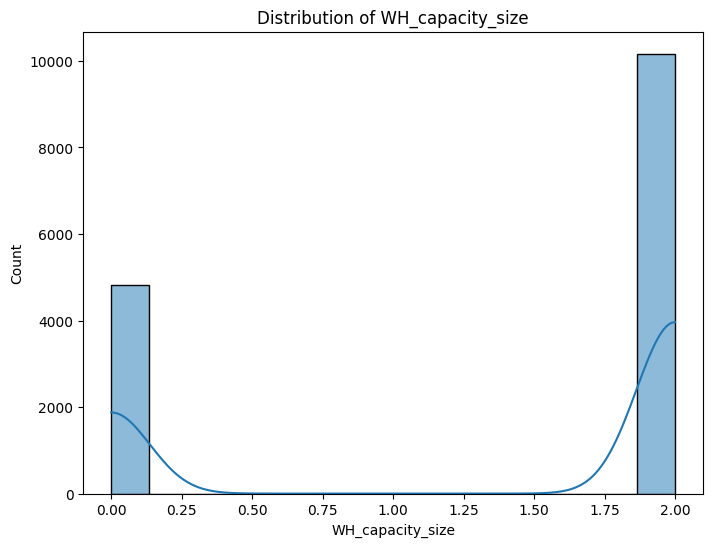

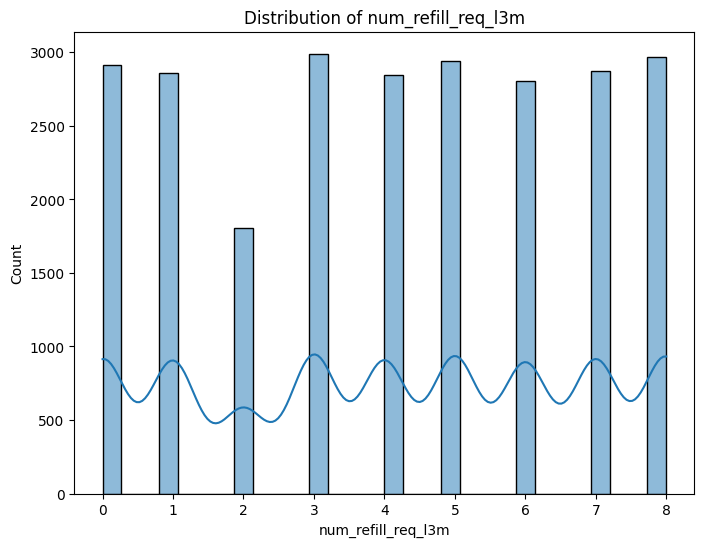

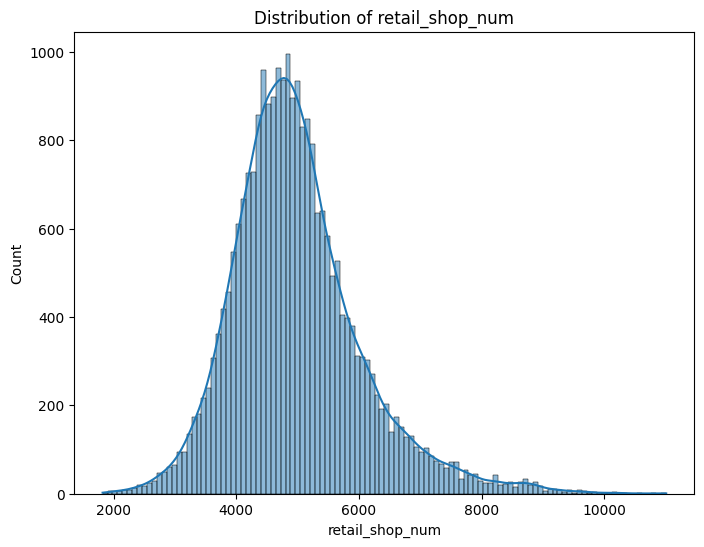

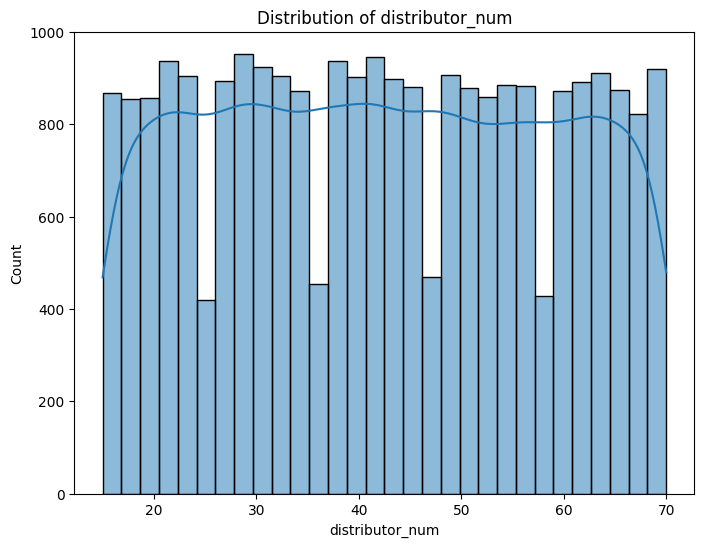

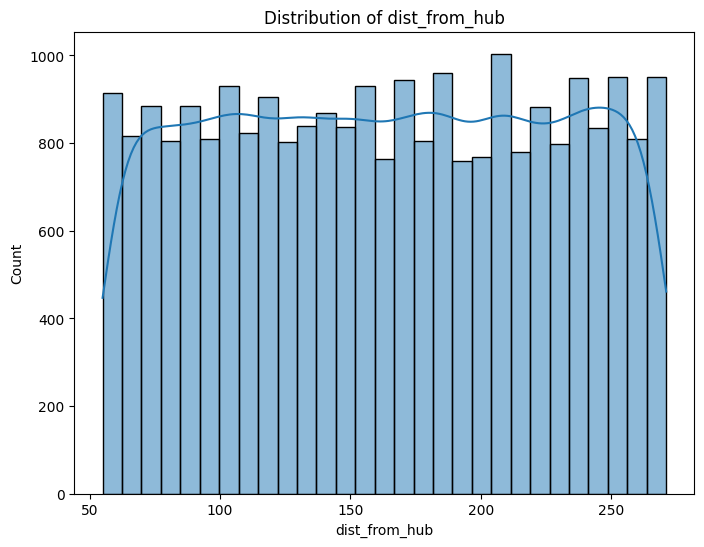

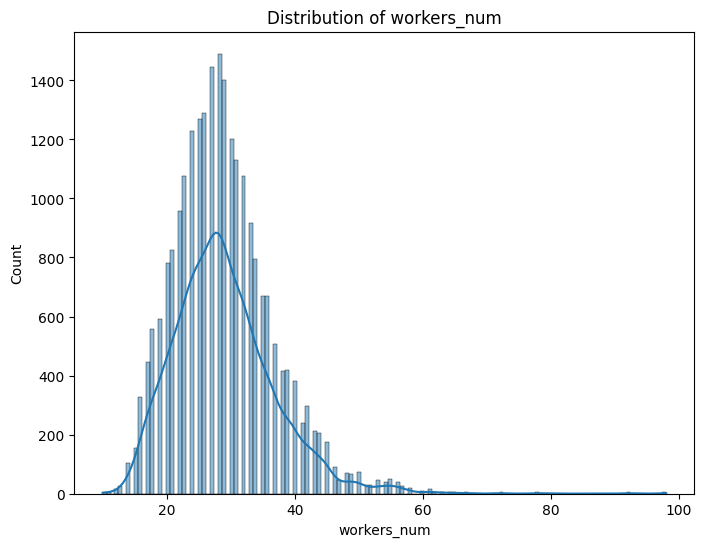

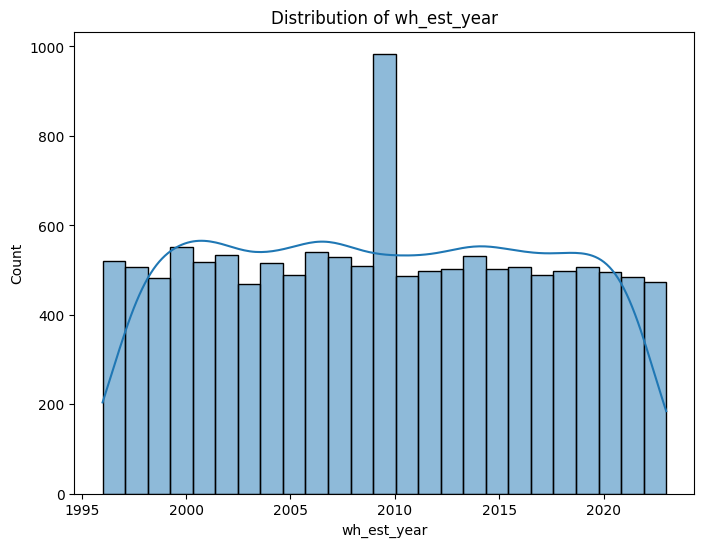

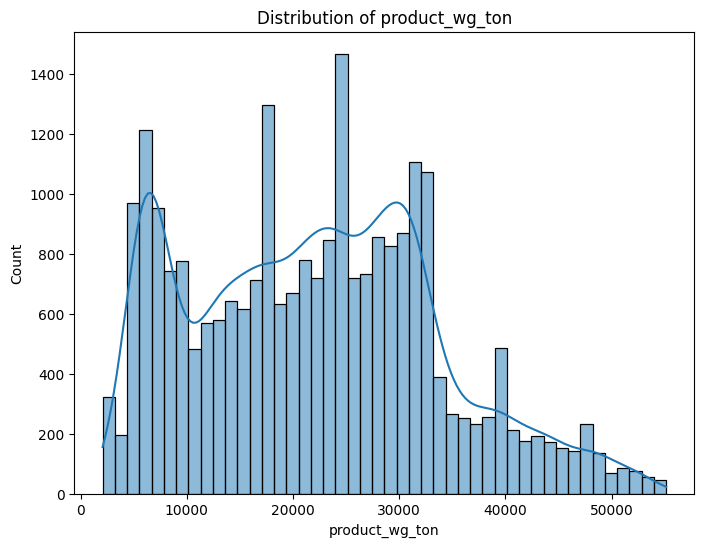

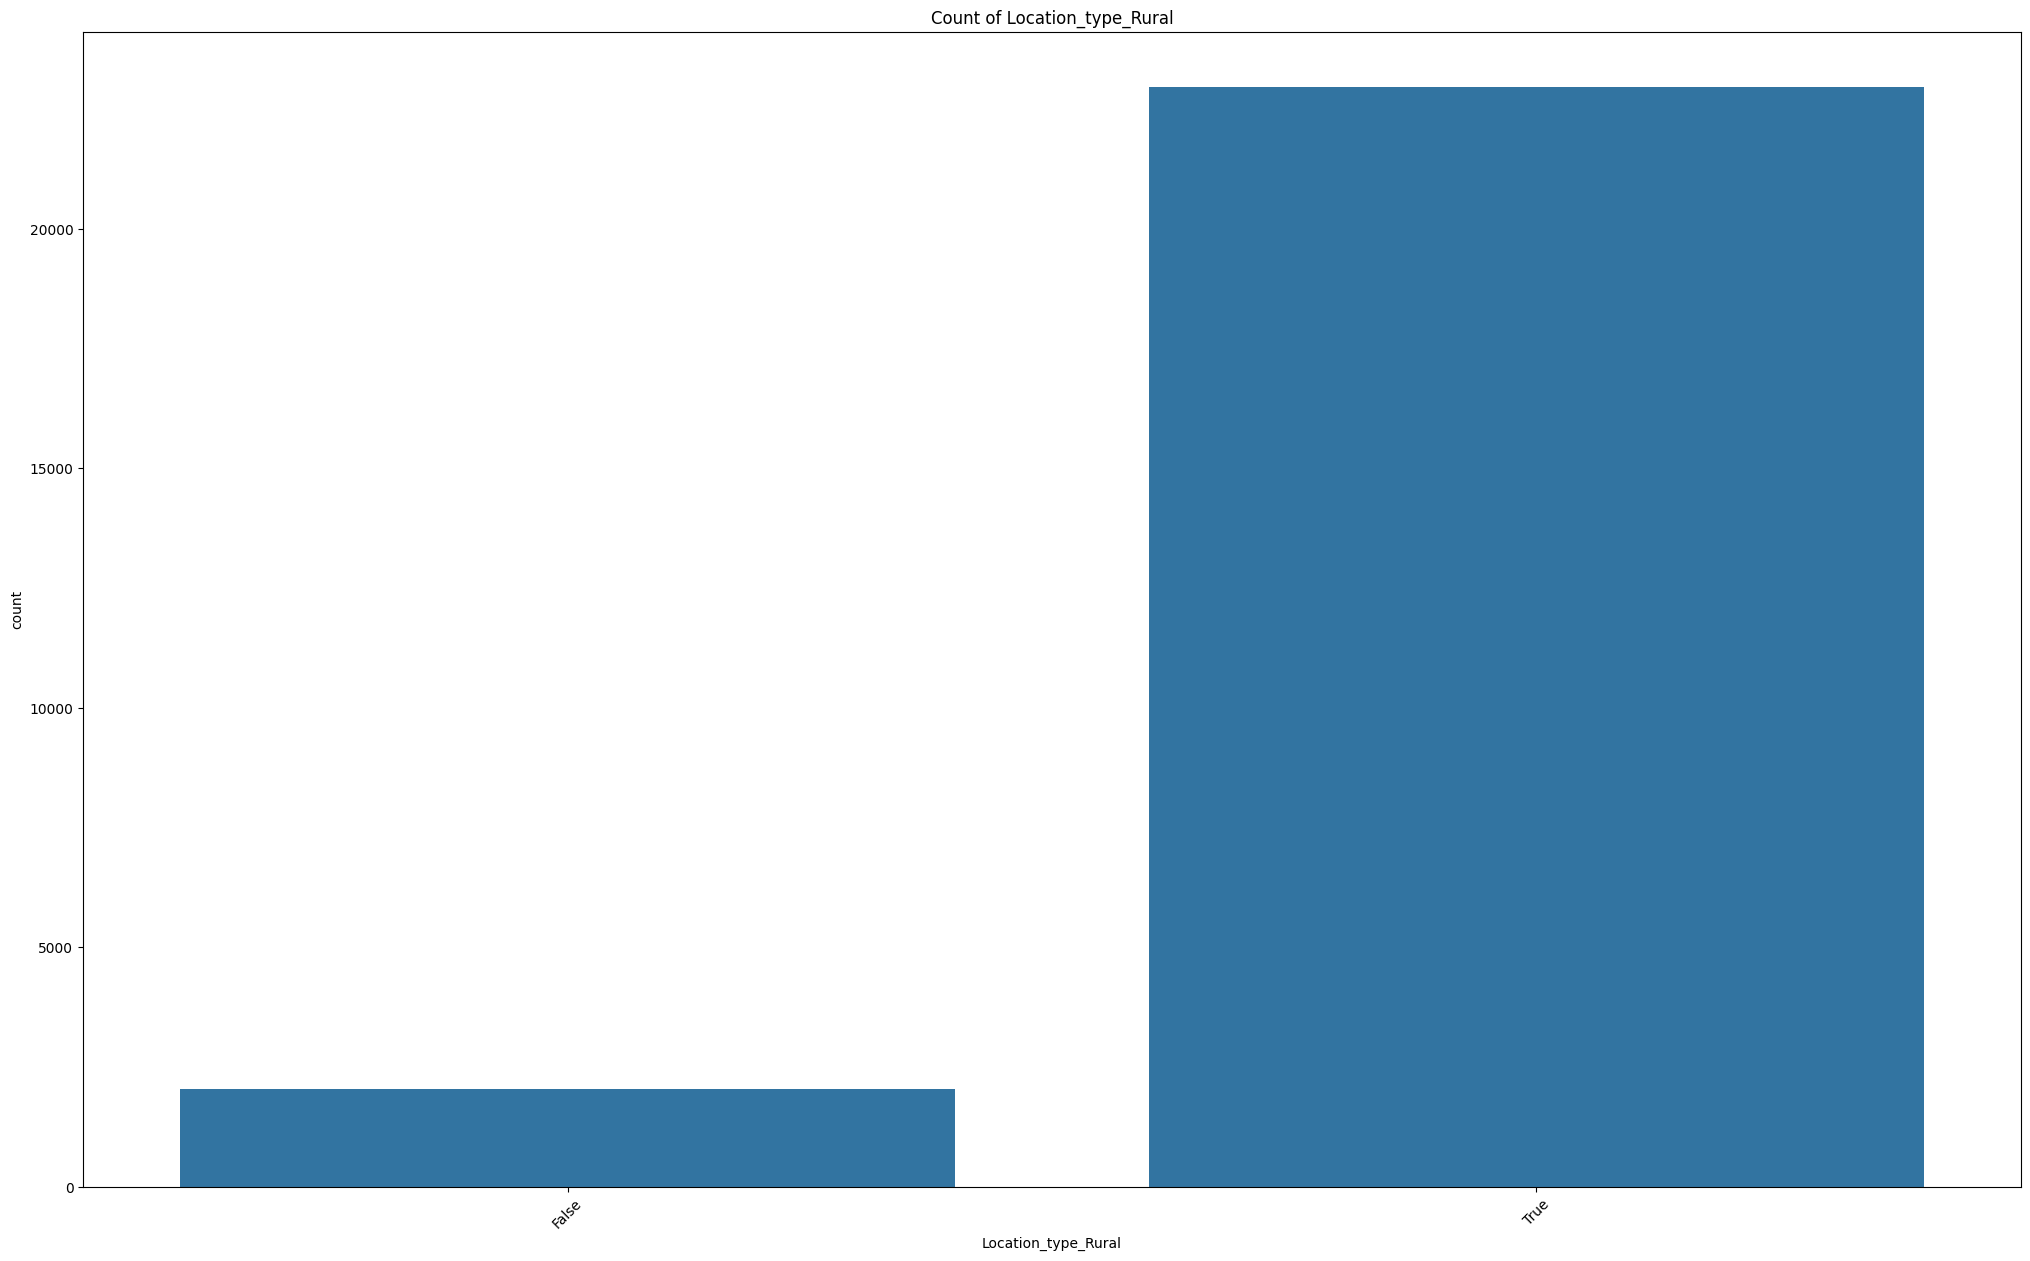

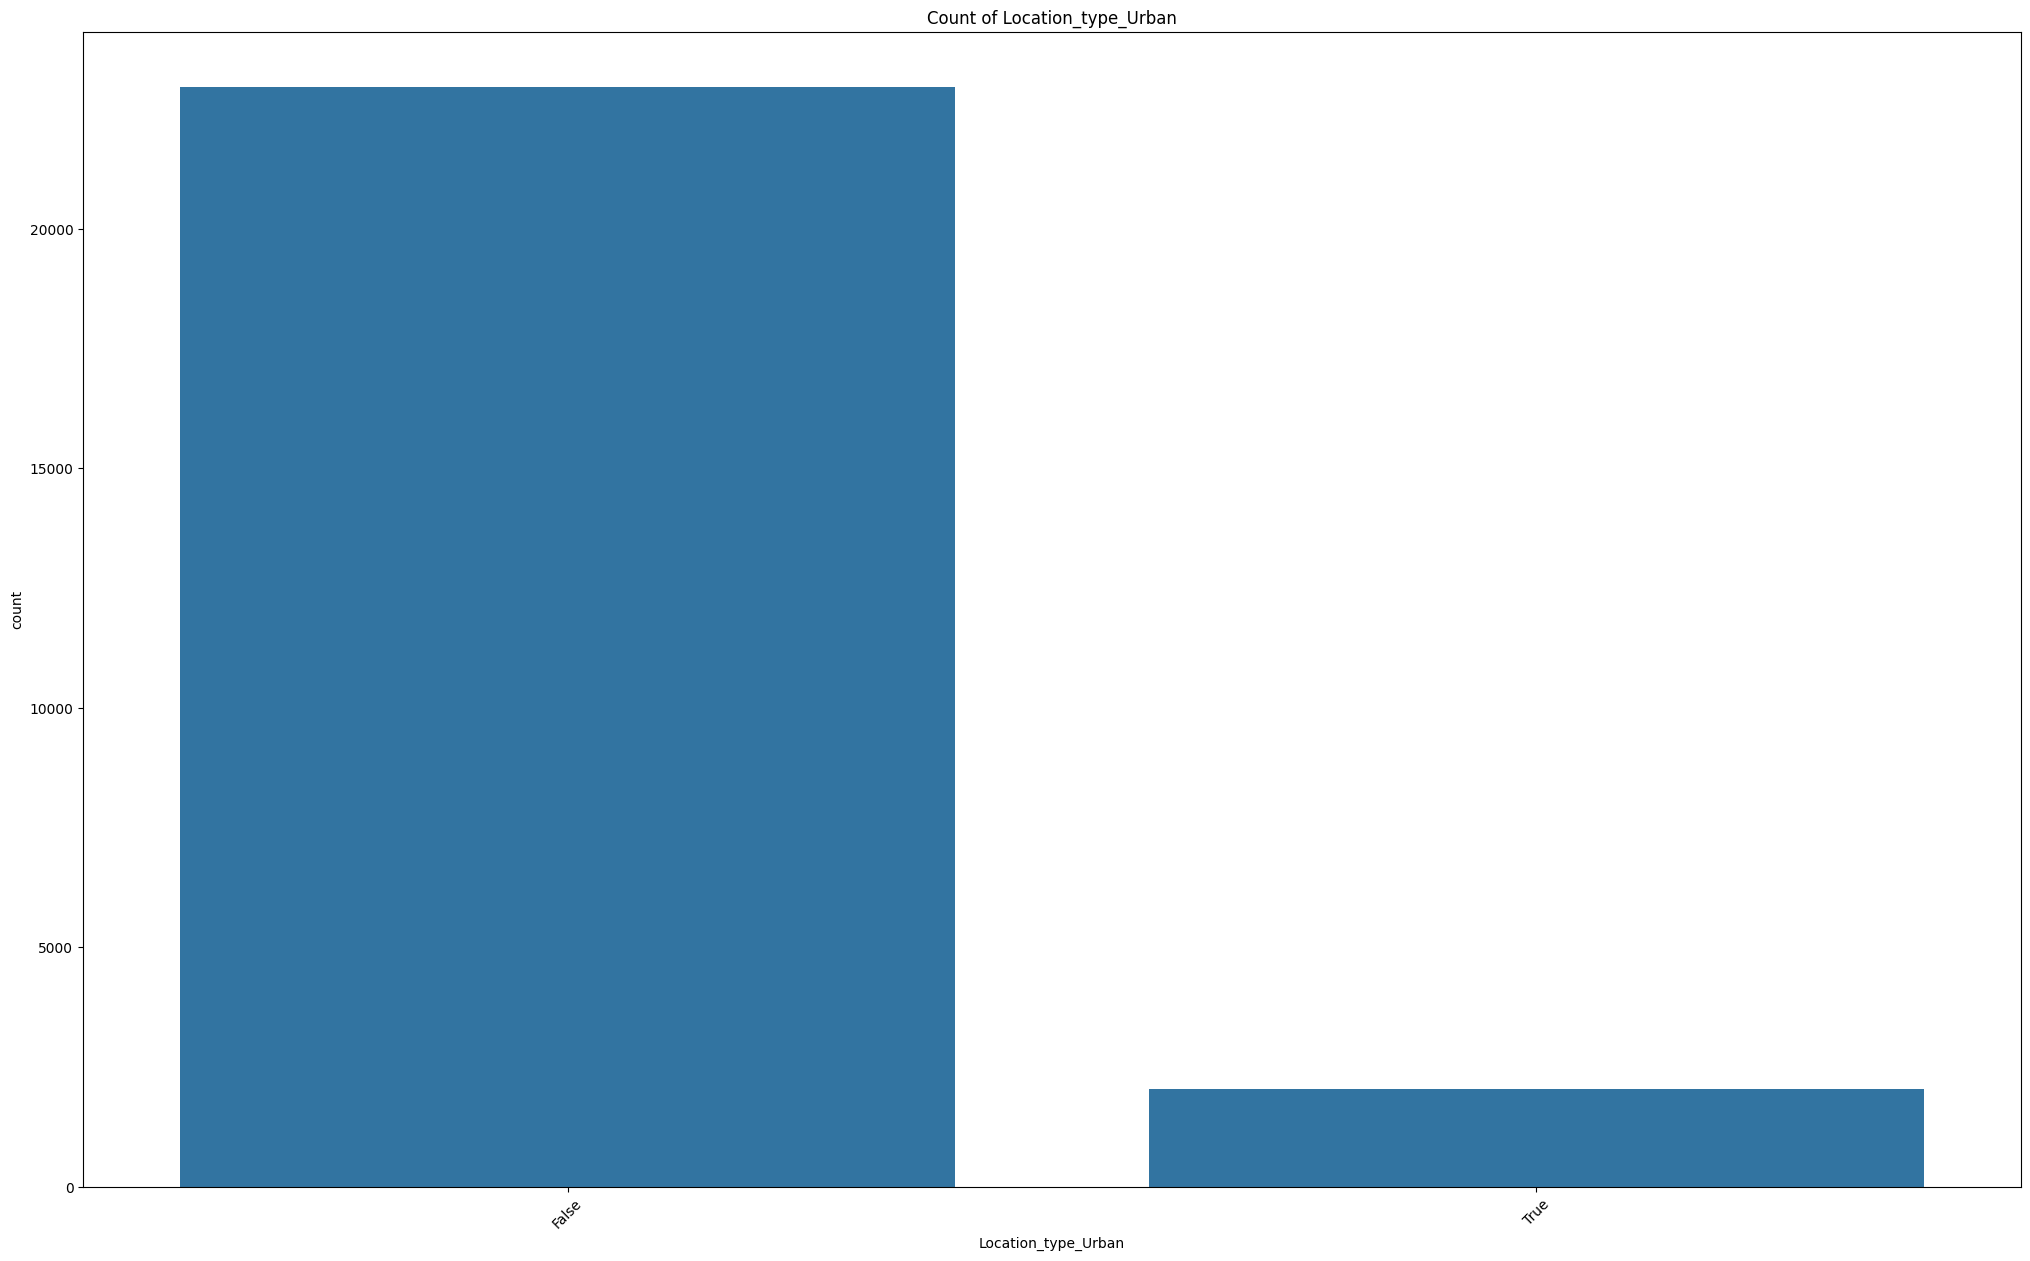

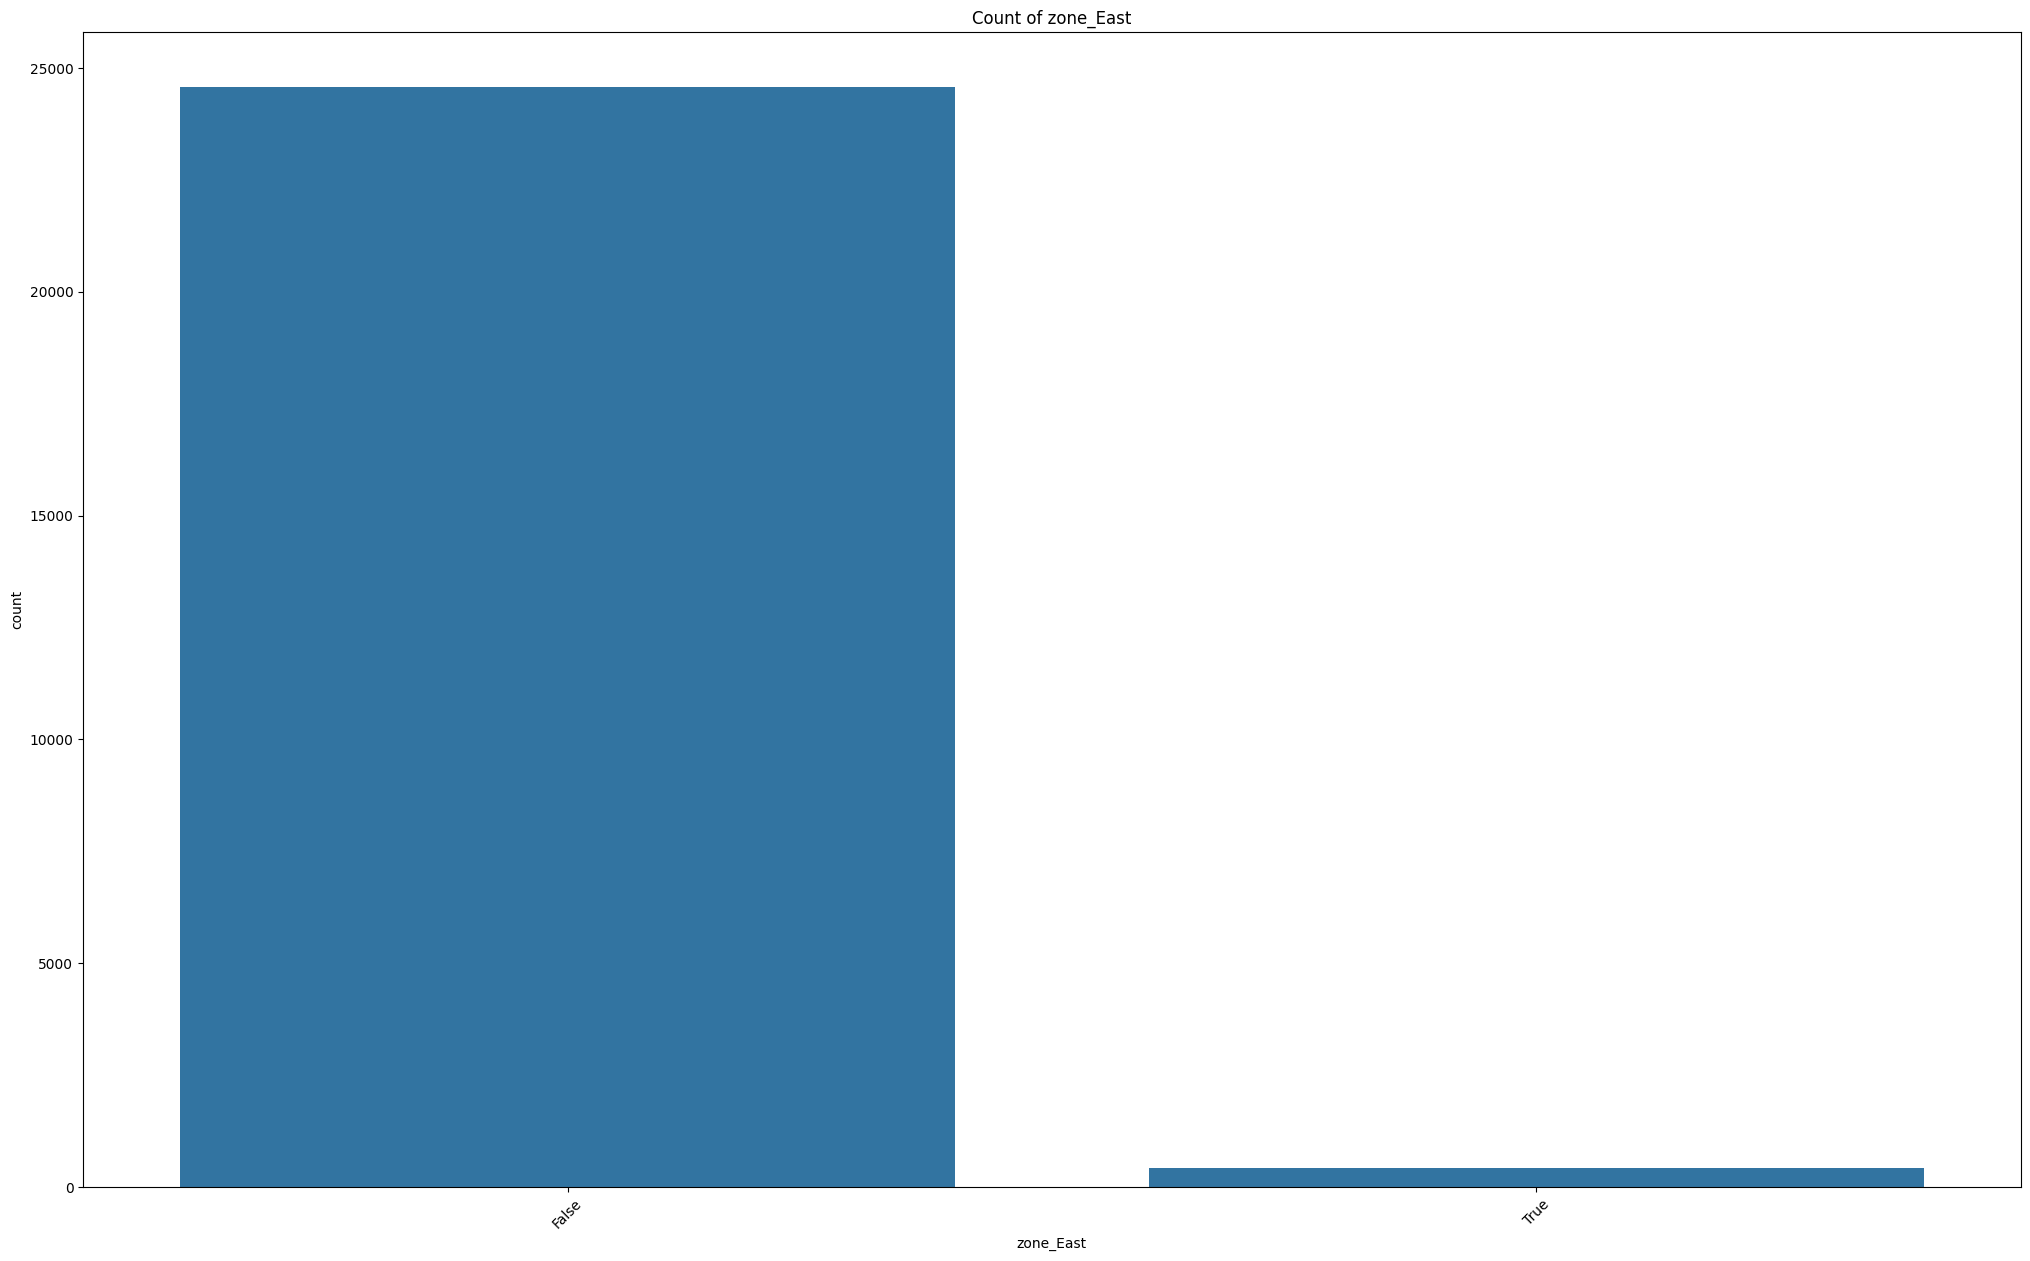

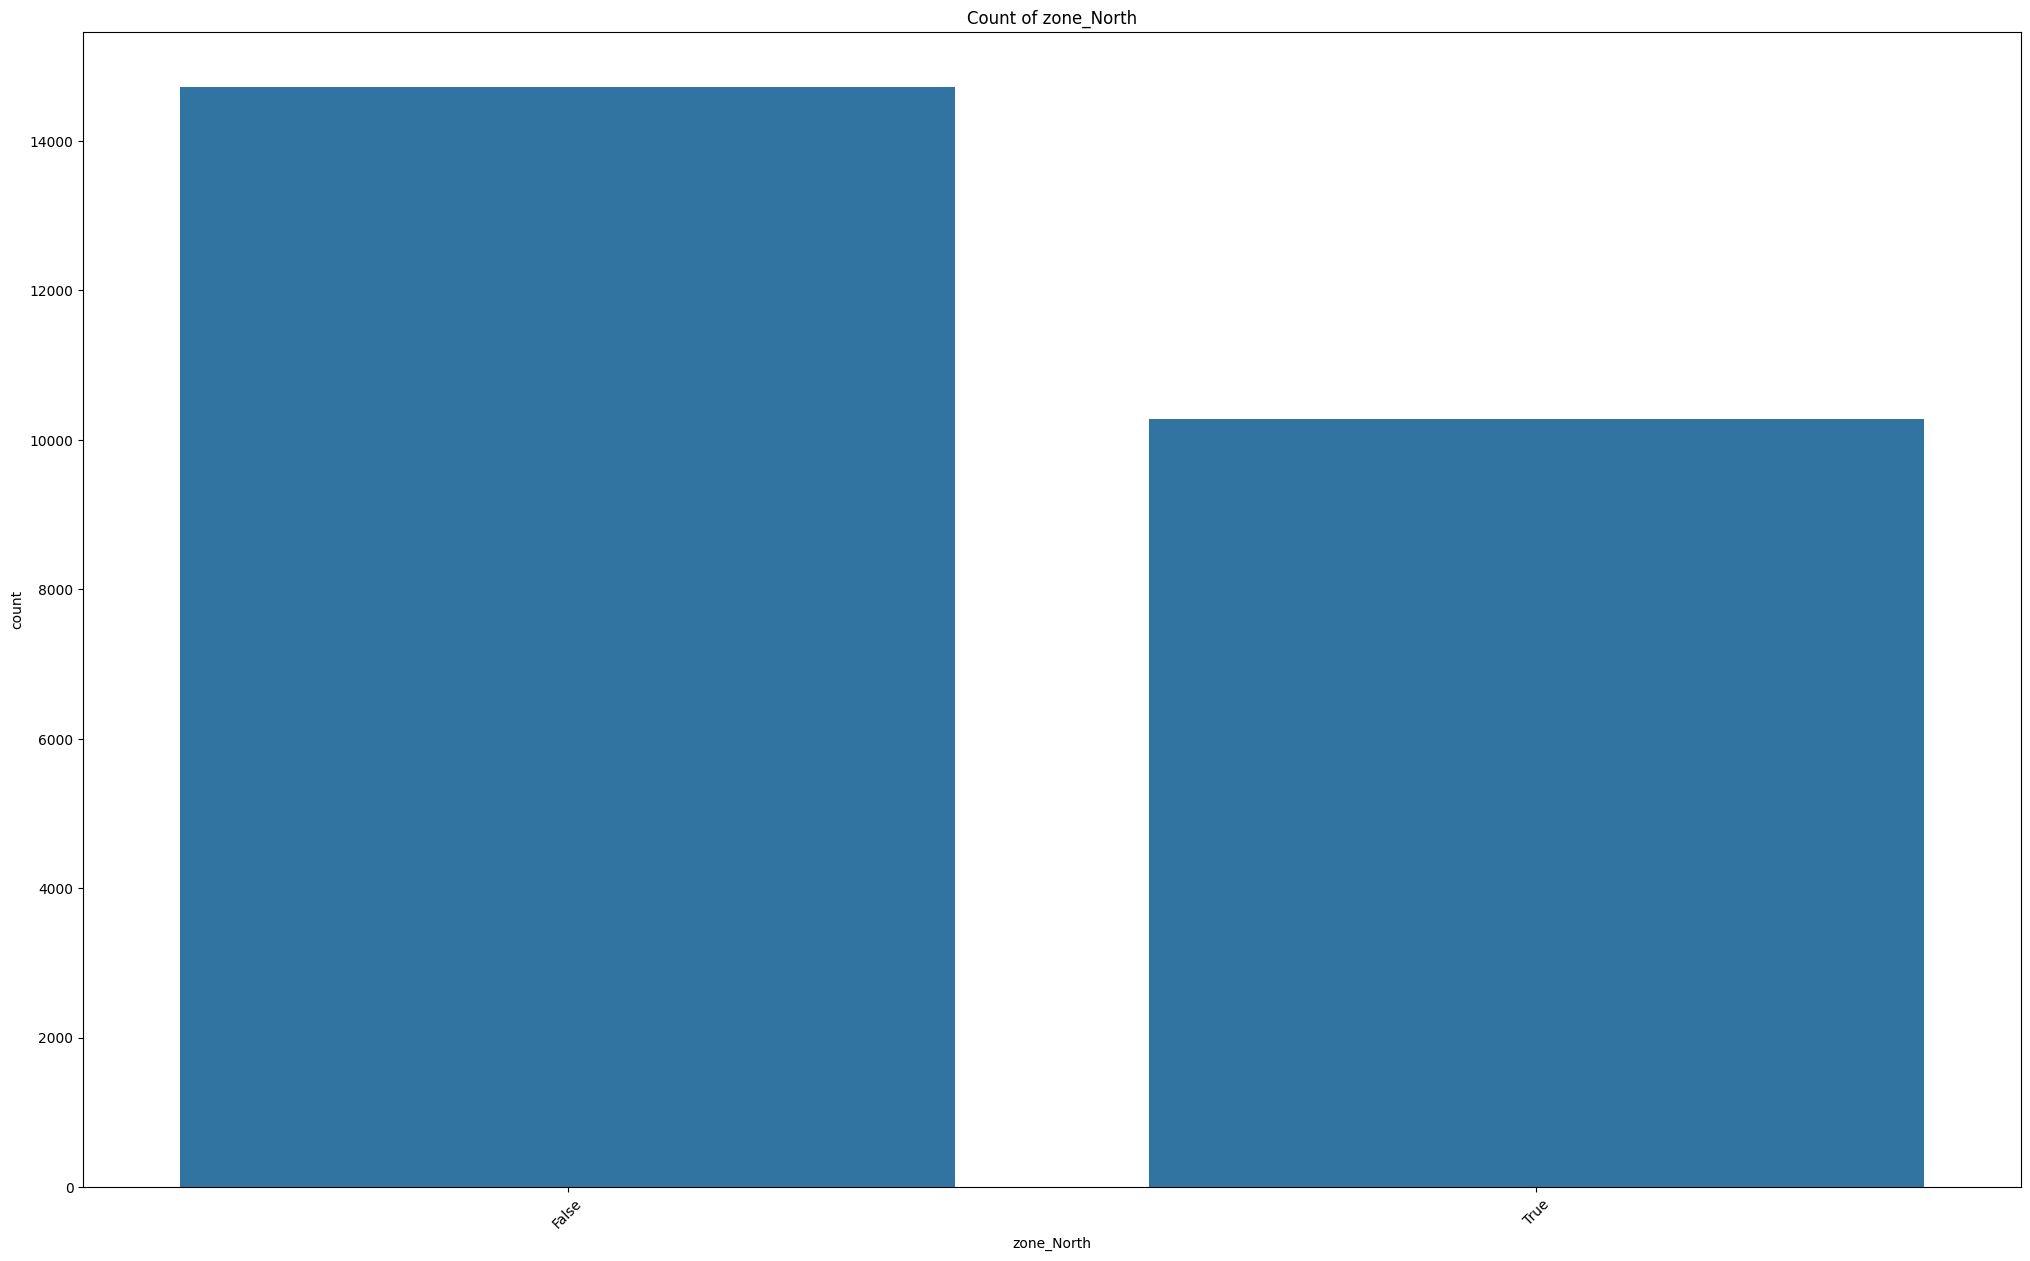

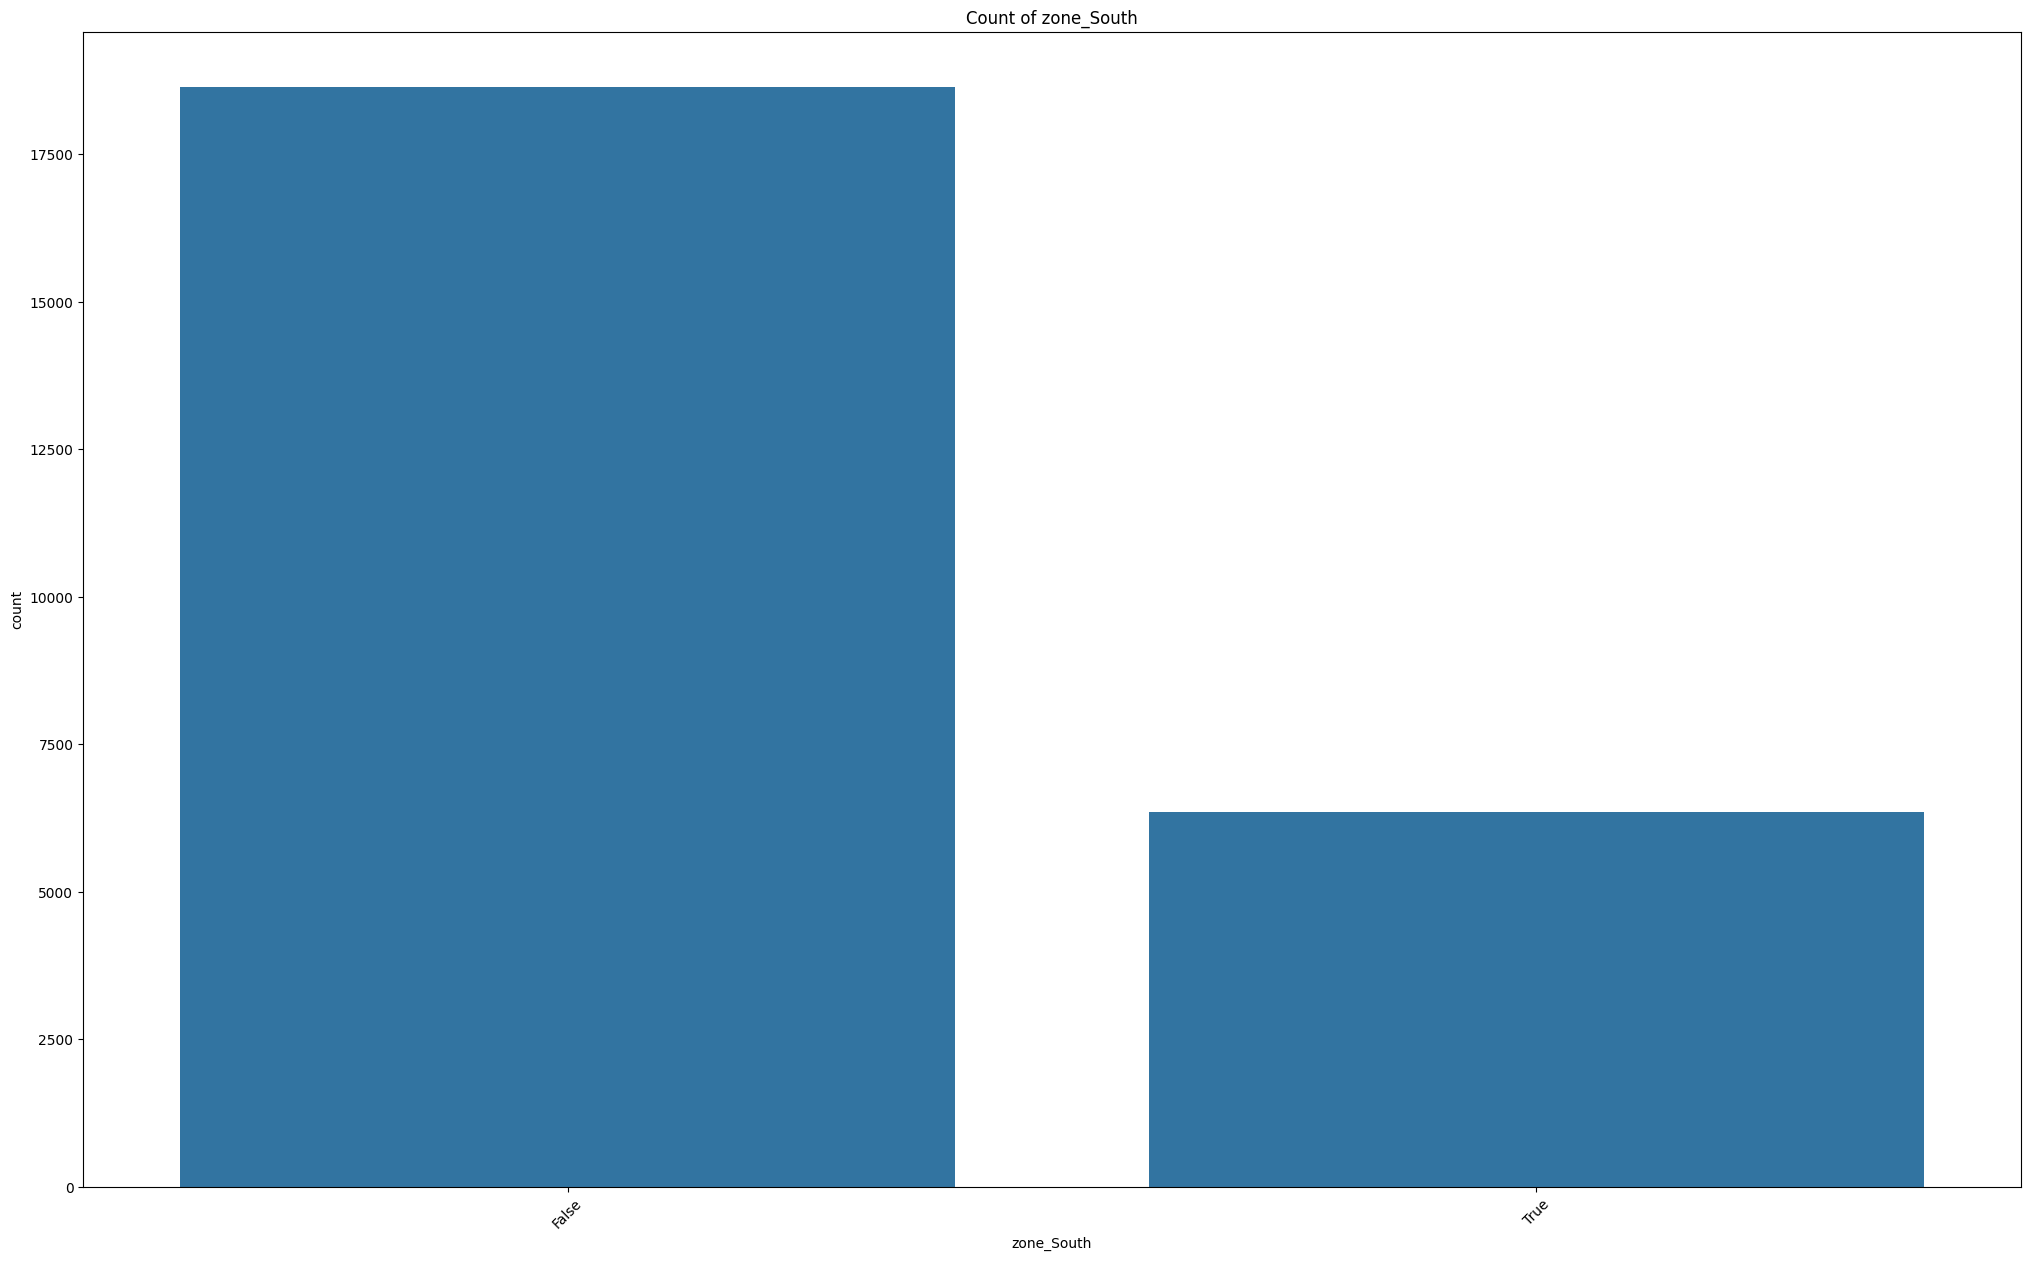

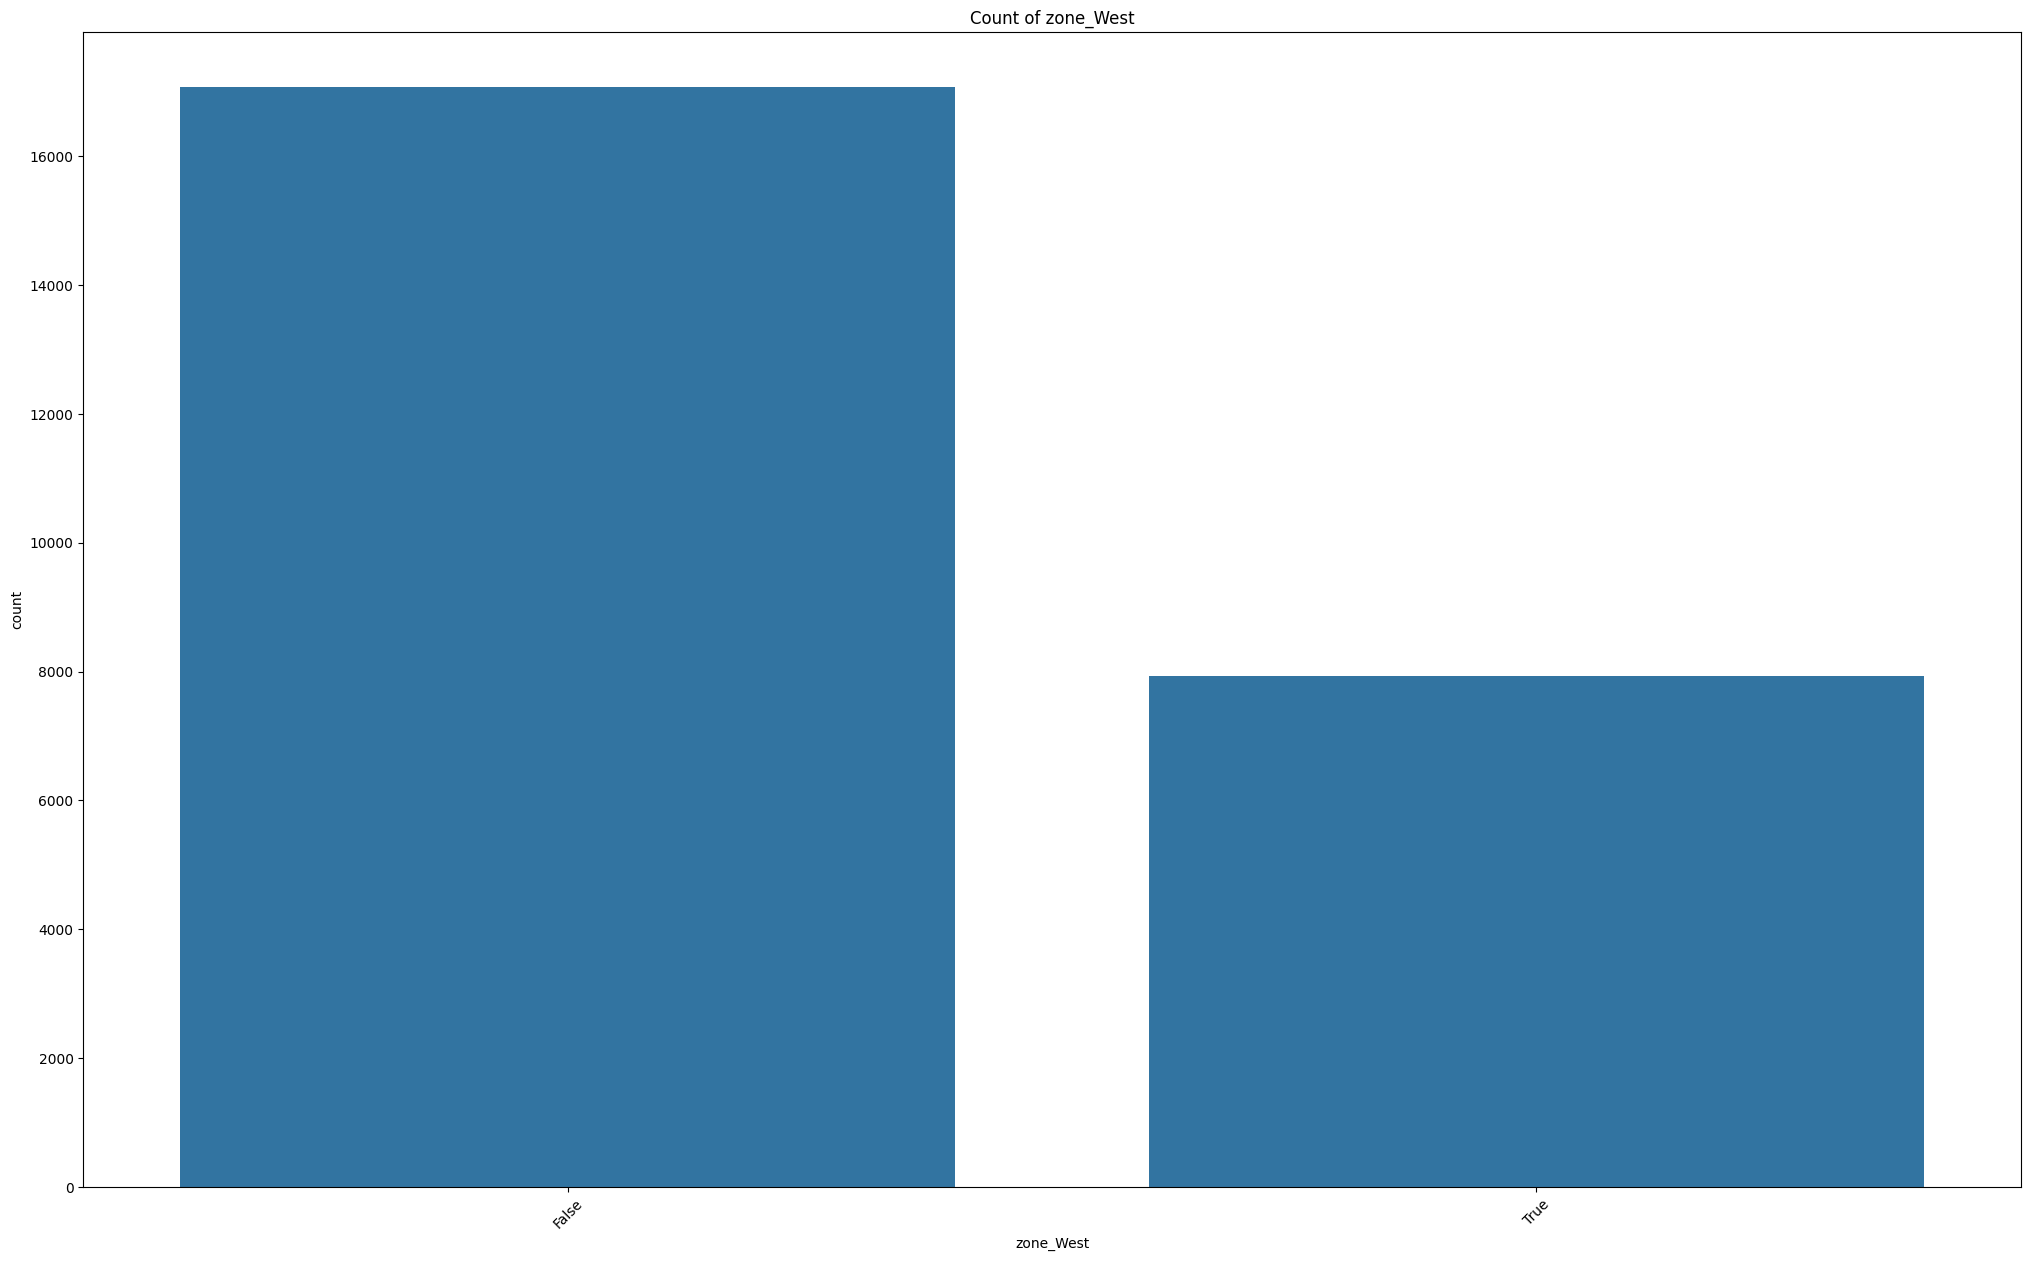

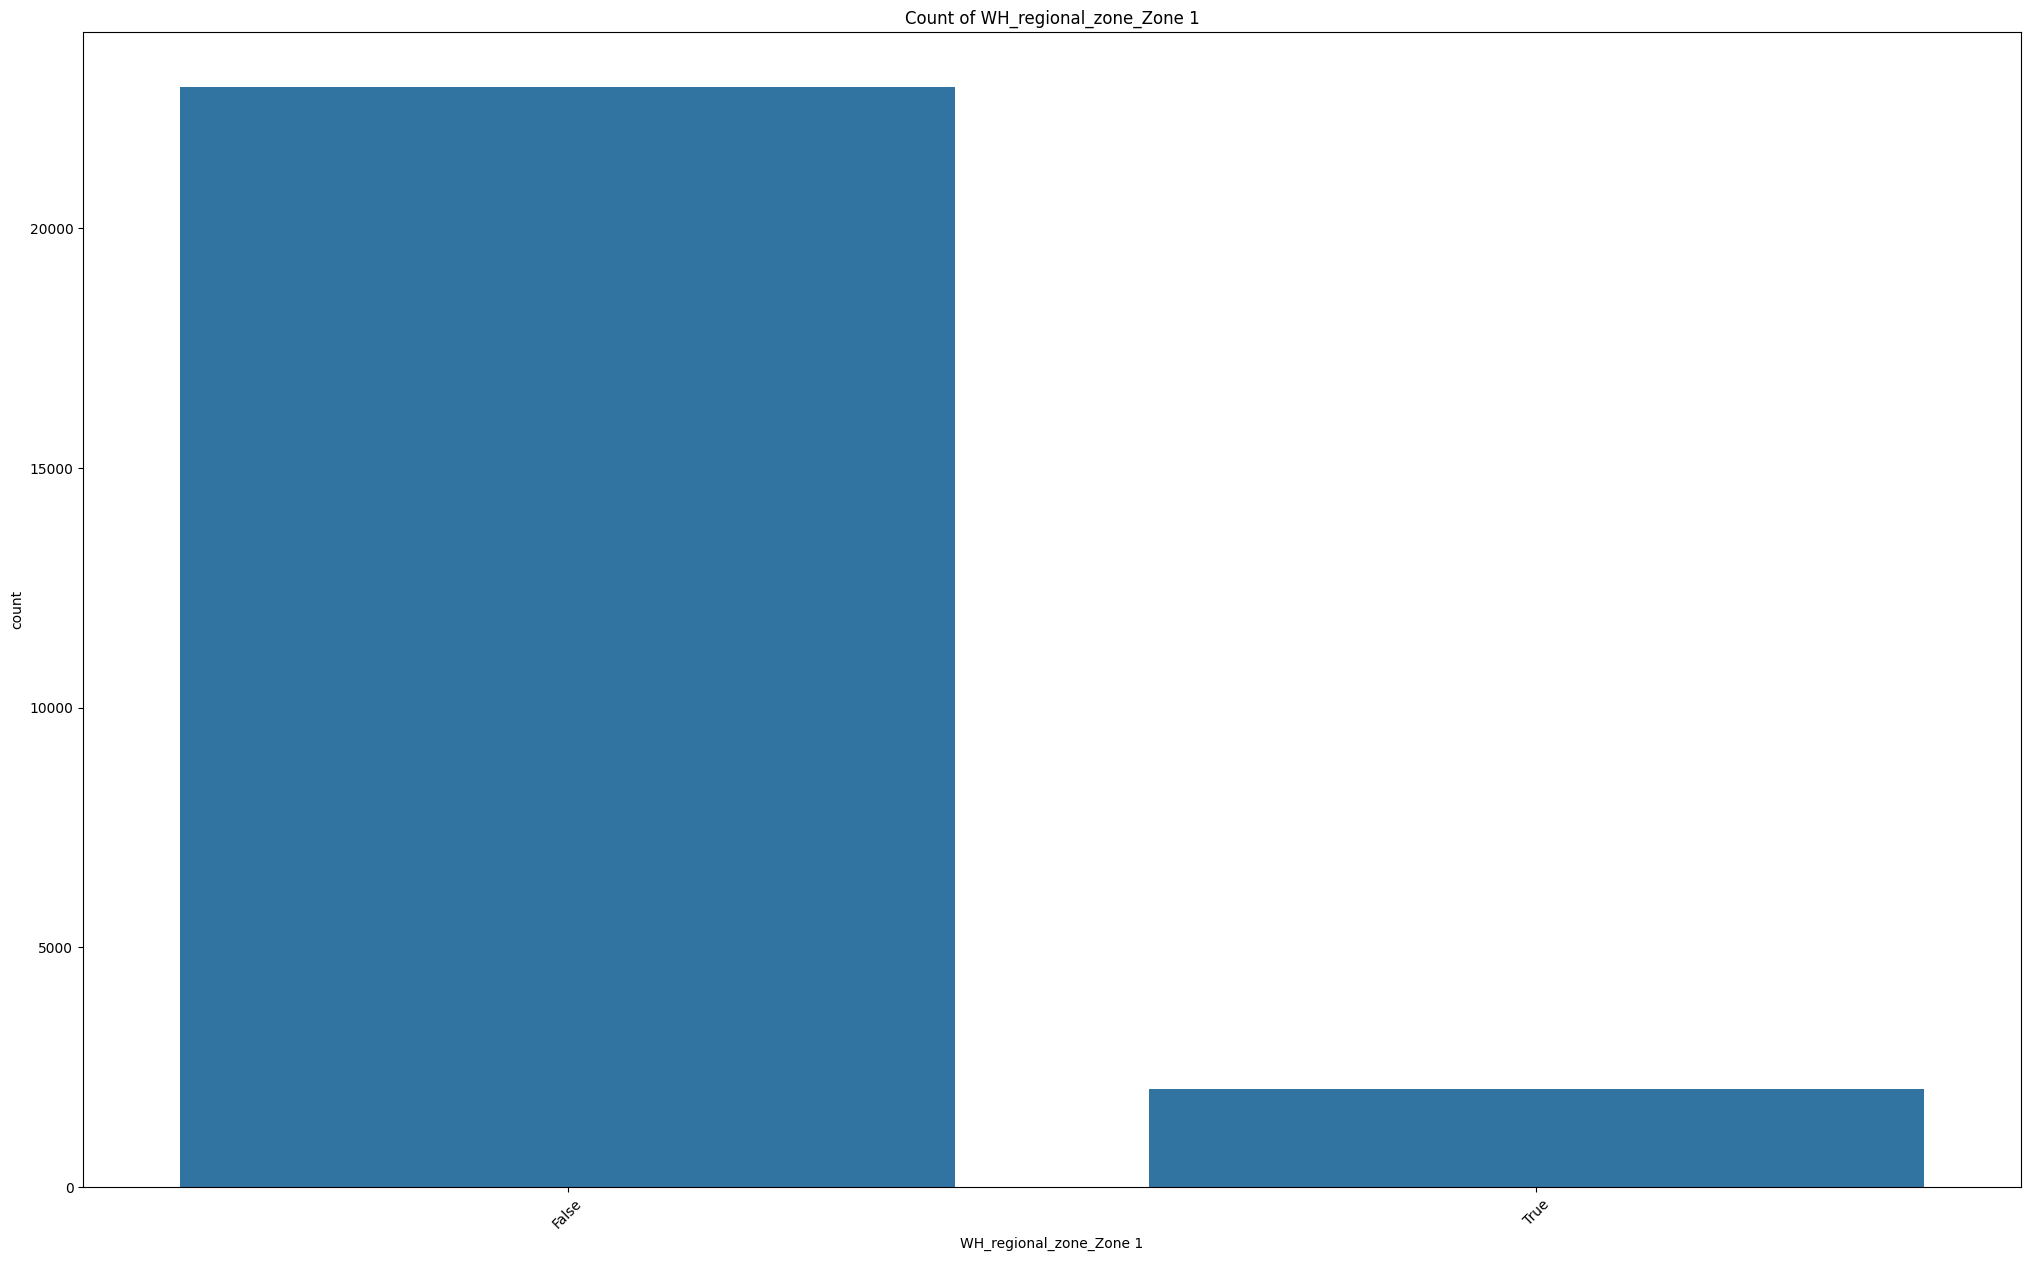

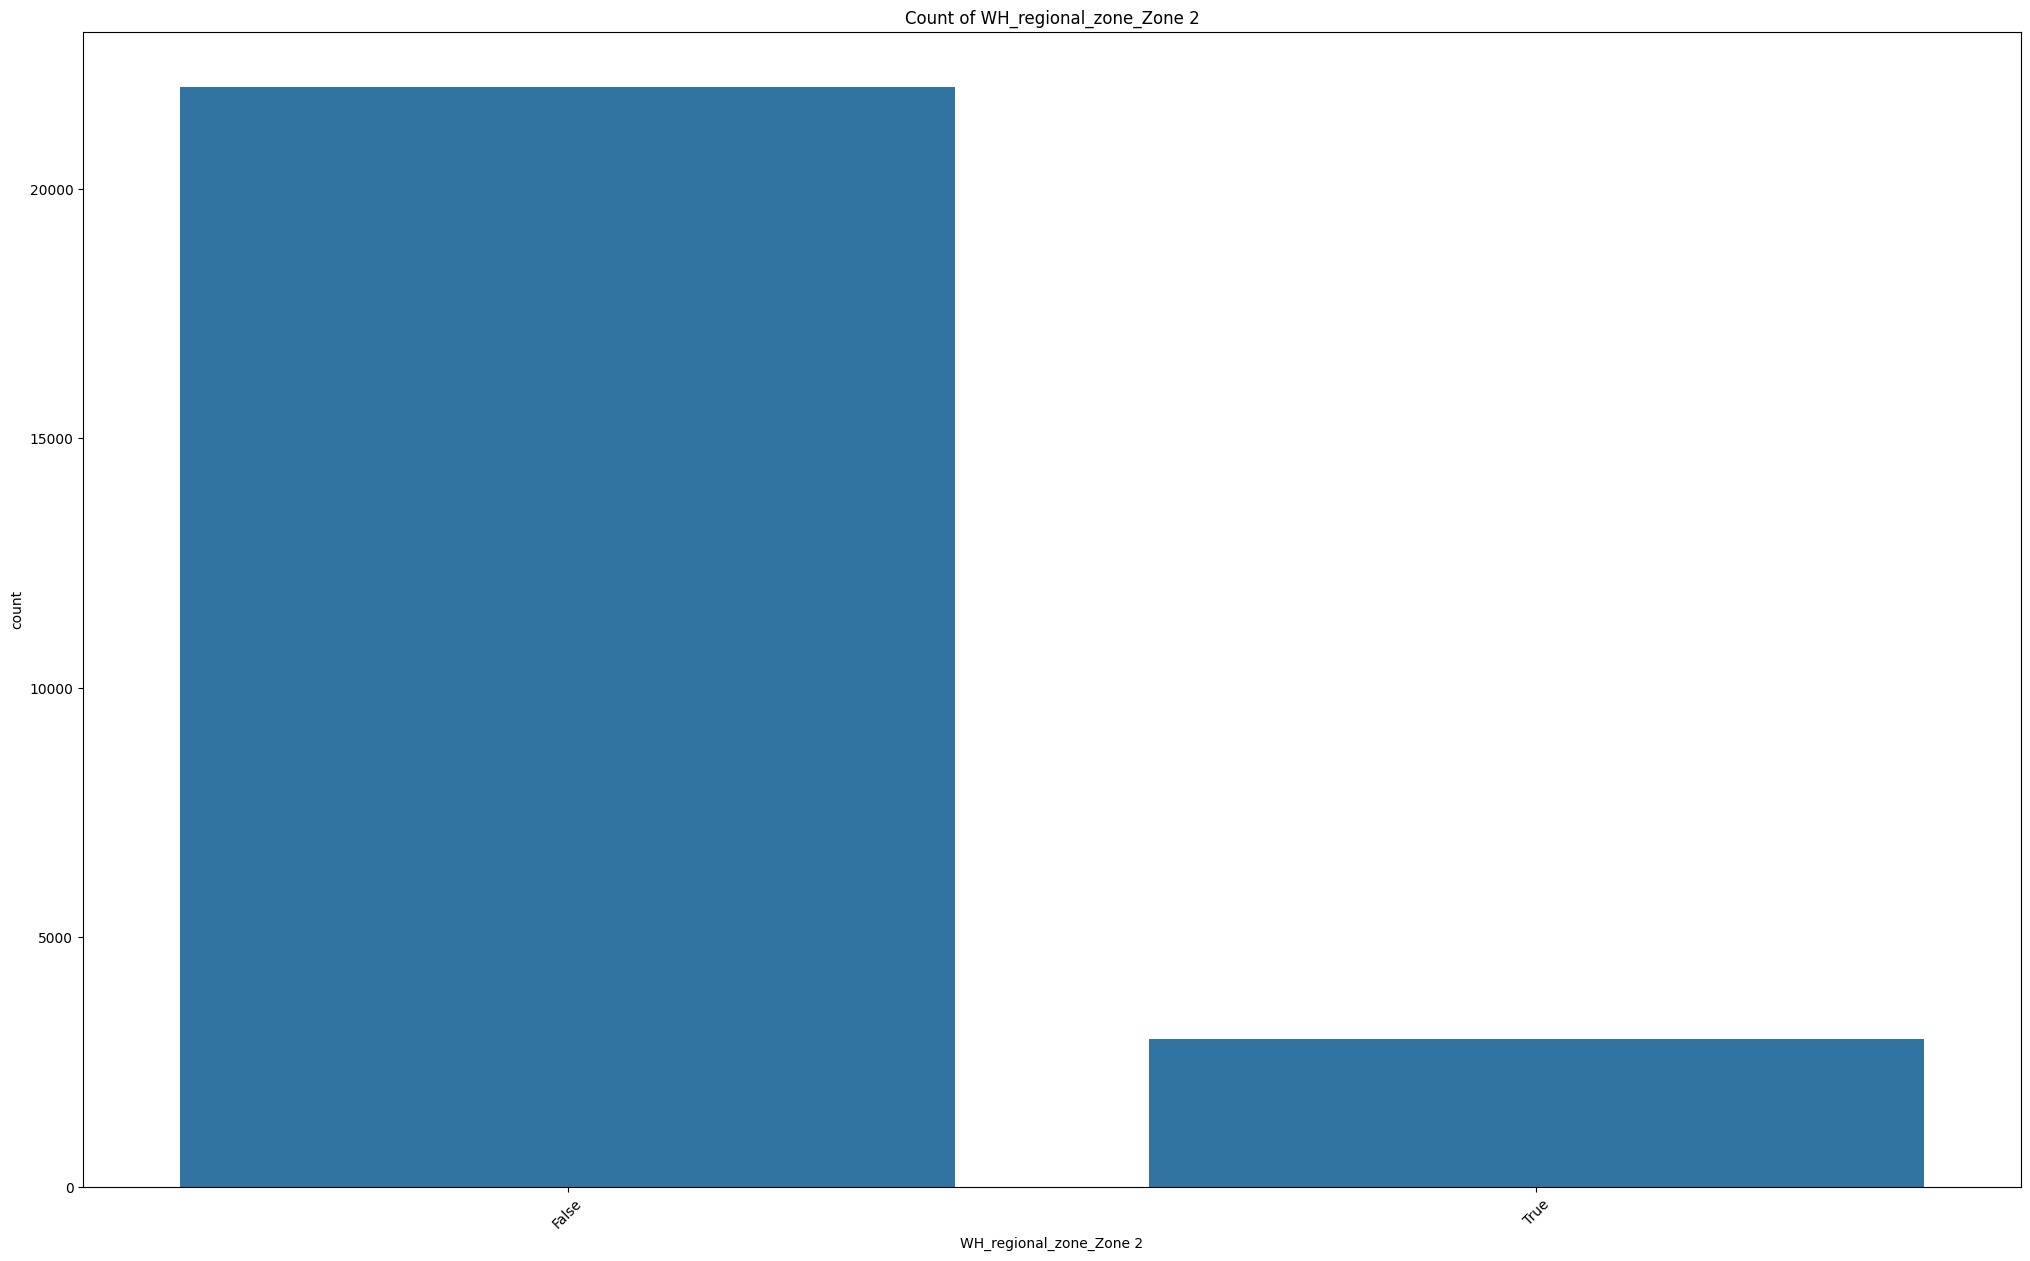

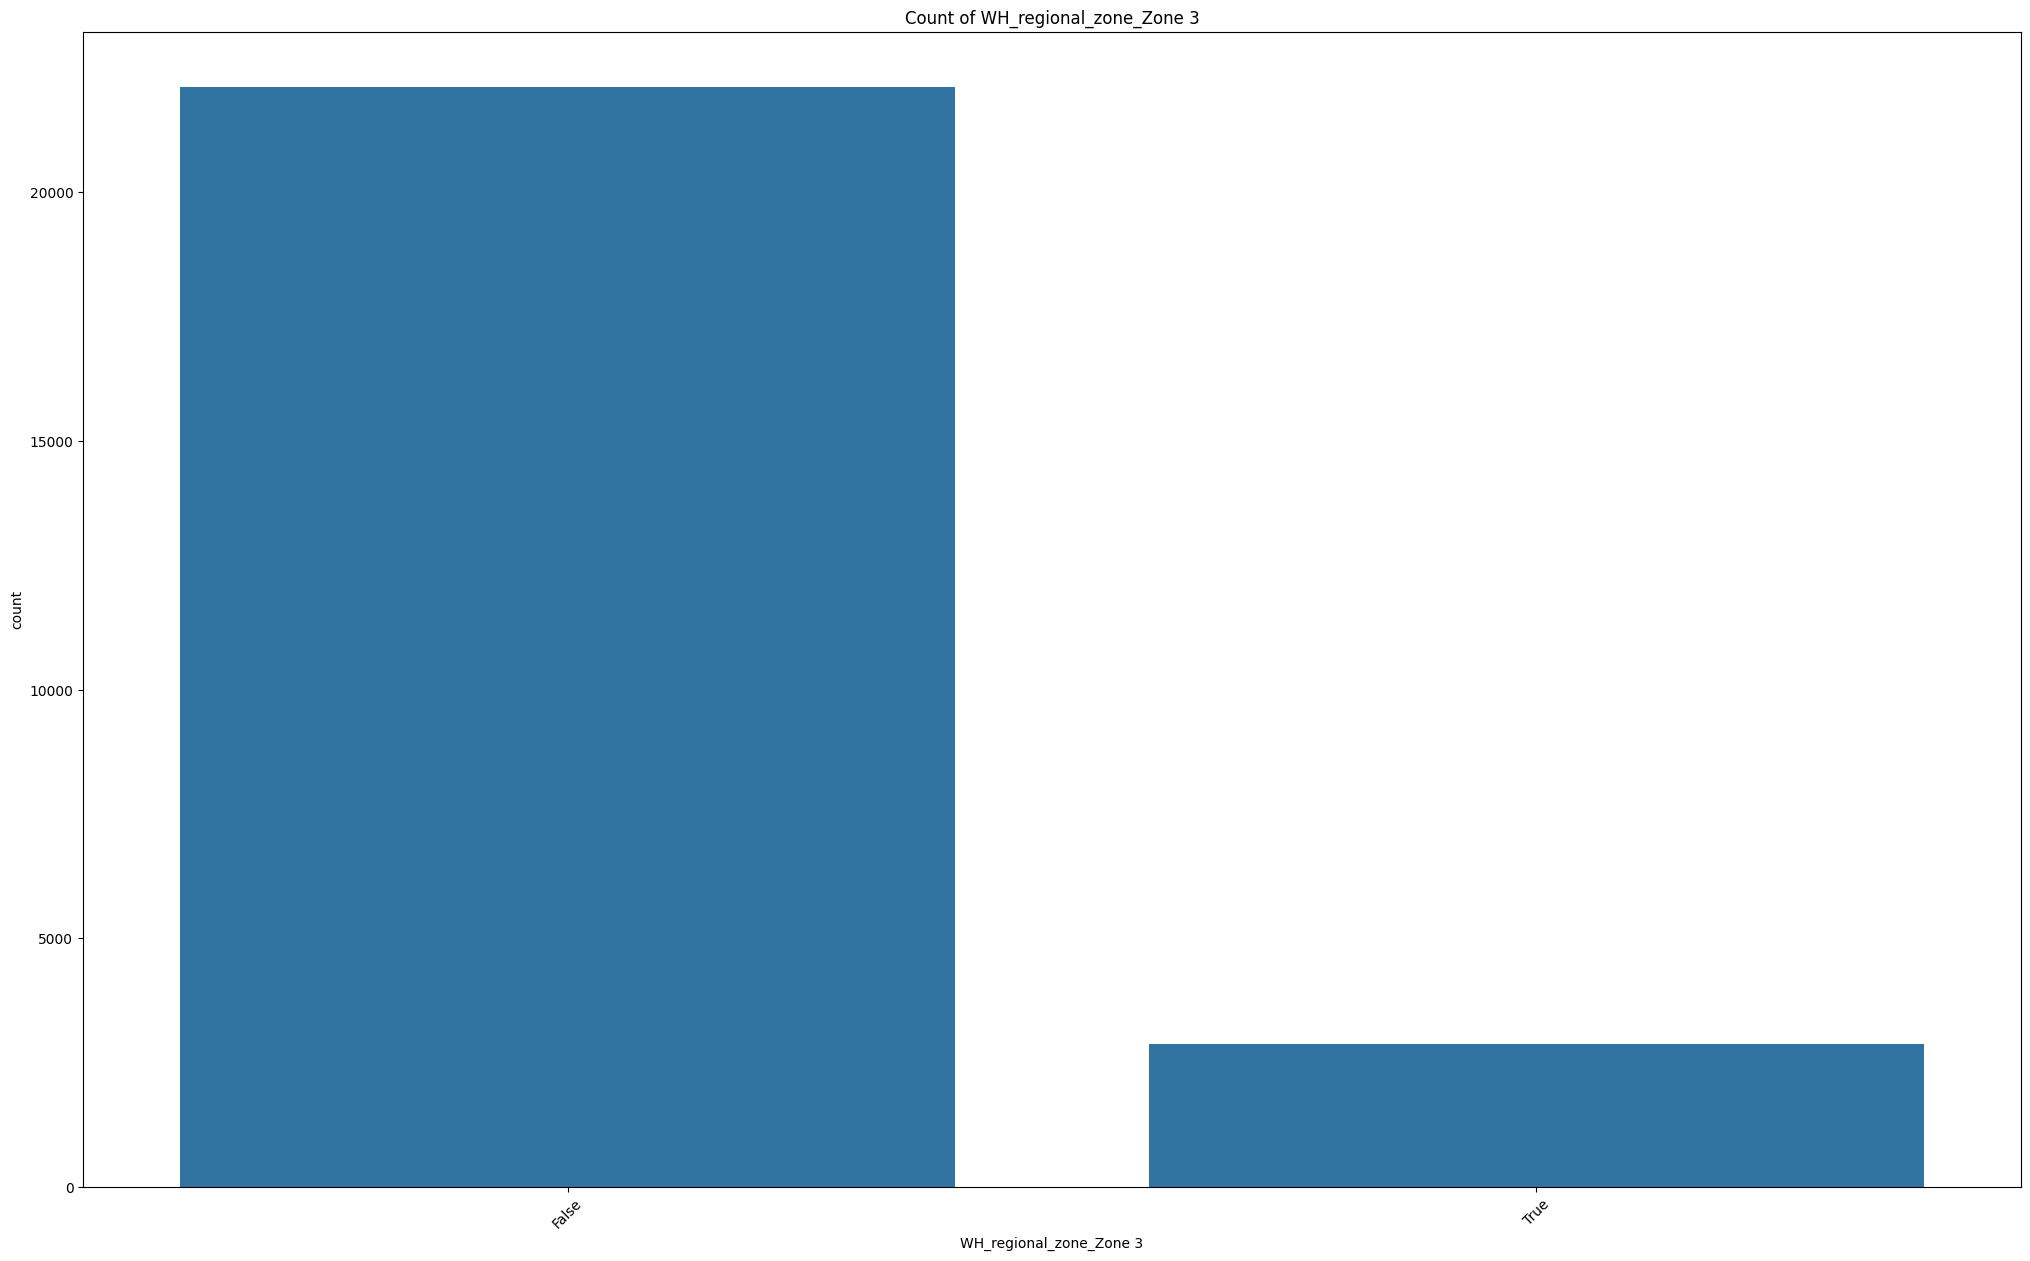

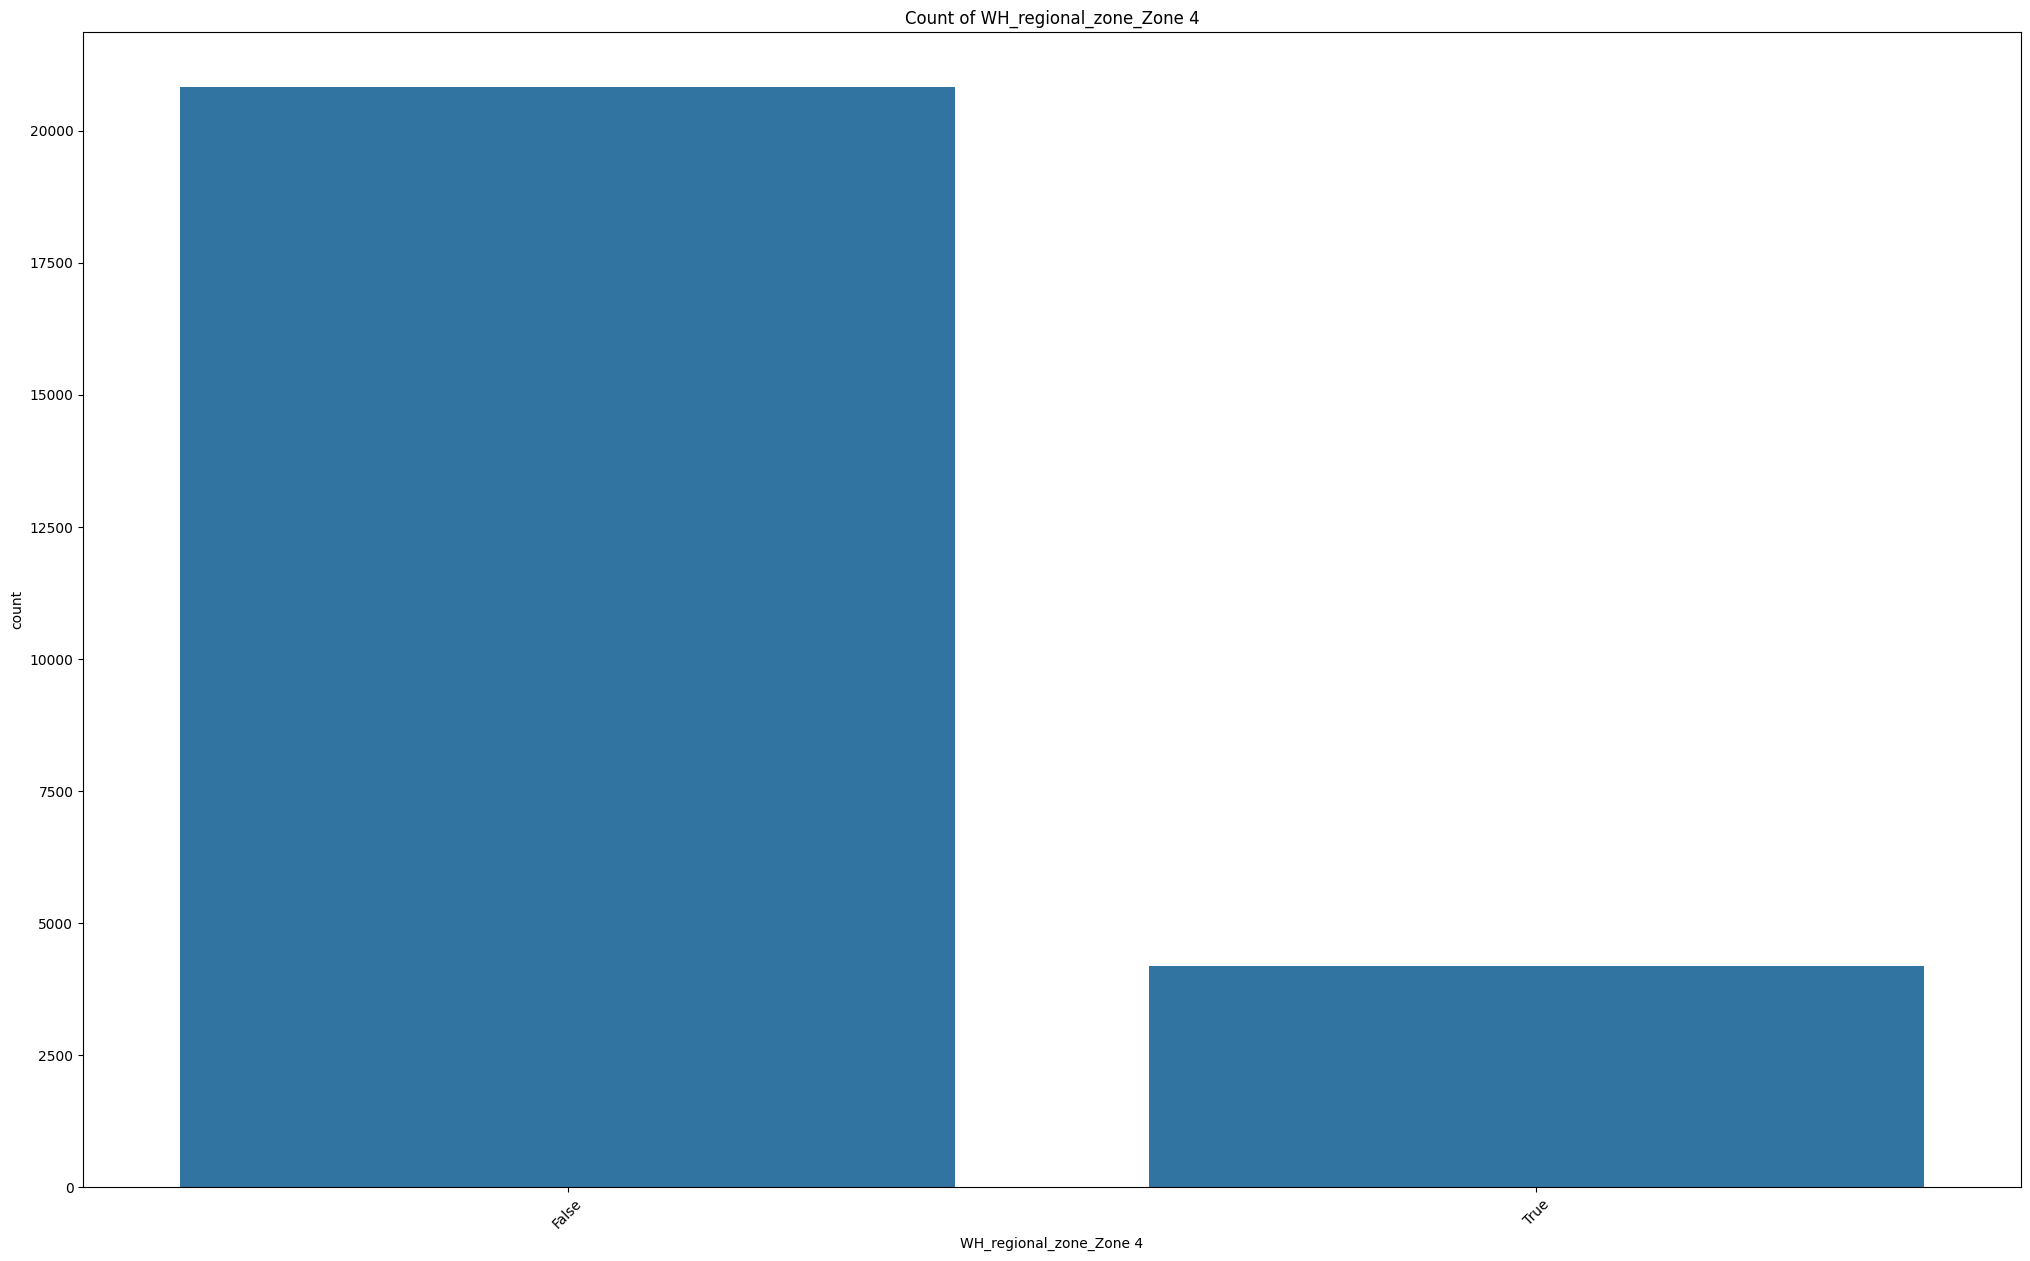

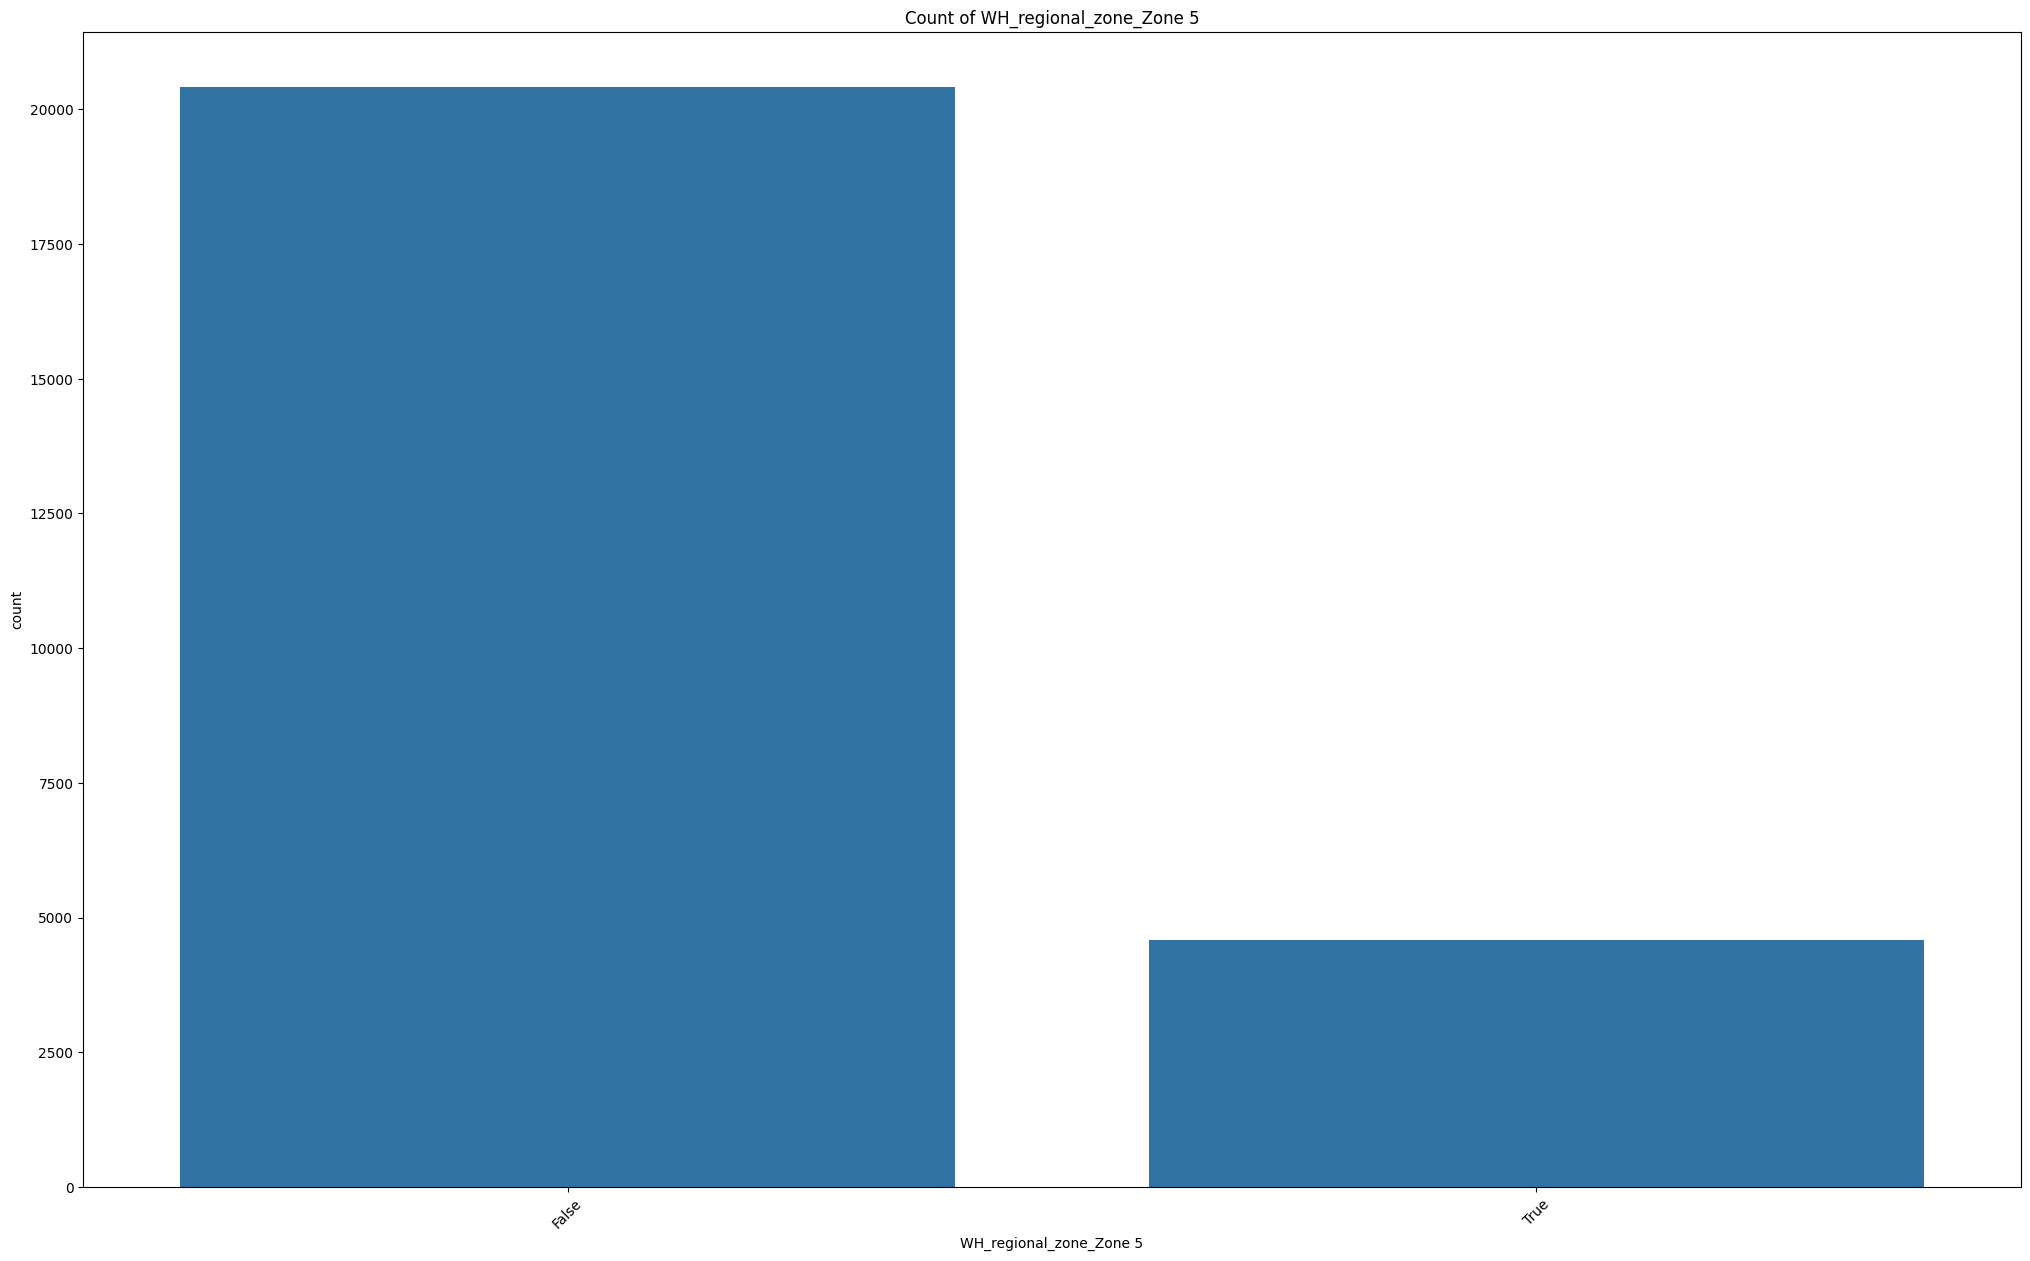

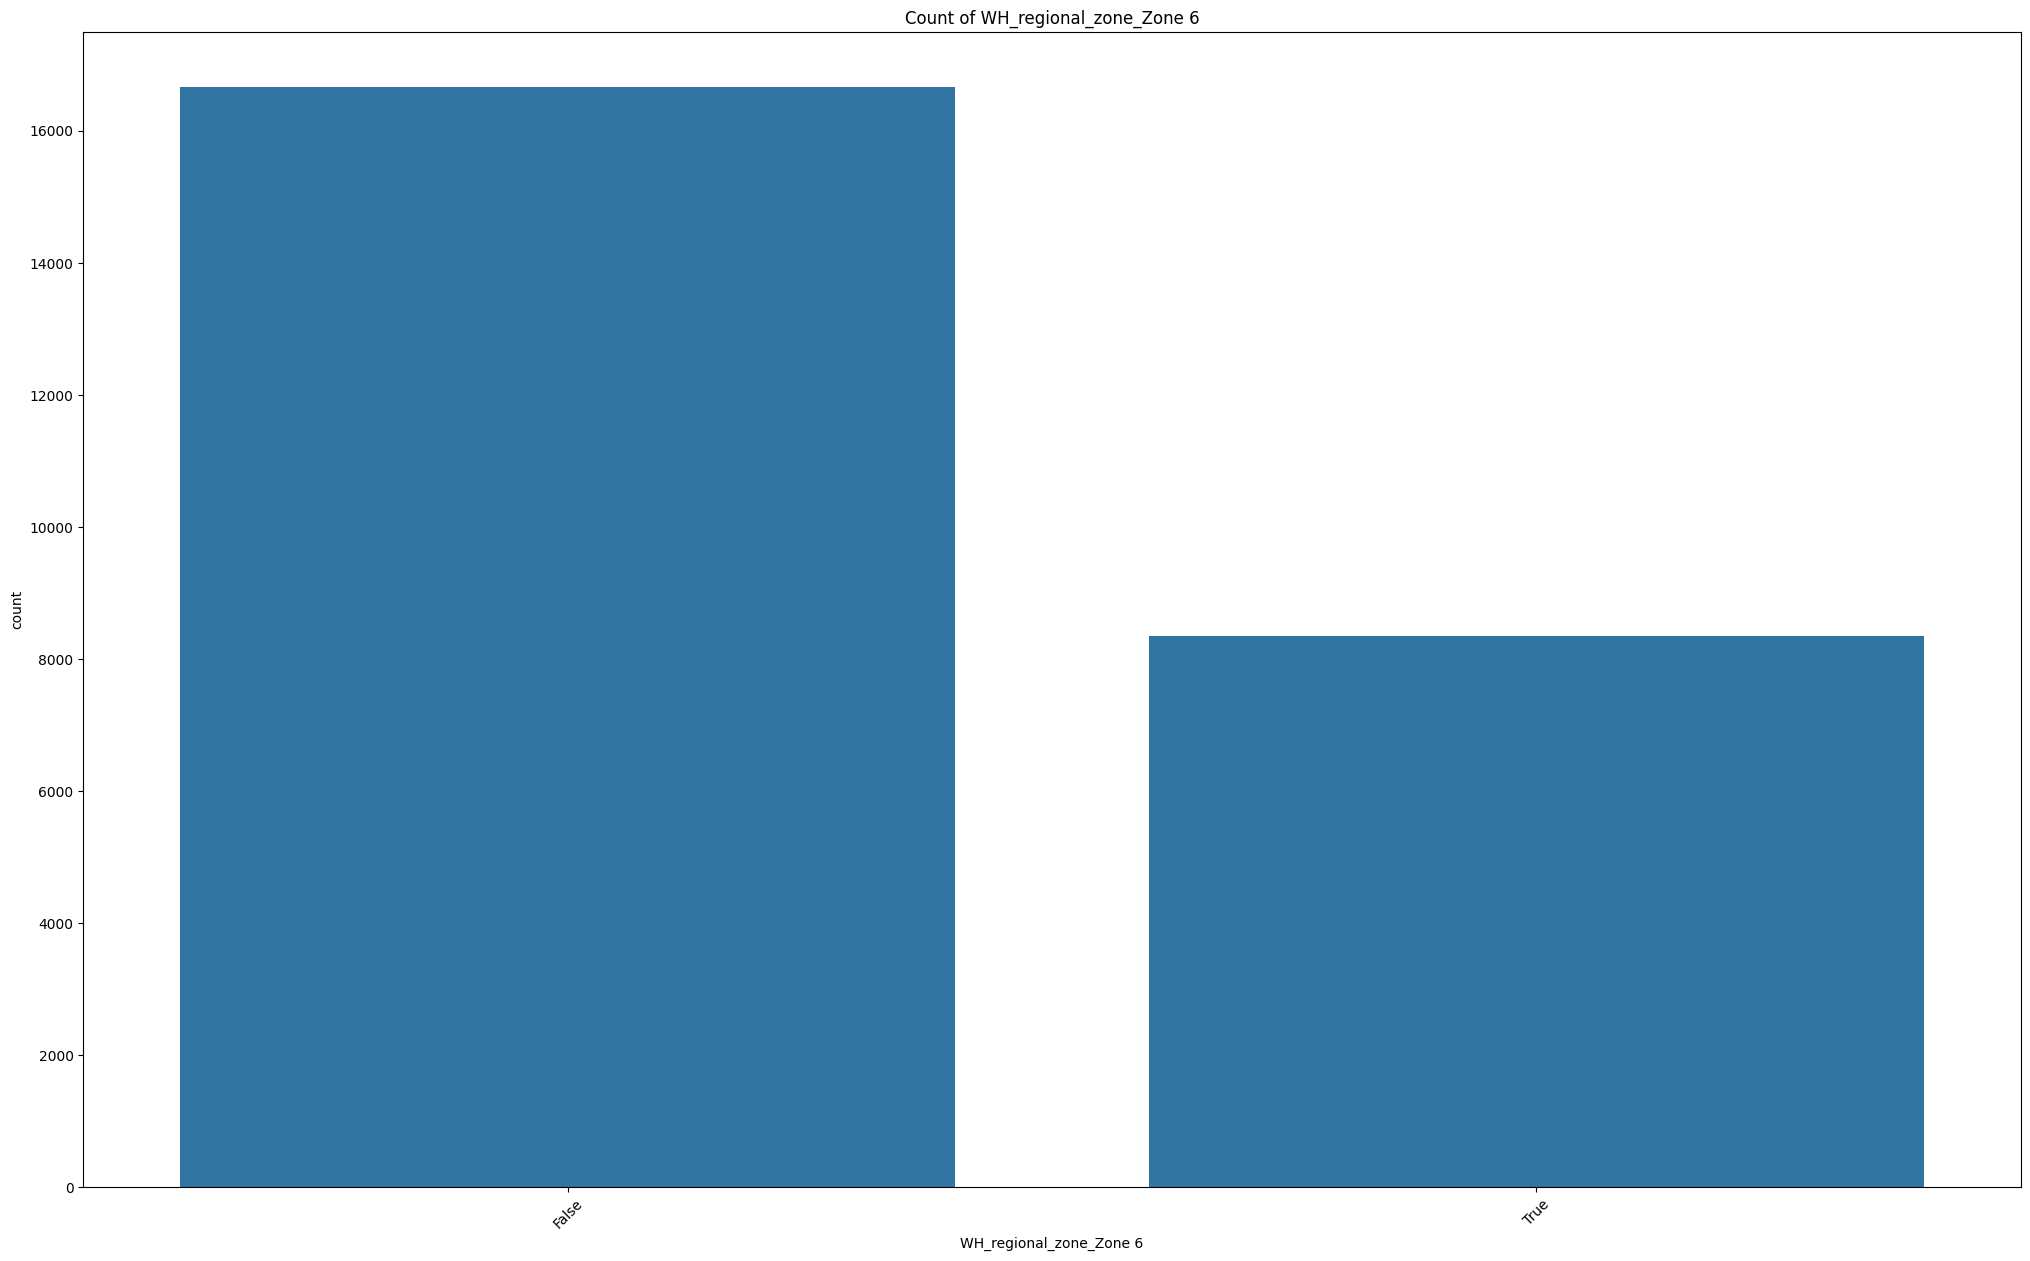

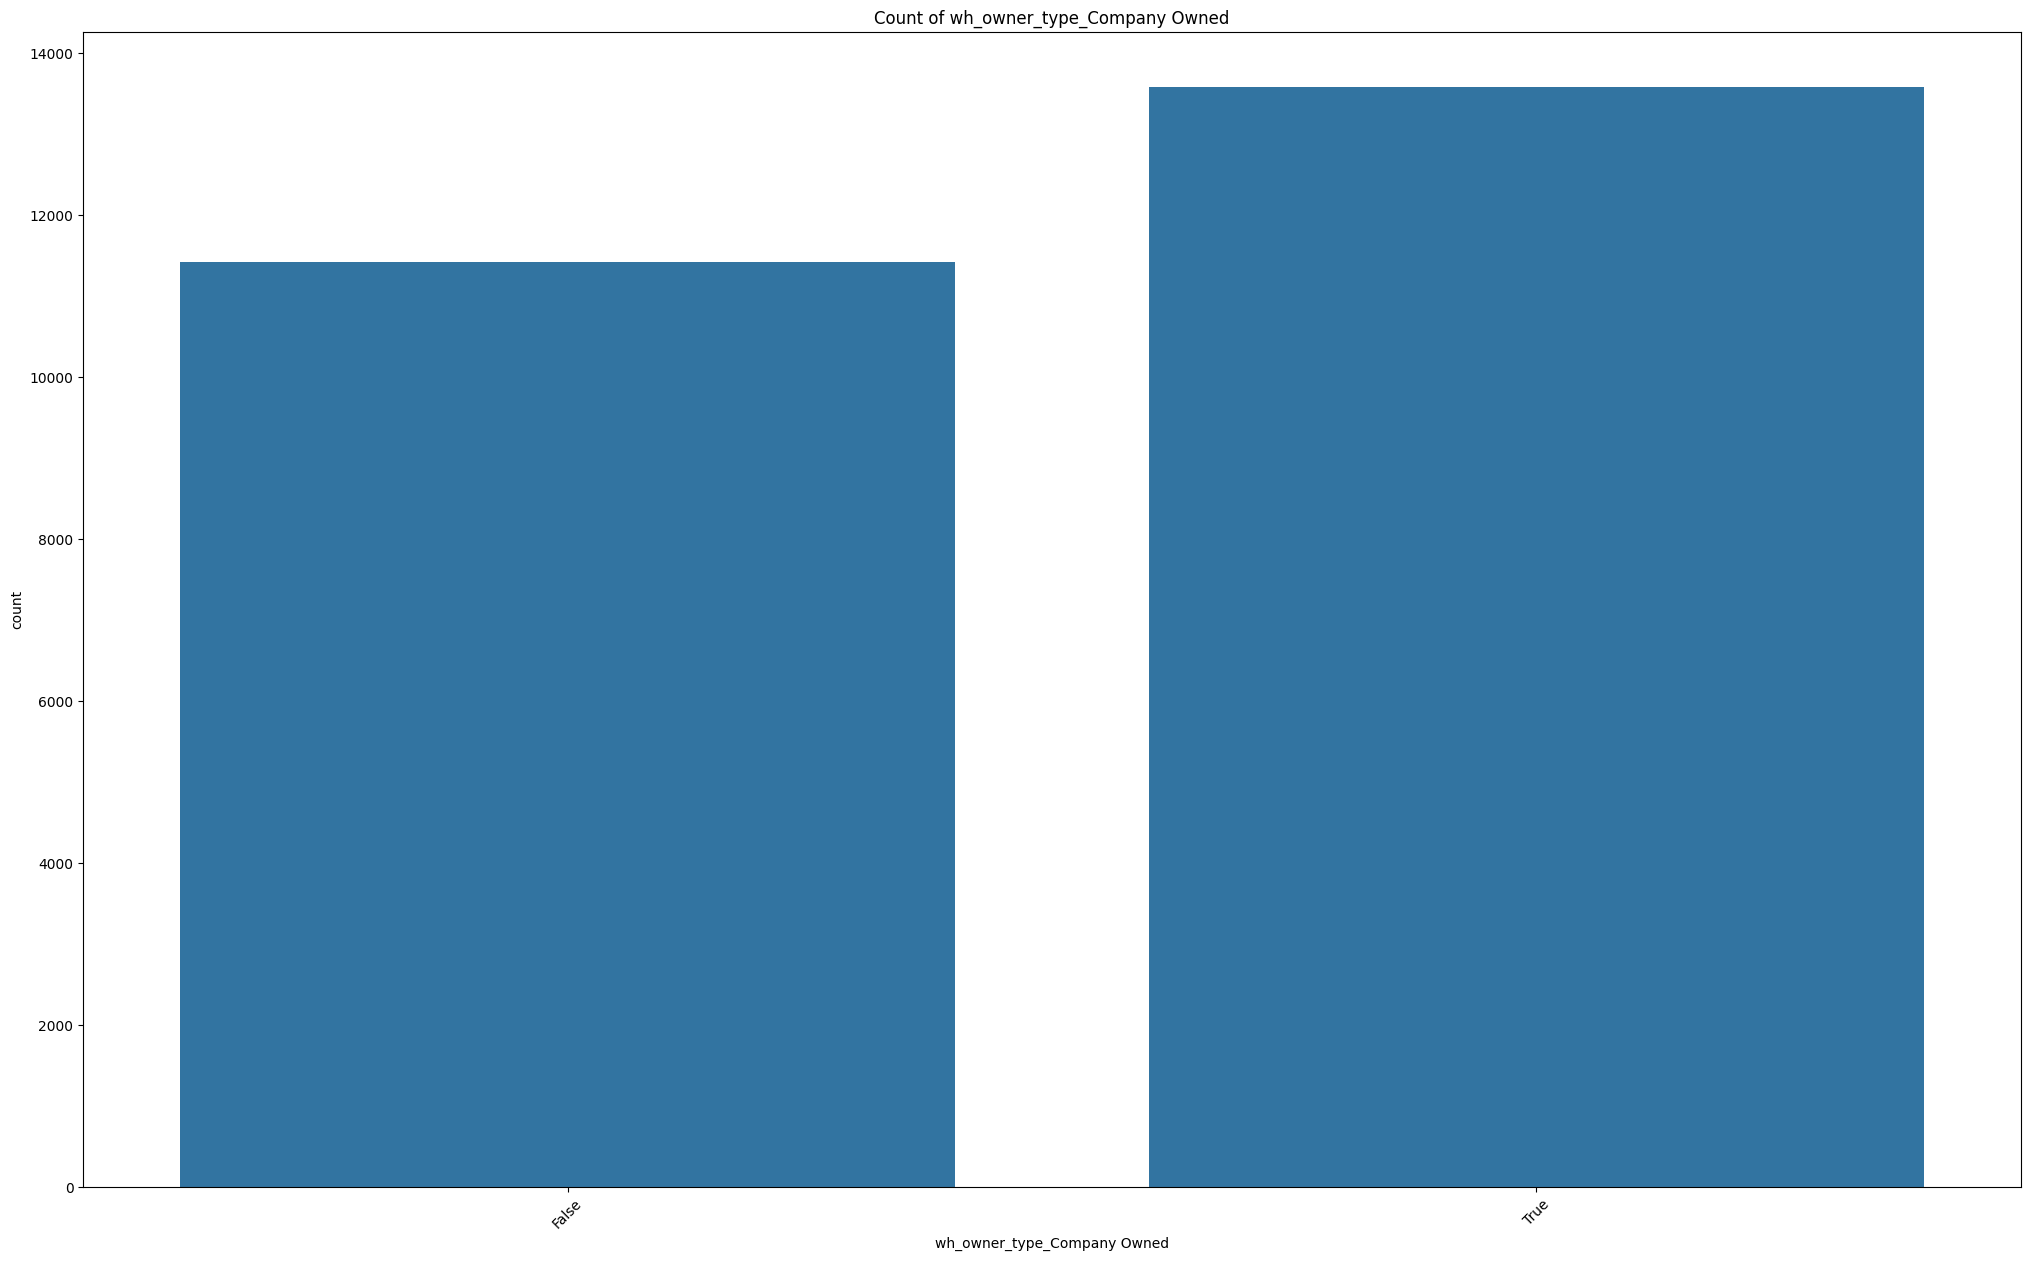

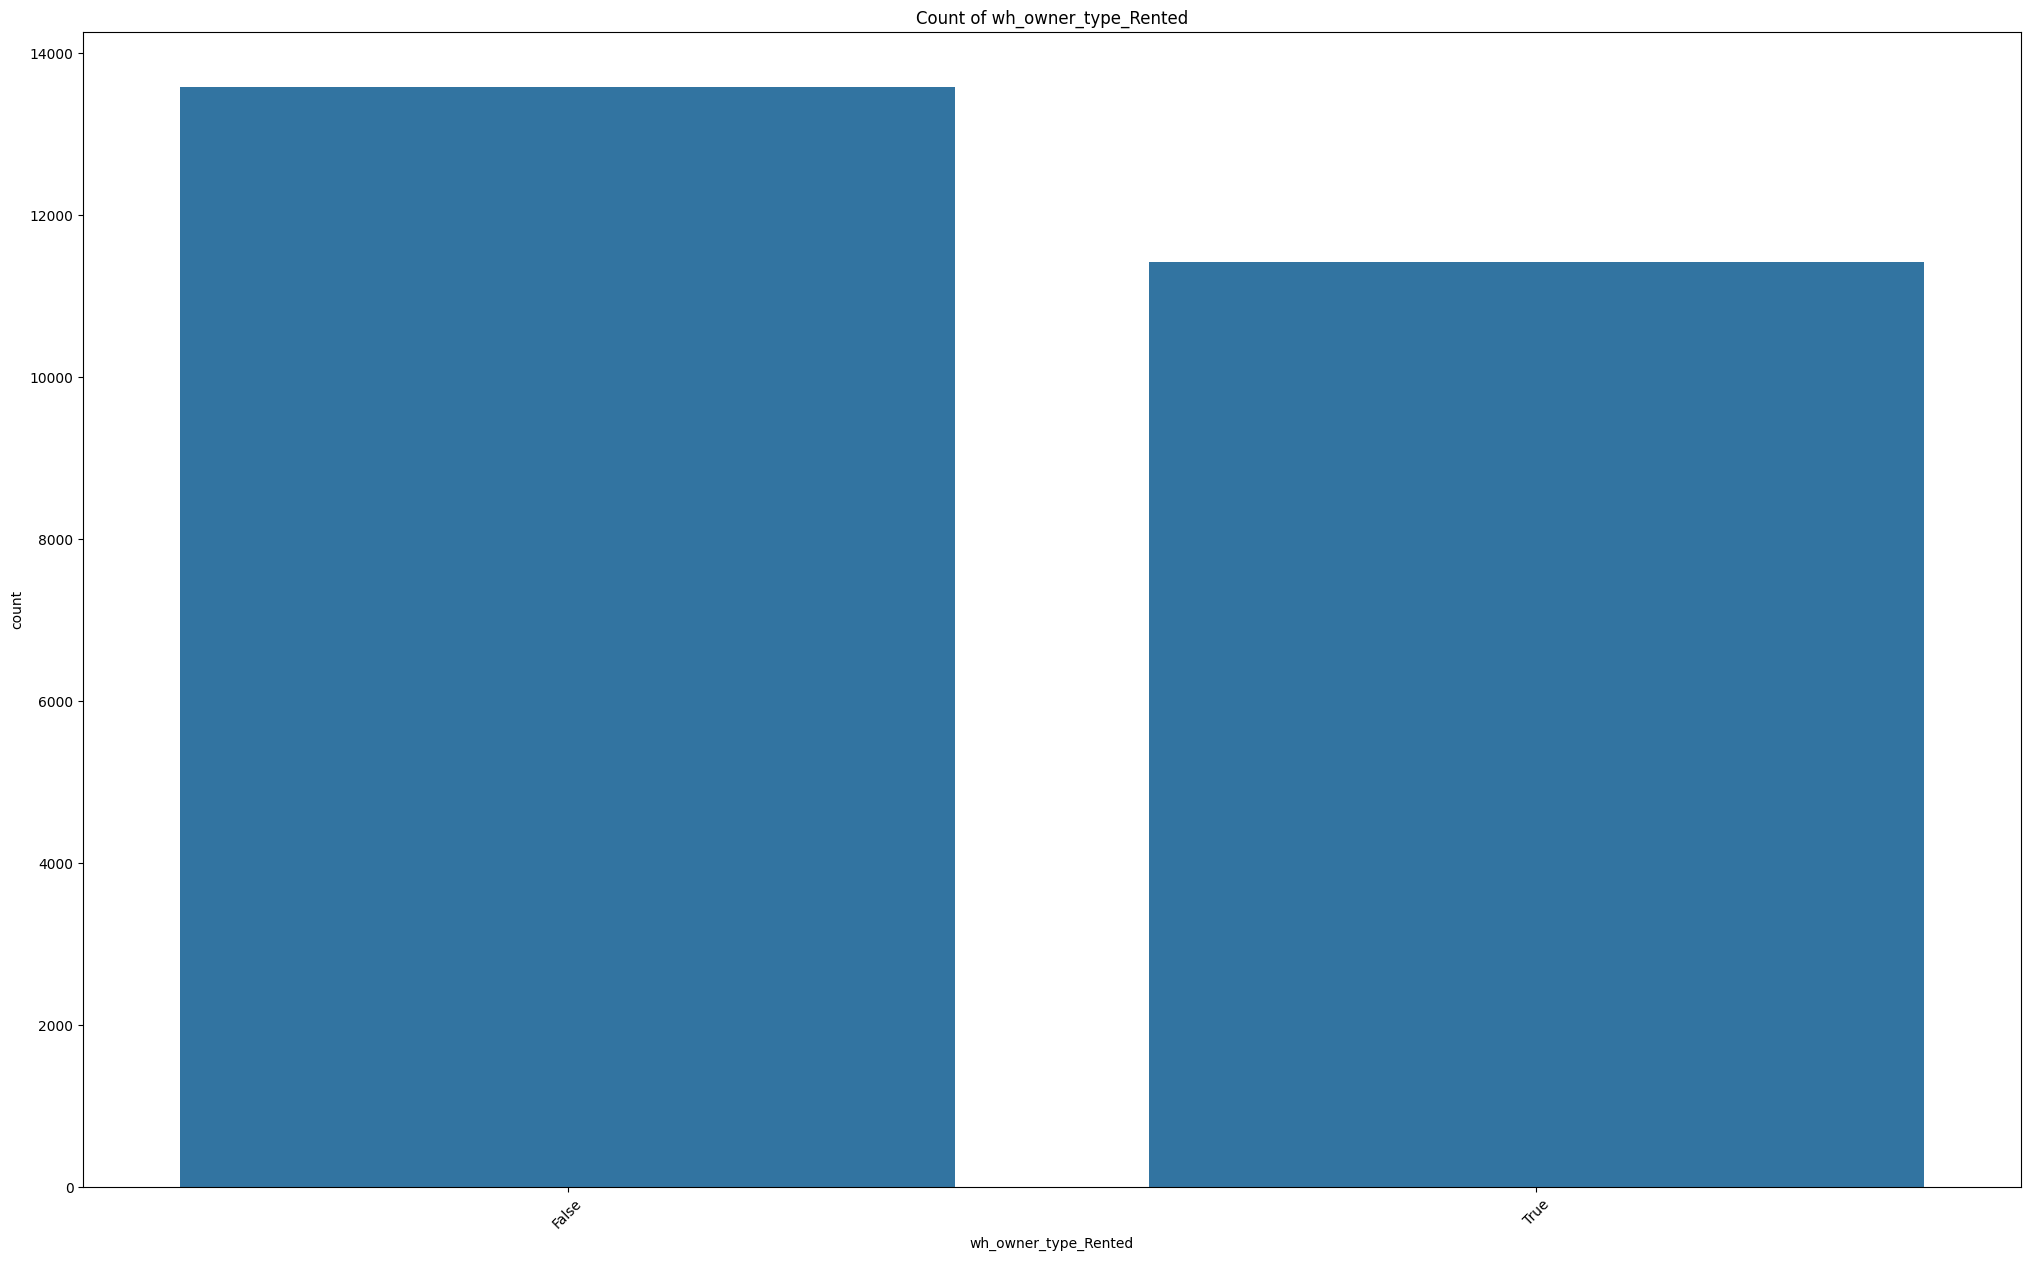

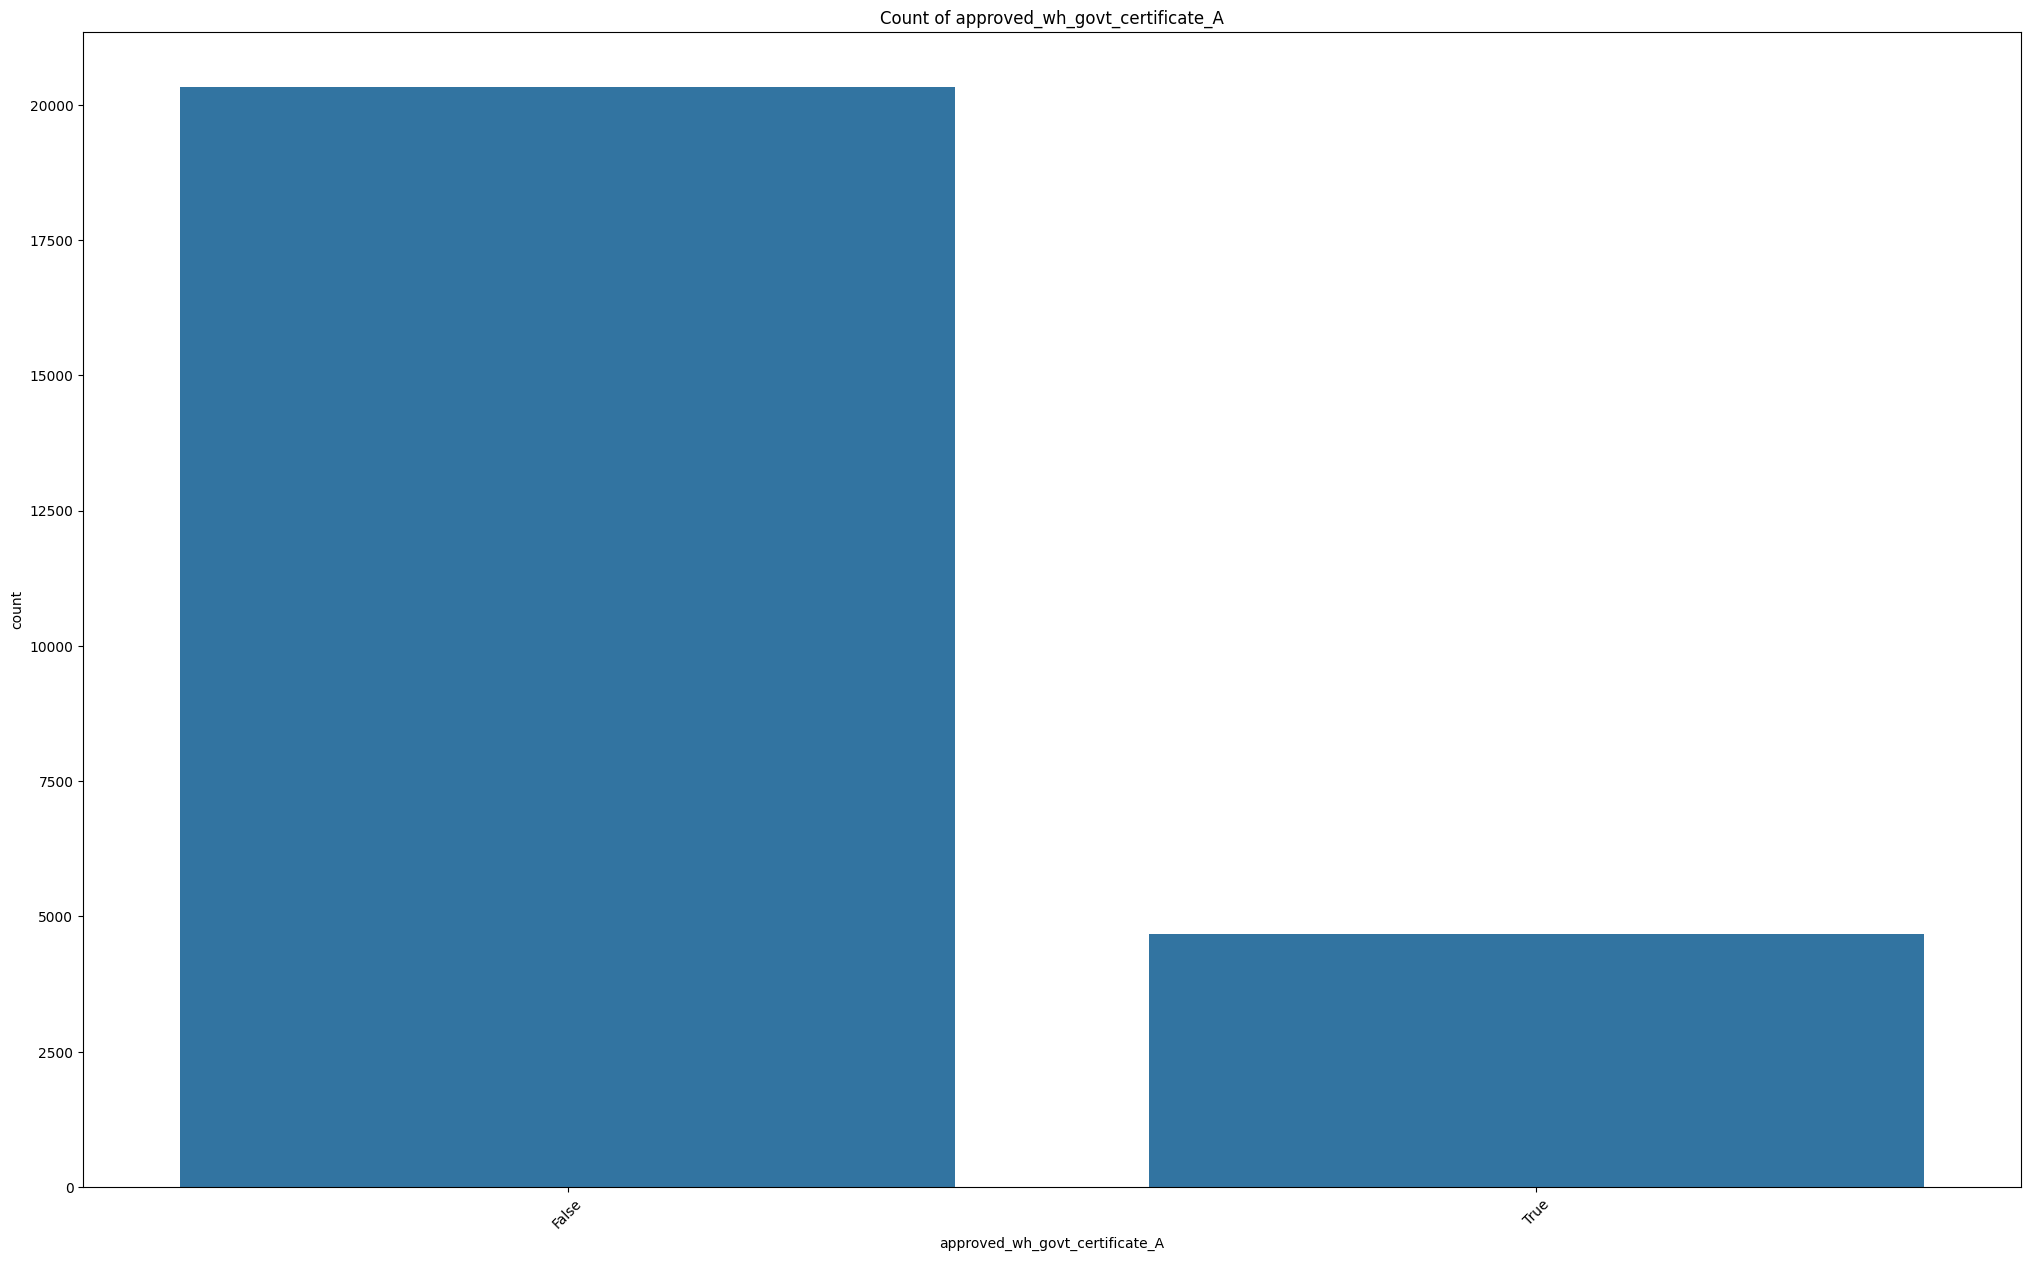

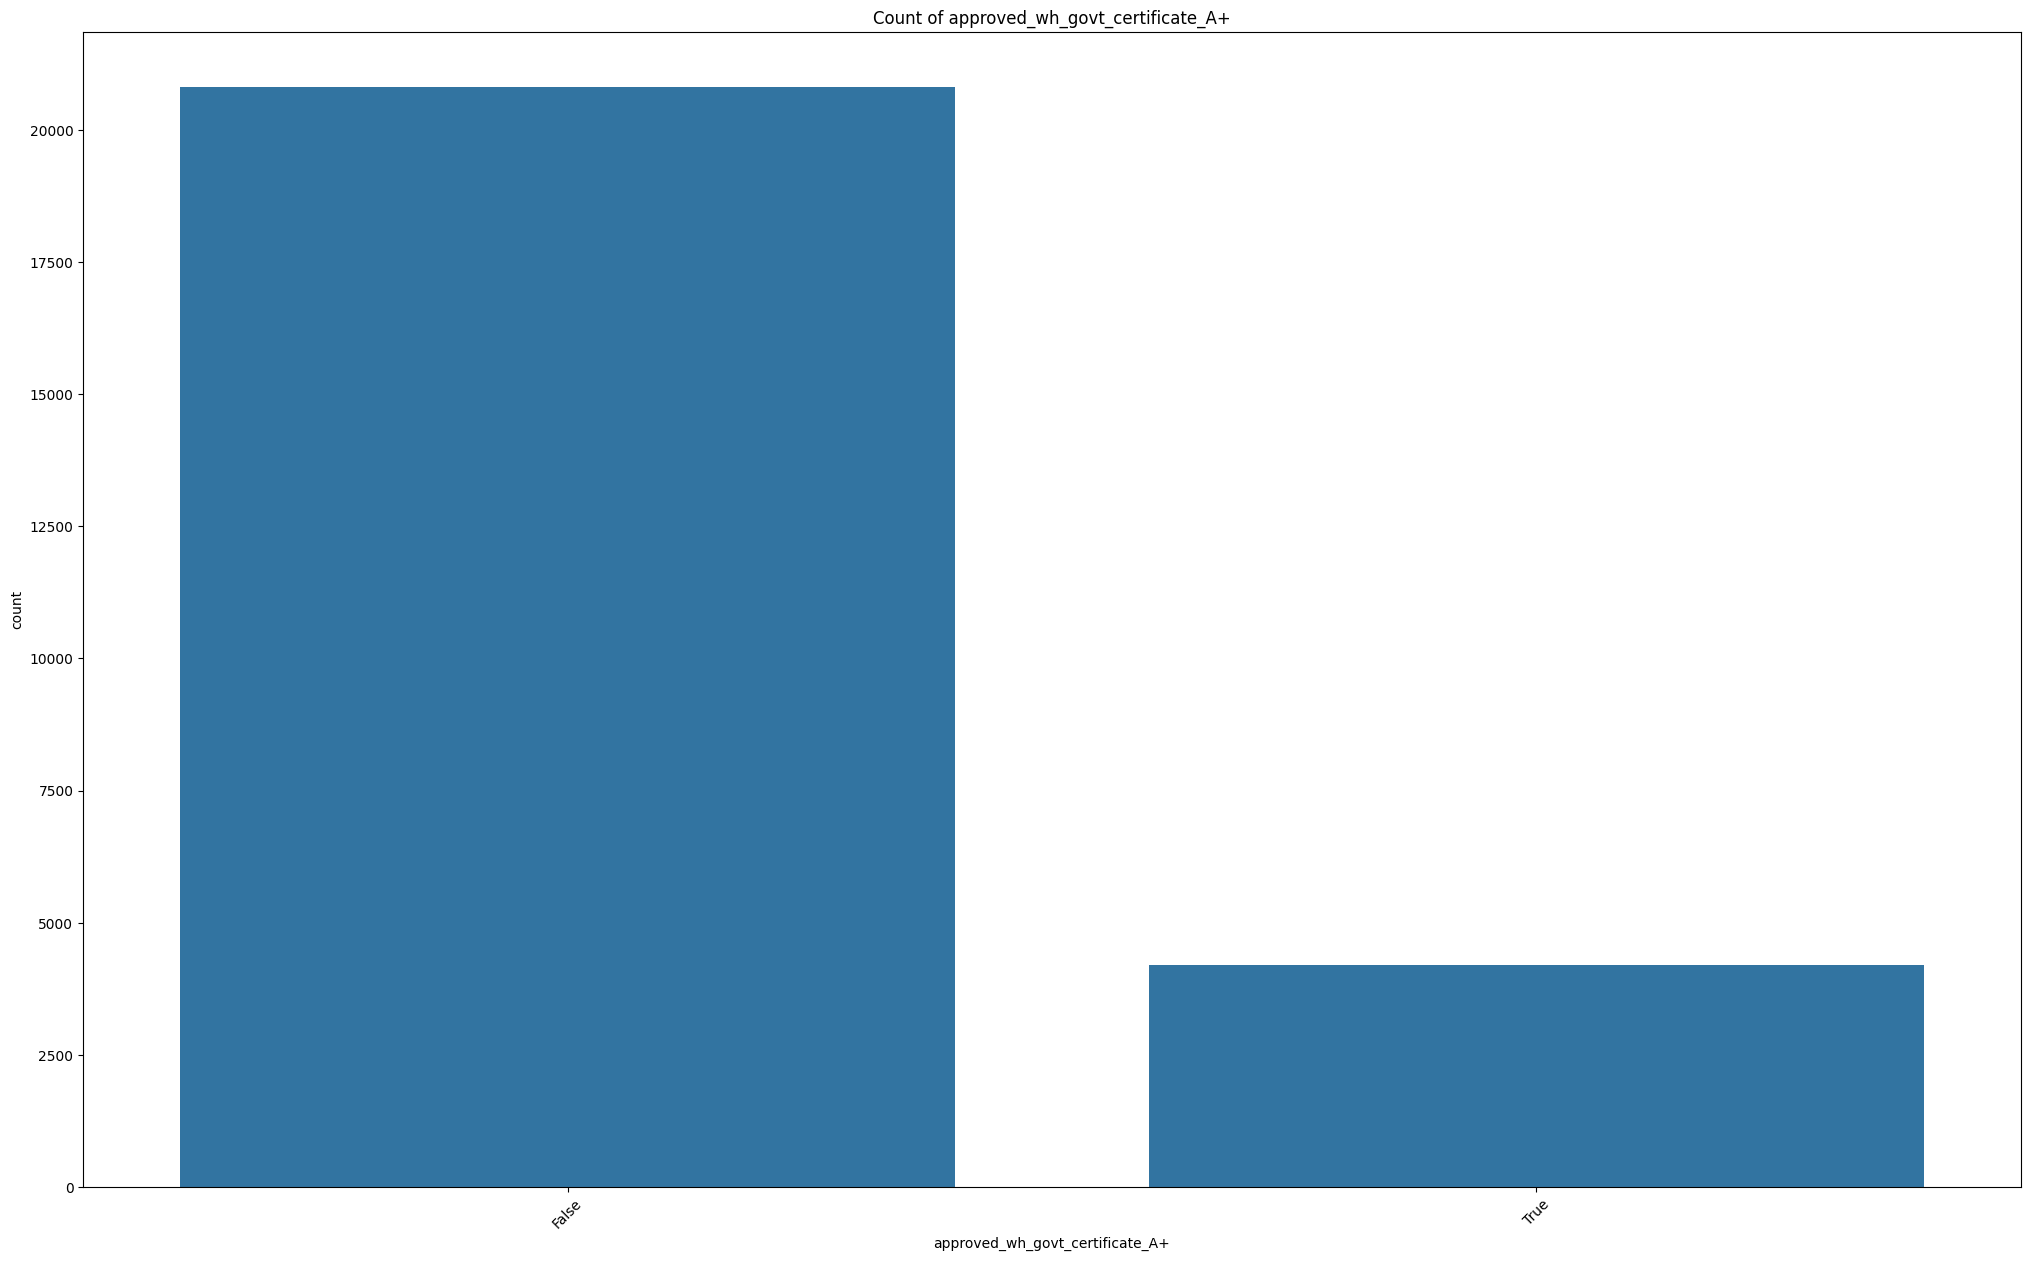

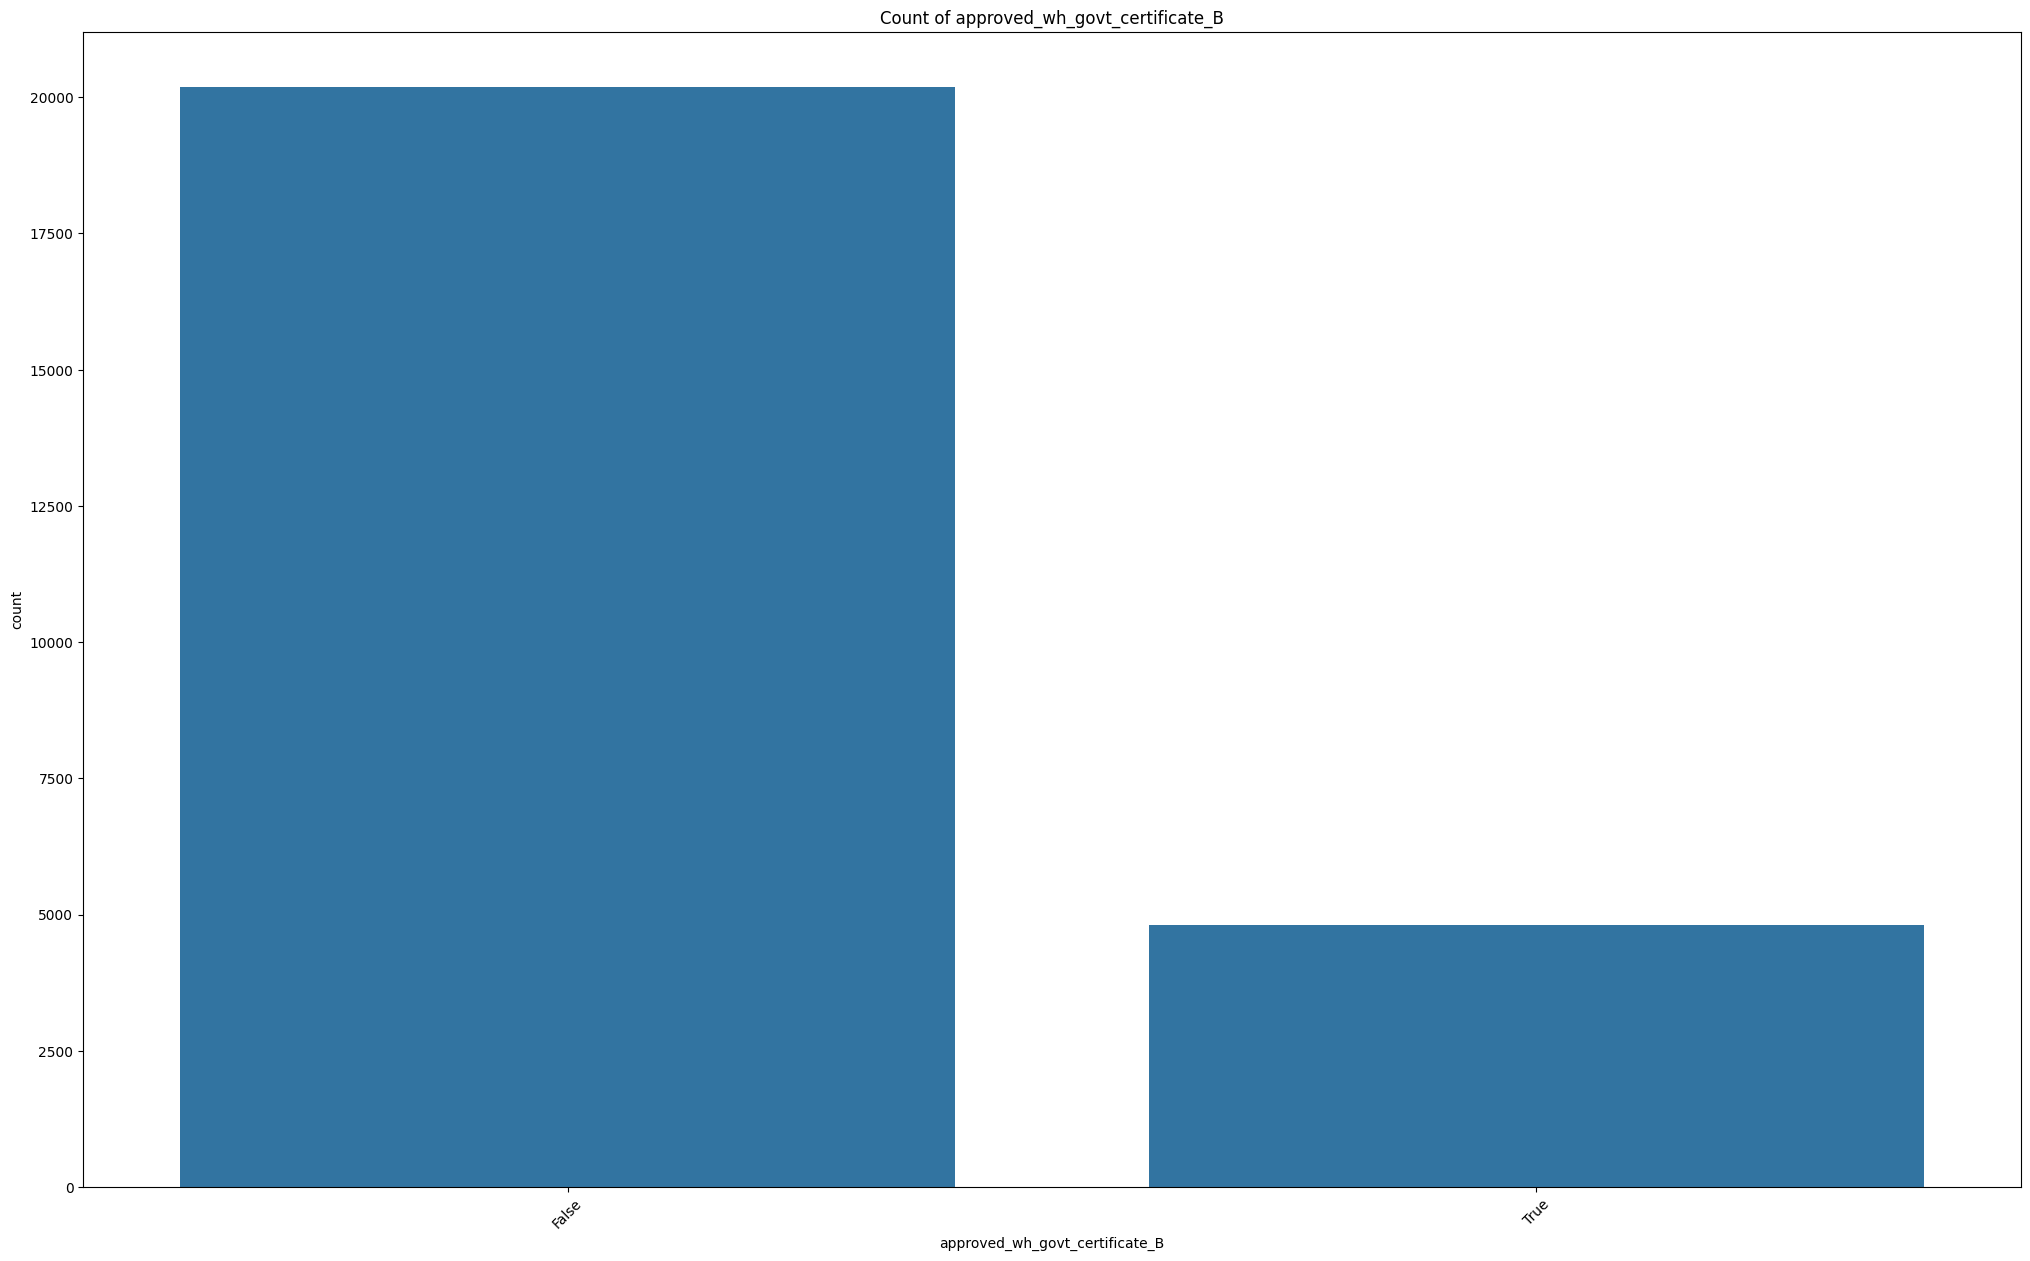

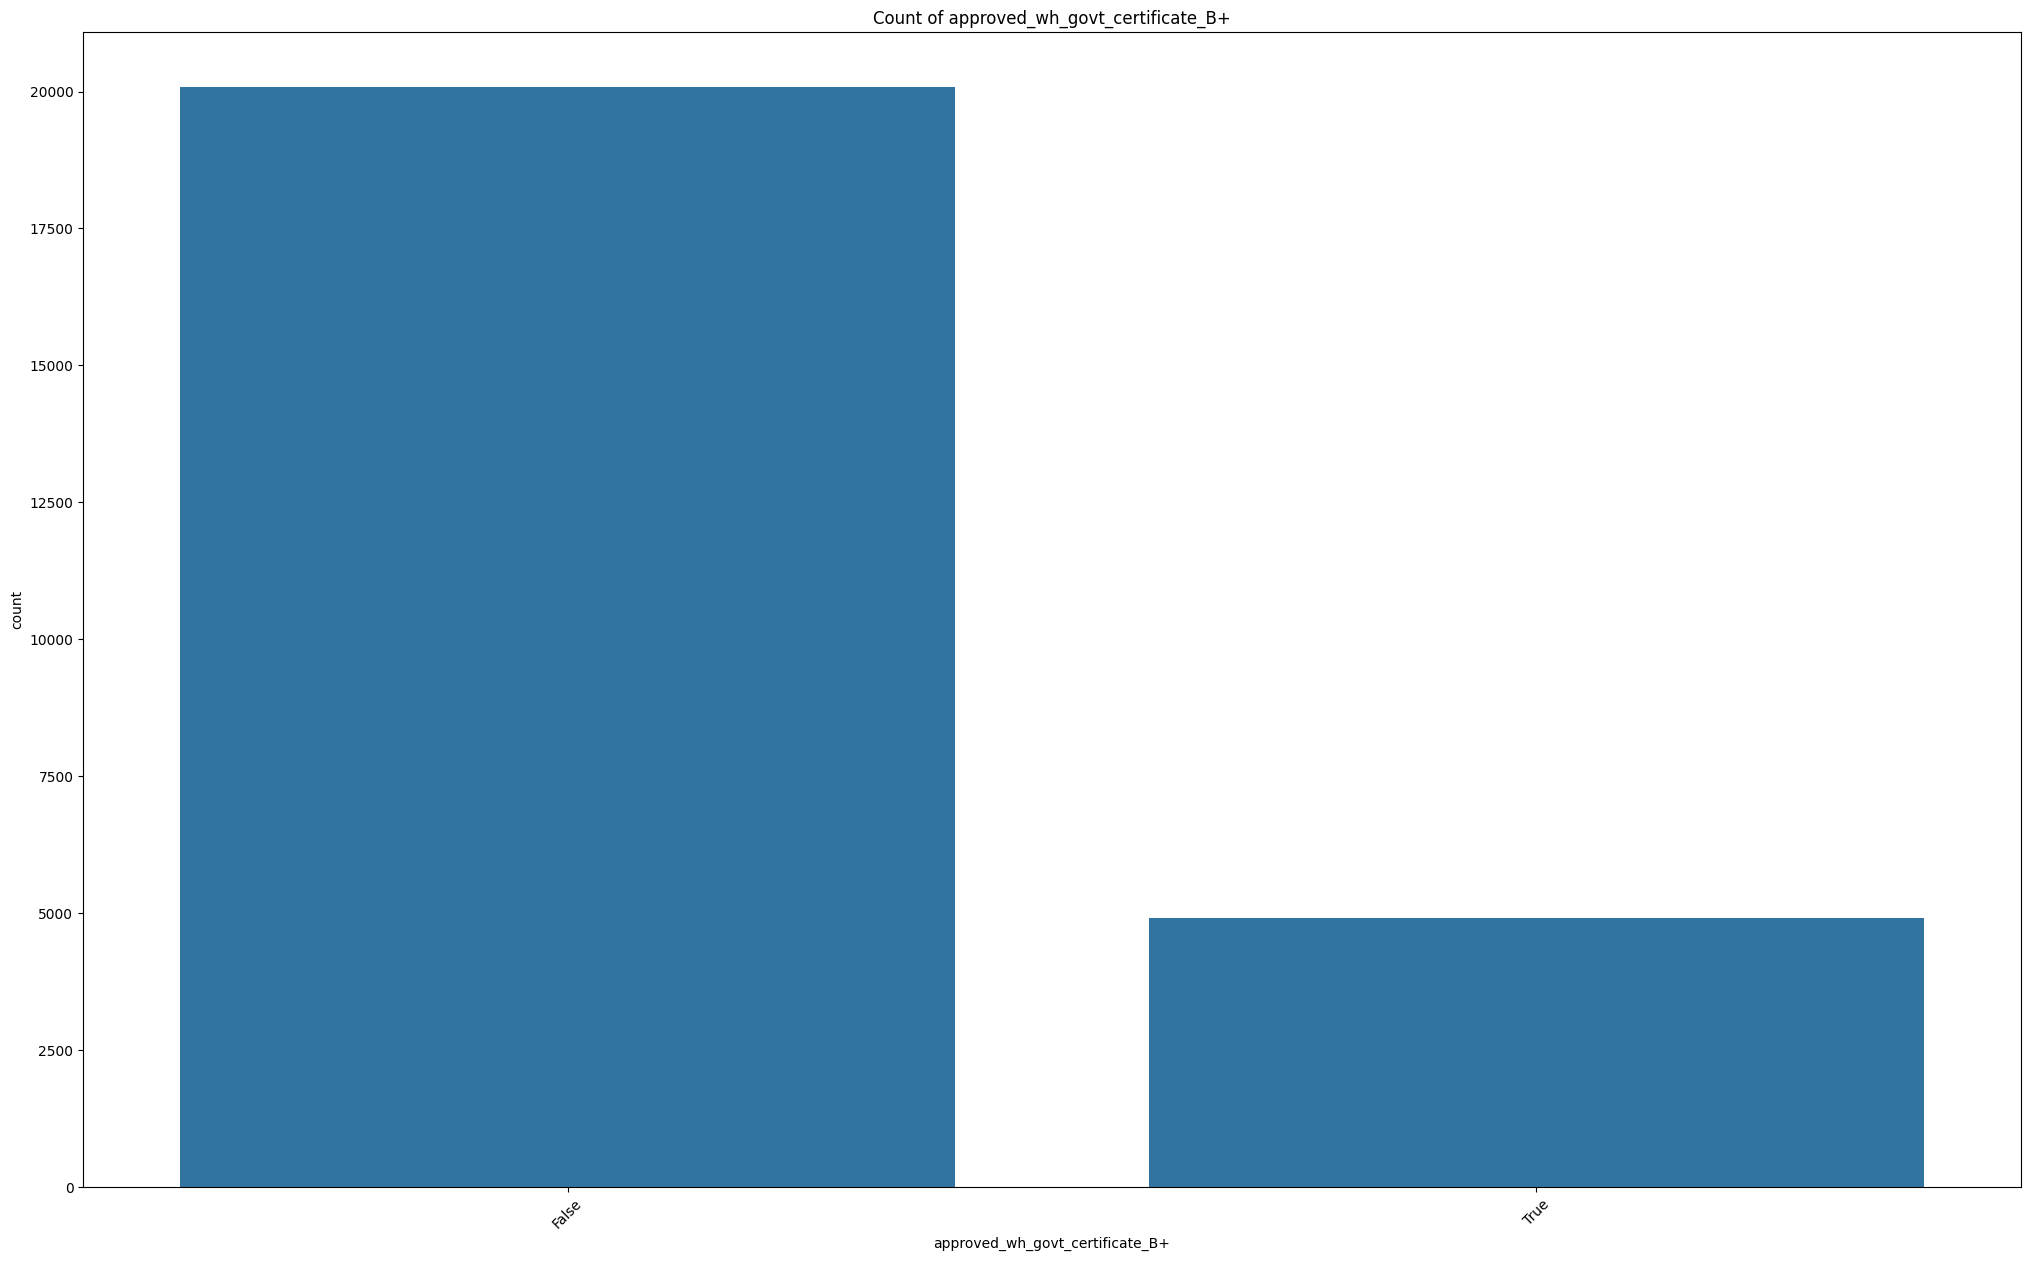

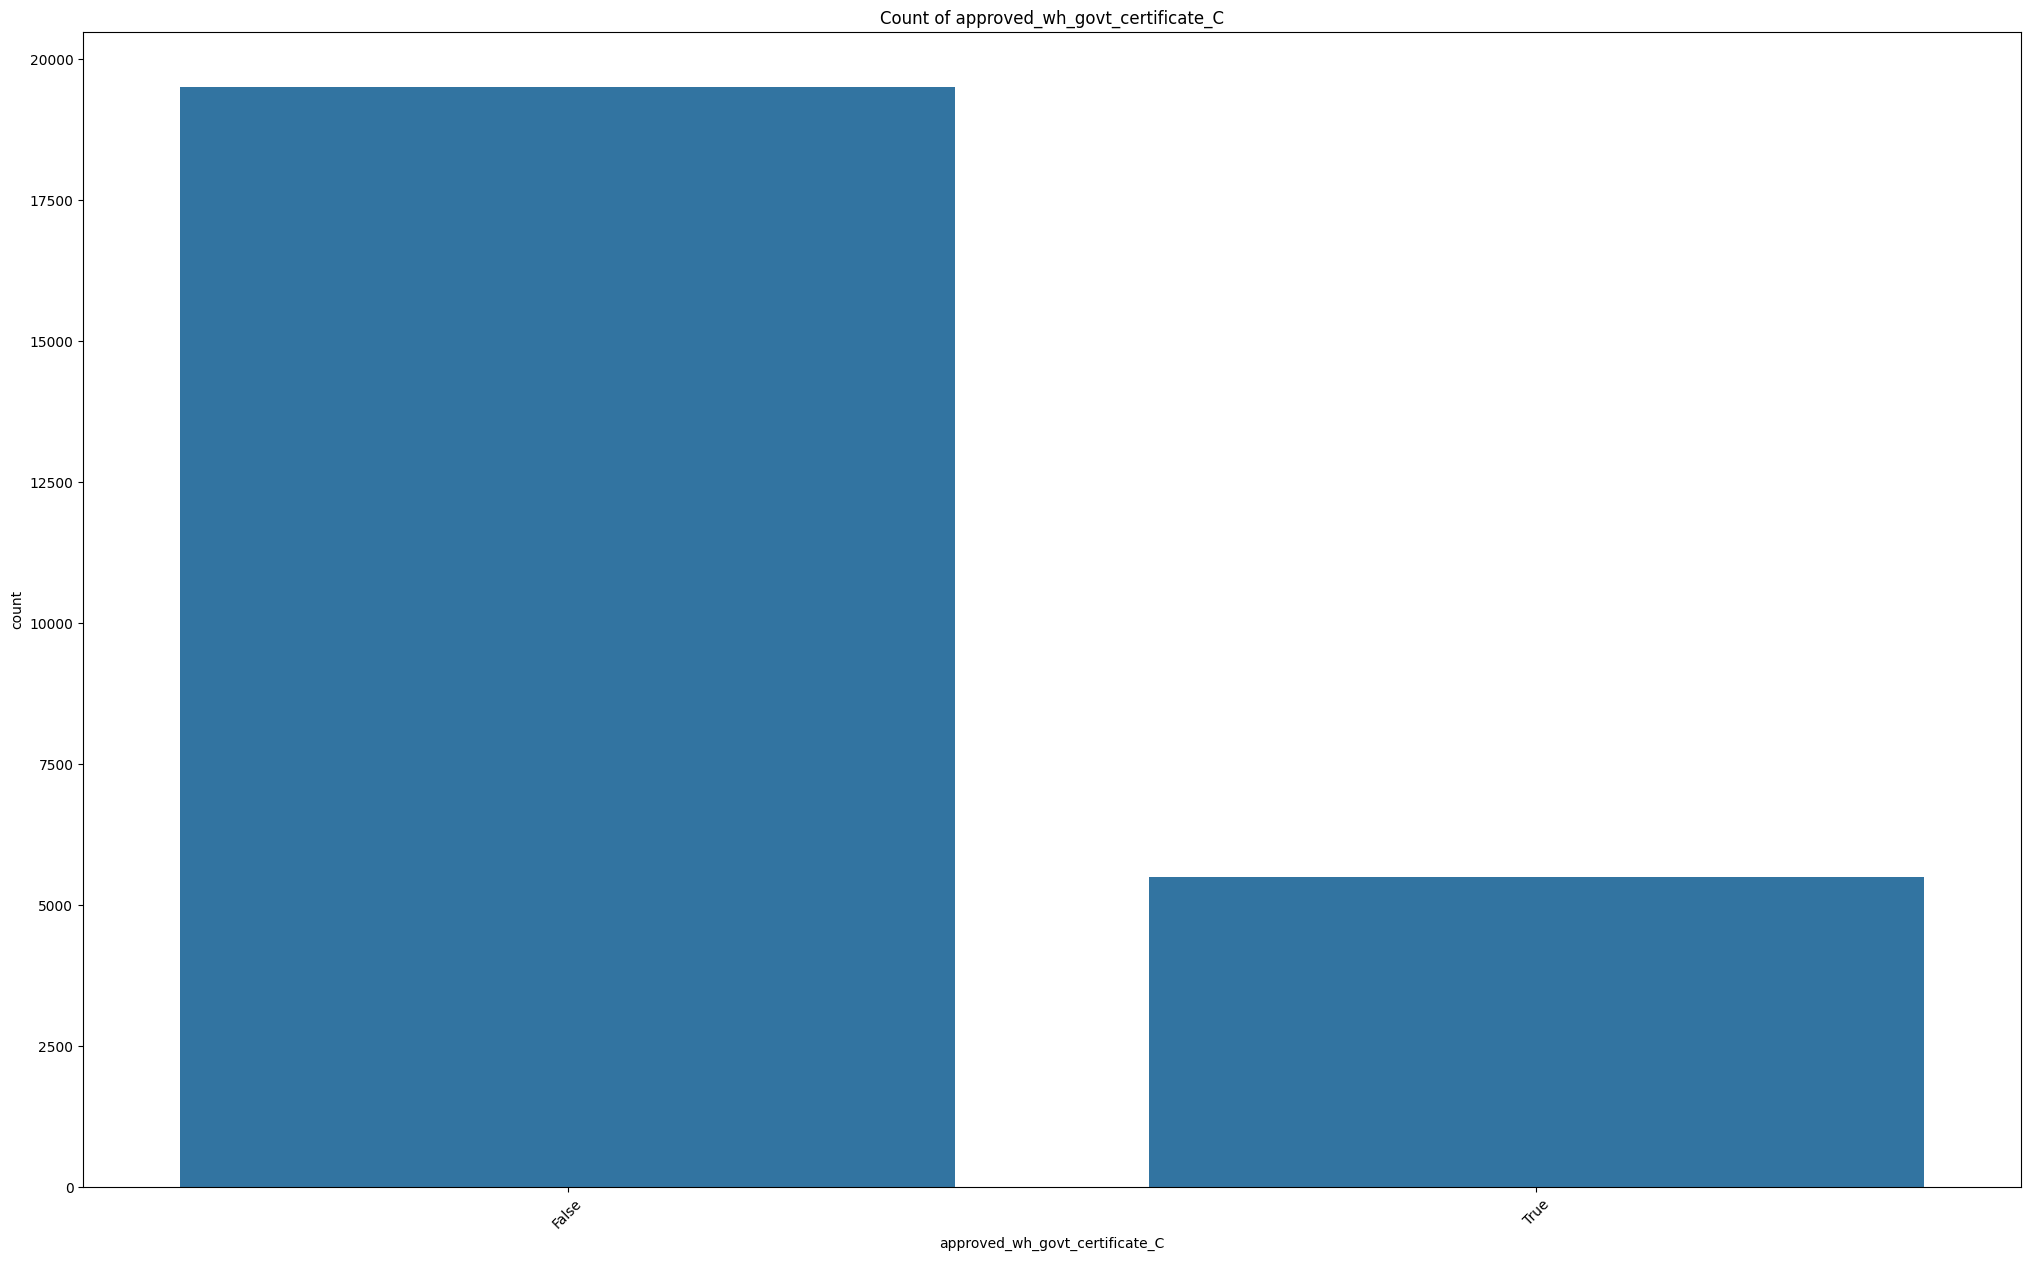

In [78]:
# Histogram for numerical variables
numerical_cols = ['WH_capacity_size', 'num_refill_req_l3m', 'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'wh_est_year', 'product_wg_ton']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical variables
categorical_cols = ['Location_type_Rural', 'Location_type_Urban', 'zone_East', 'zone_North', 'zone_South', 'zone_West',
                    'WH_regional_zone_Zone 1', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
                    'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Company Owned', 'wh_owner_type_Rented',
                    'approved_wh_govt_certificate_A', 'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
                    'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']

for col in categorical_cols:
    plt.figure(figsize=(25, 15))
    sns.countplot(data=df_encoded, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


## **EDA - Bivariate Analysis:**
*  **Explore Relationships between Numerical Variables:** Use techniques such as pairplot, boxplot, and correlation heatmap to investigate relationships between pairs of numerical variables in the dataset.
*  **Investigate Relationship between Numerical and Categorical Variables**:
Use boxplots or violin plots to explore the relationship between numerical and categorical variables in the dataset.

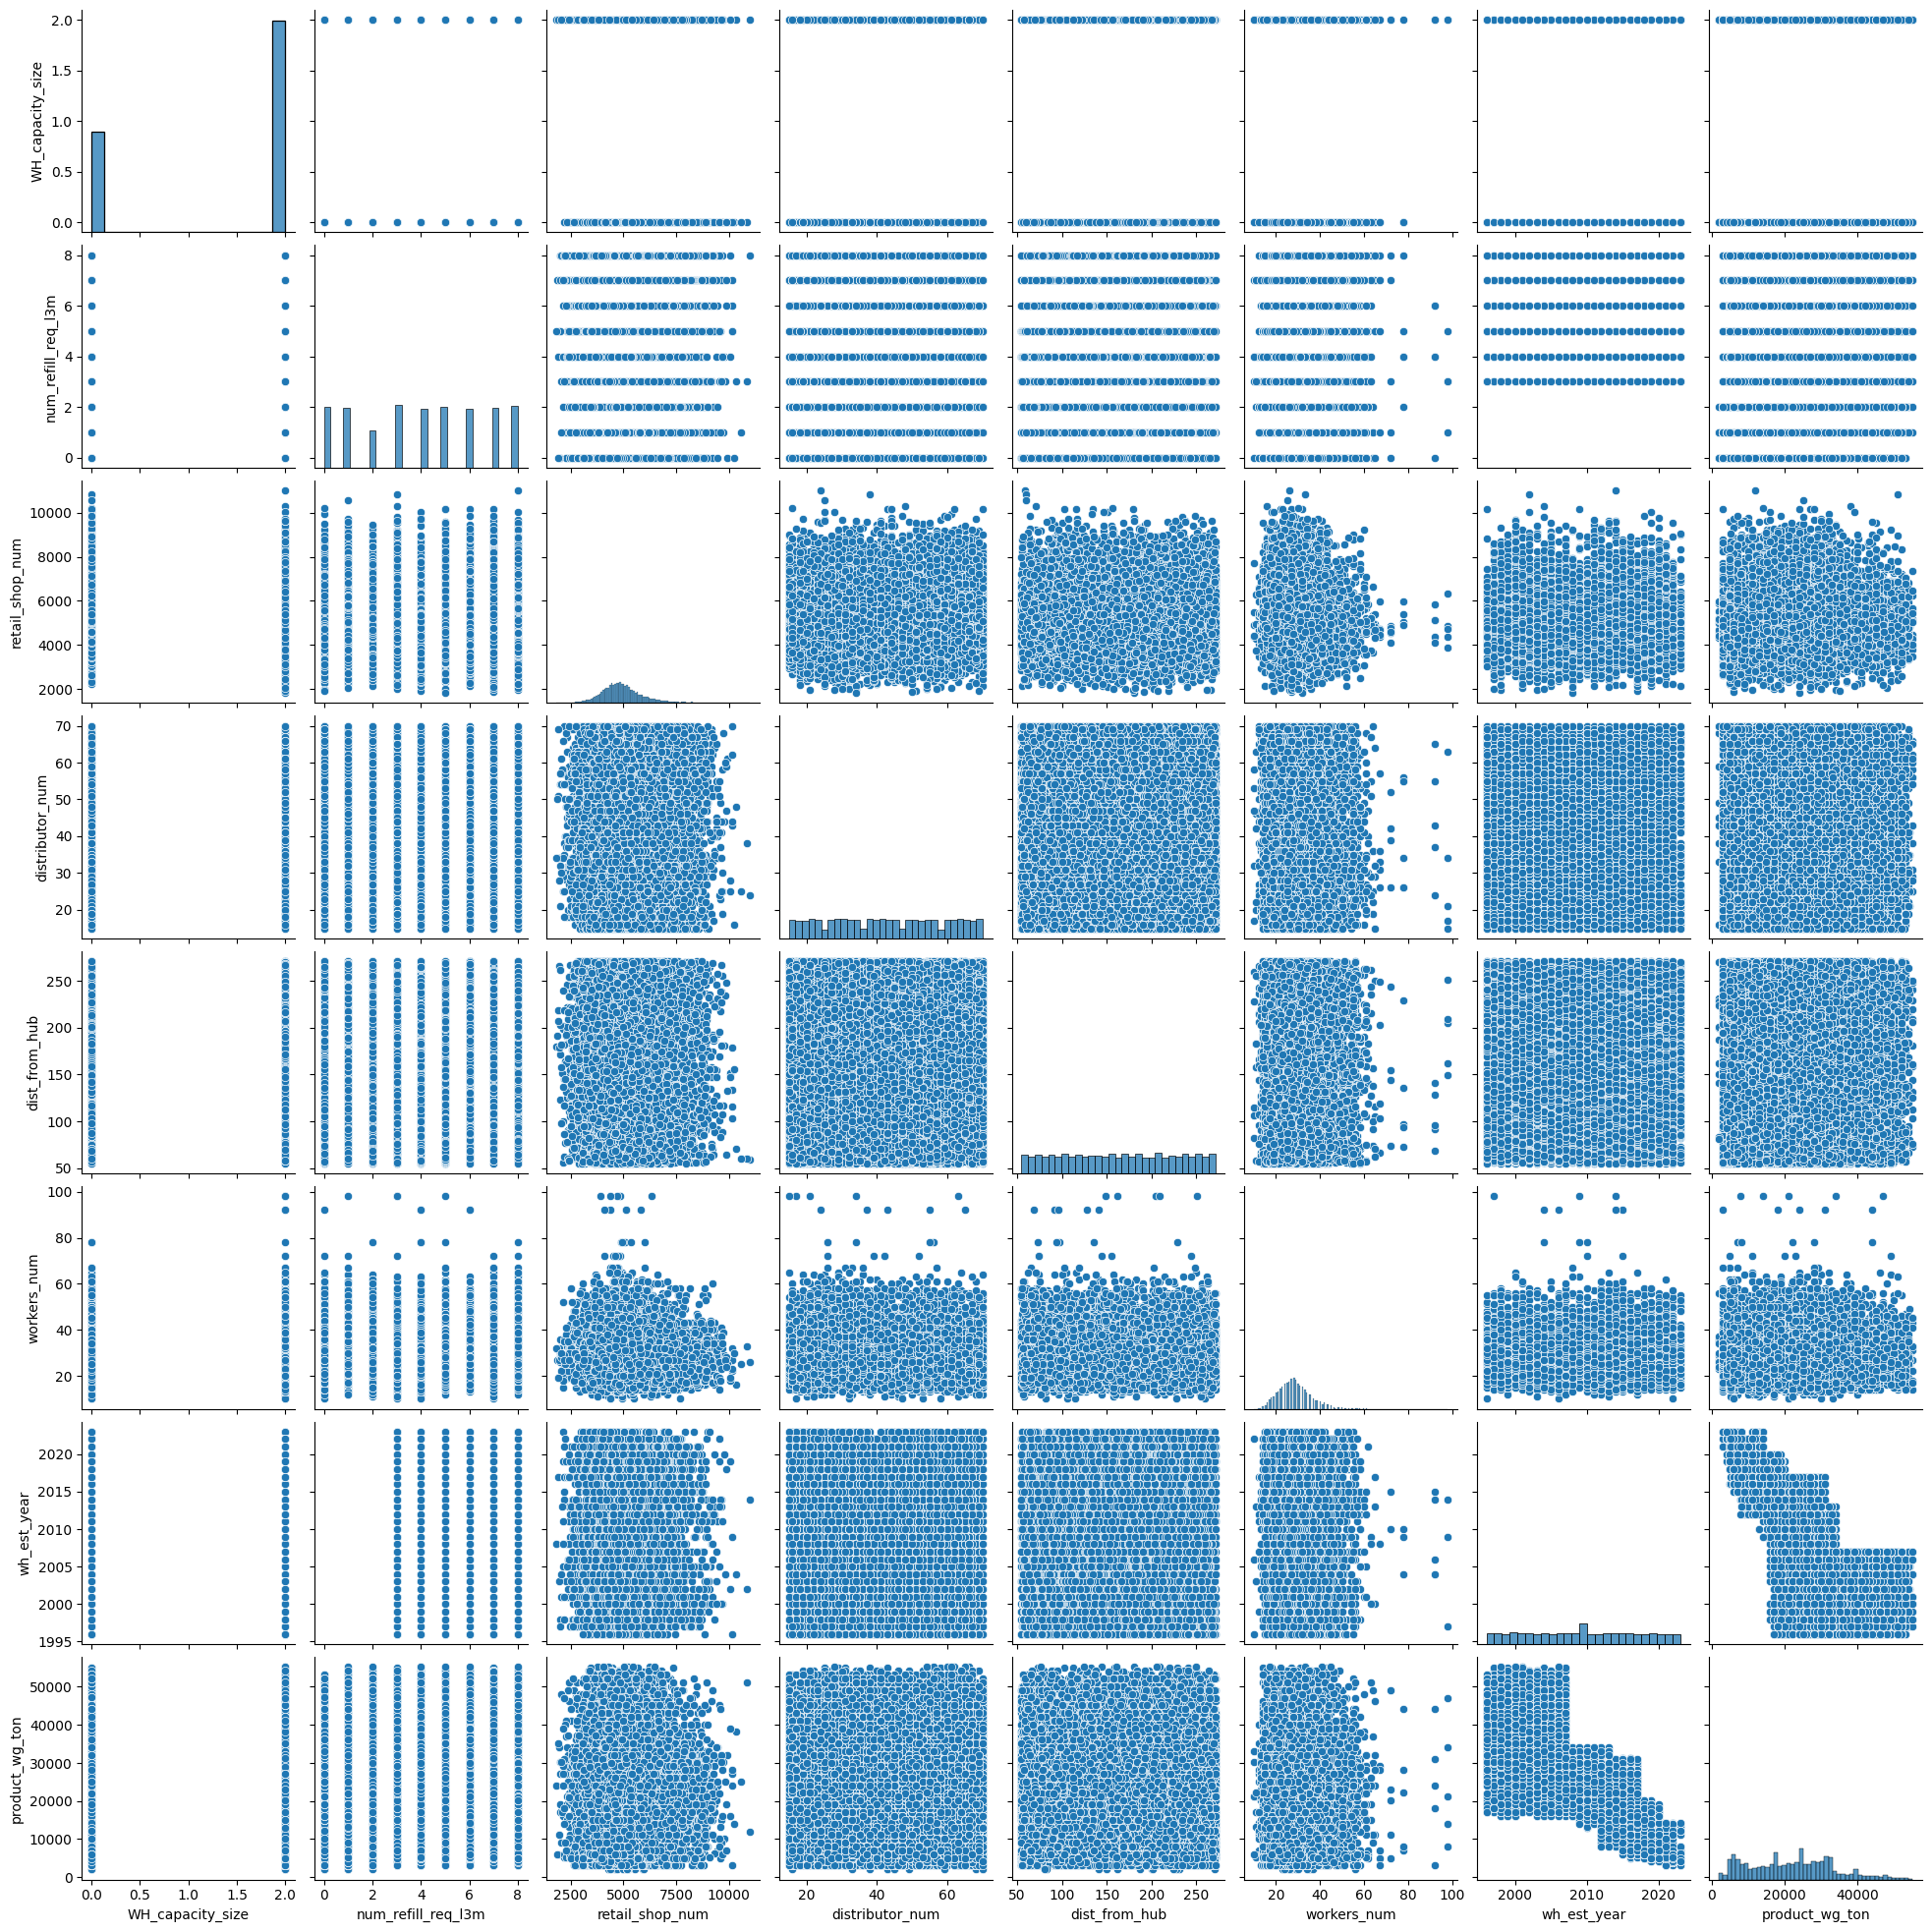

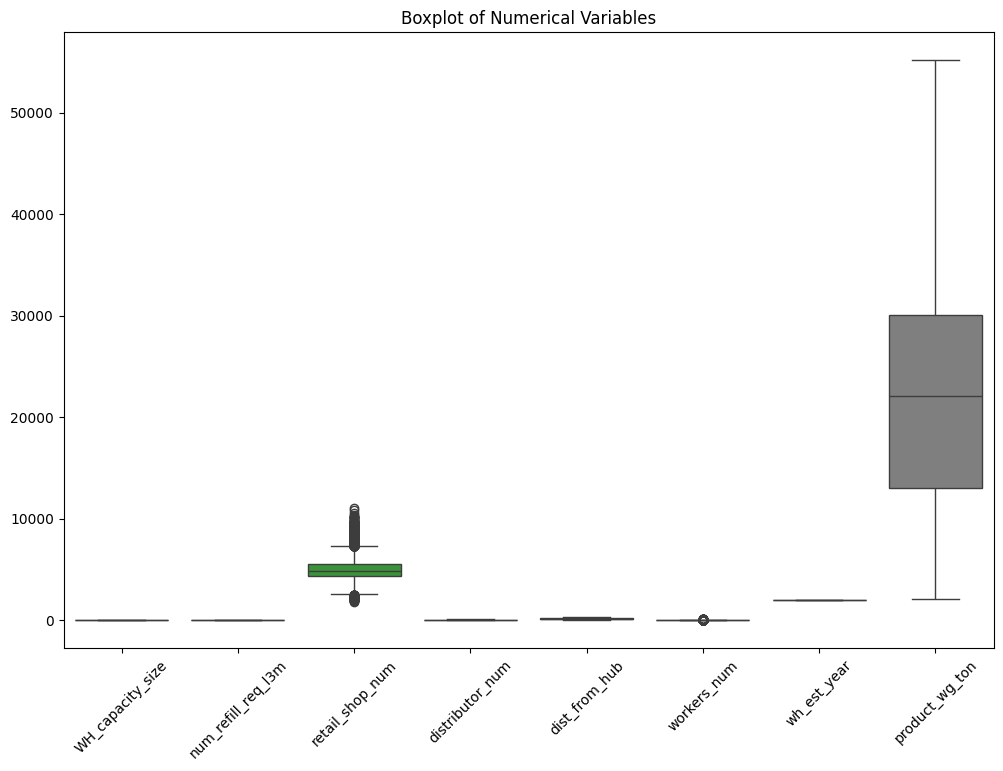

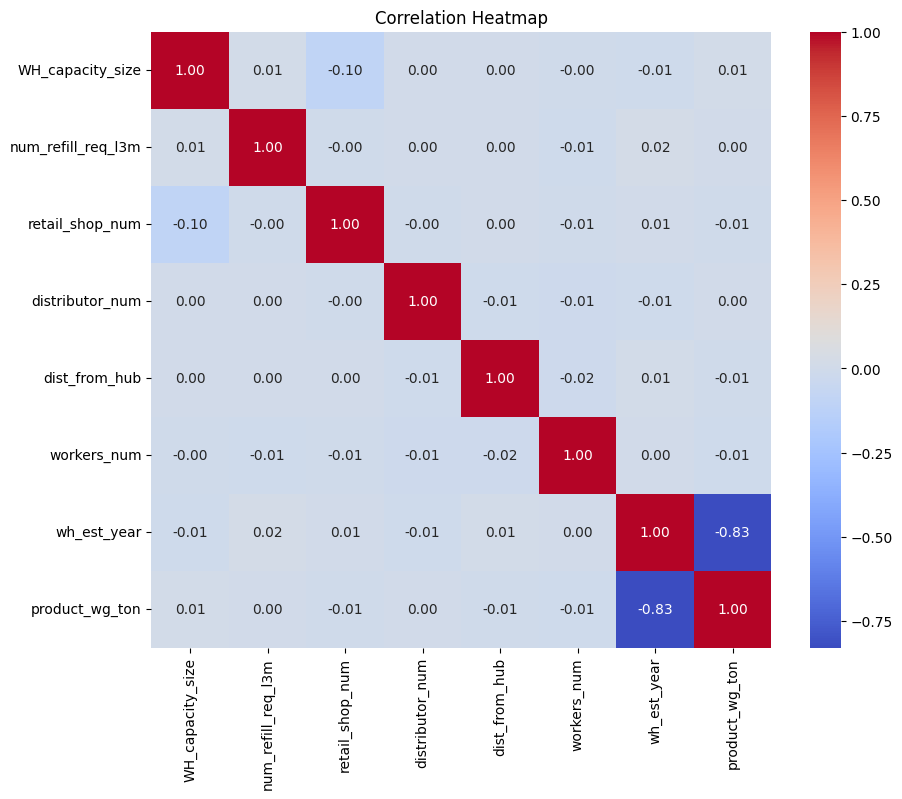

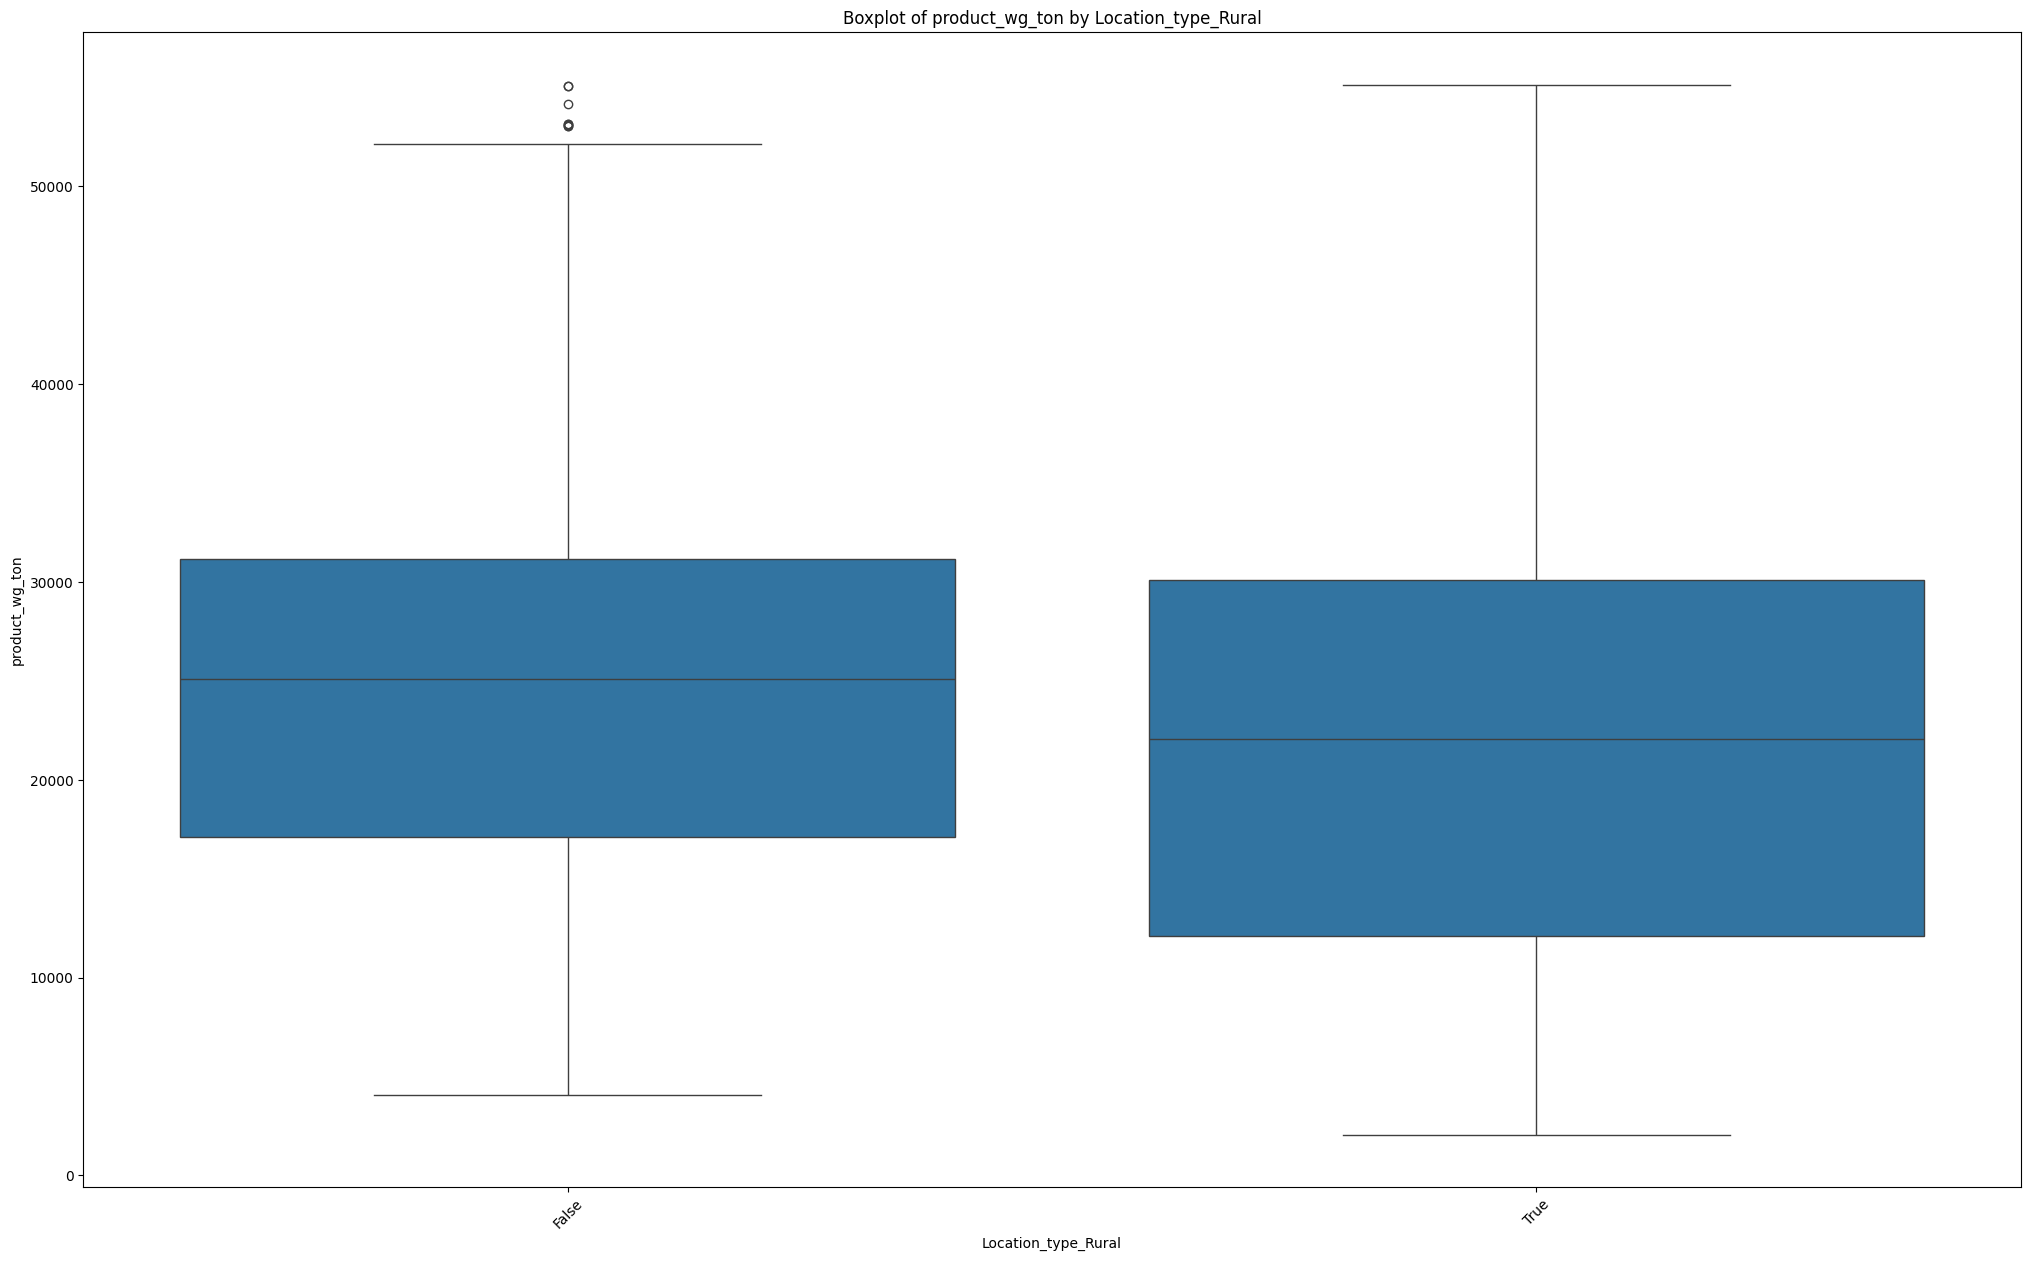

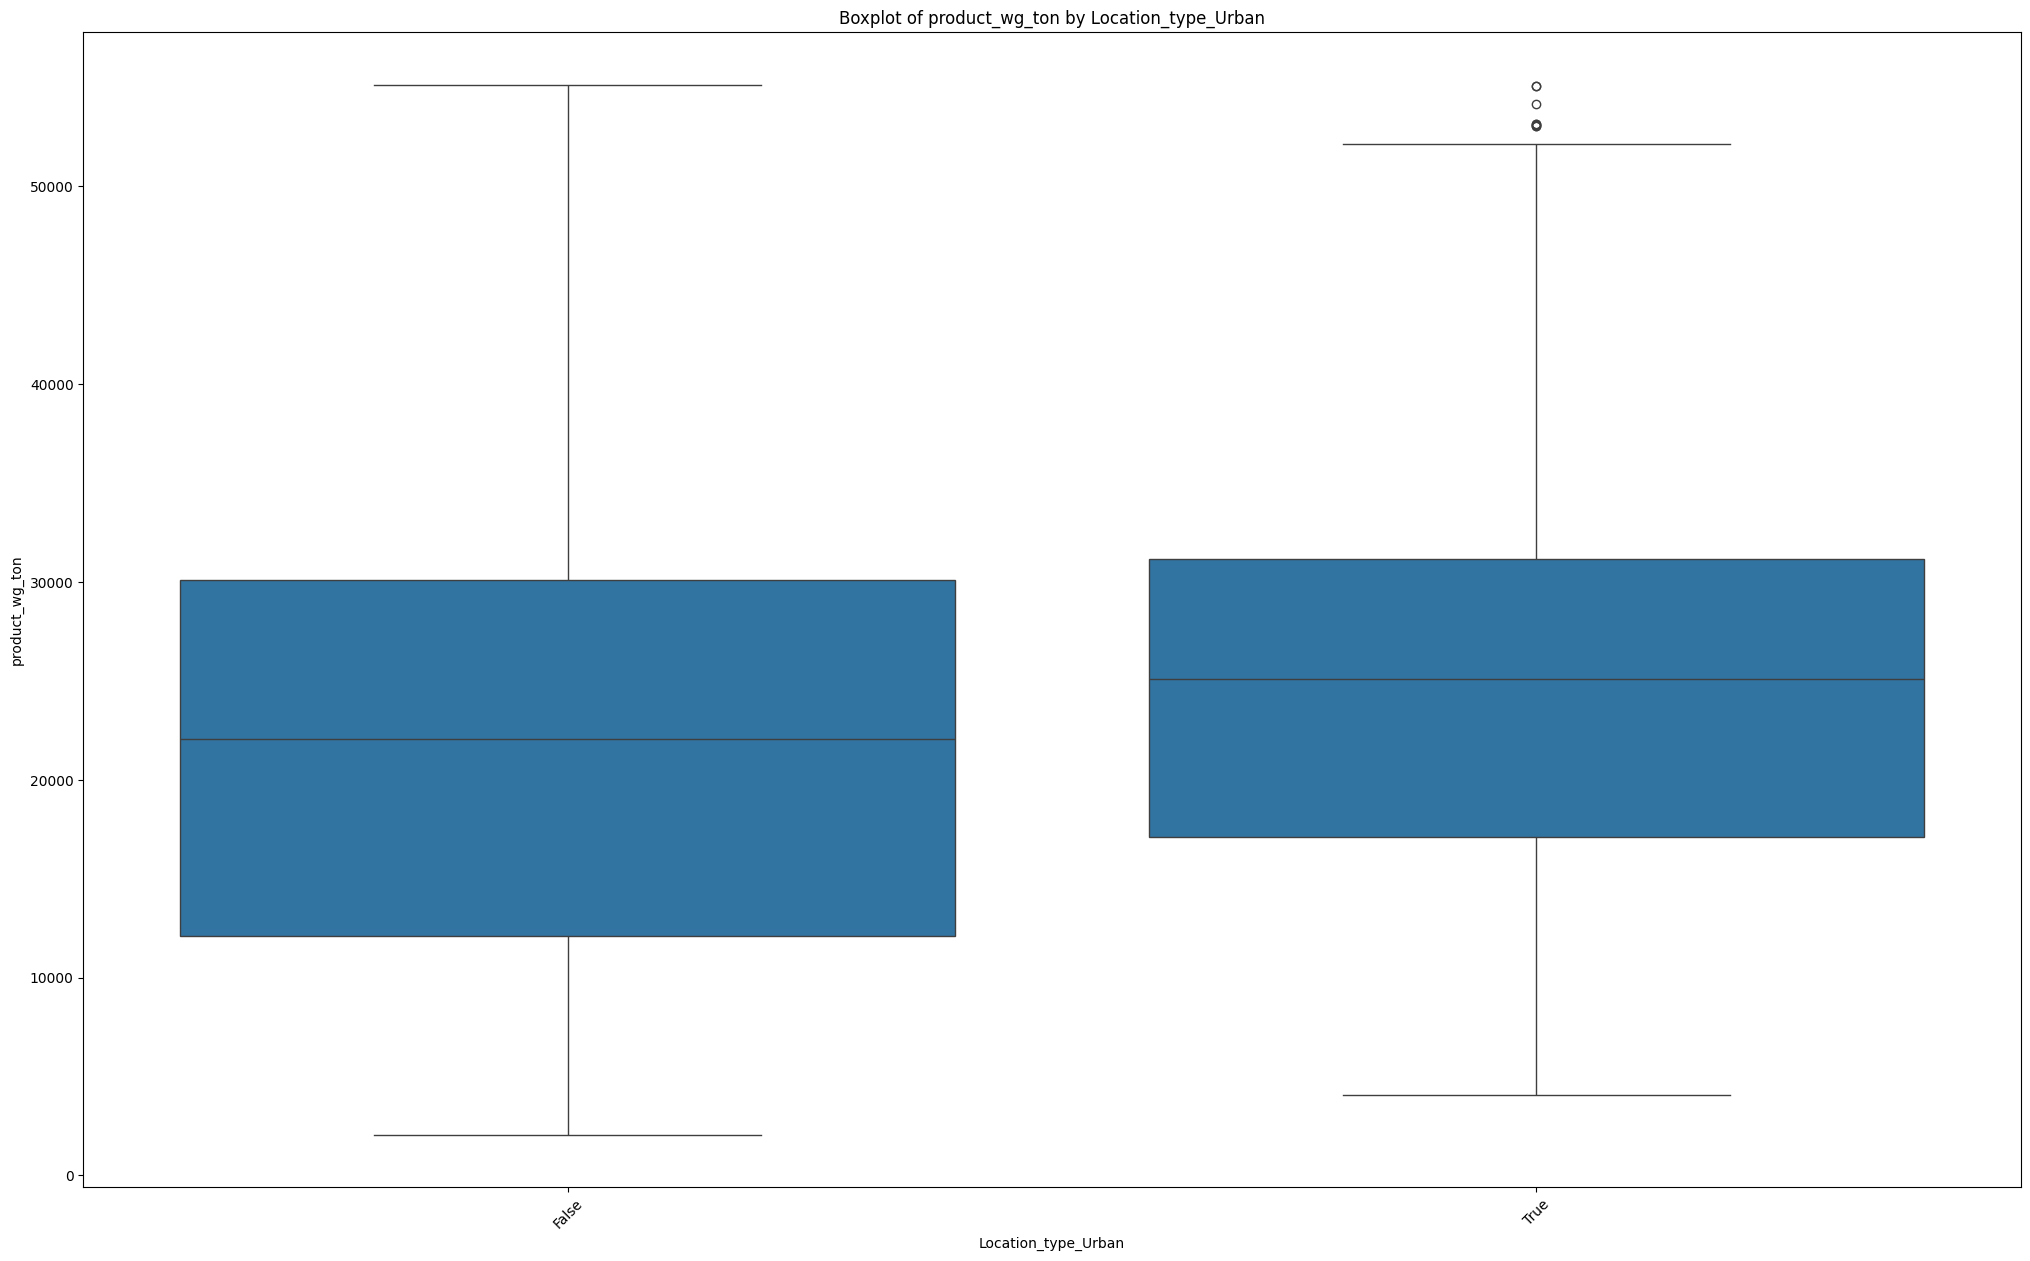

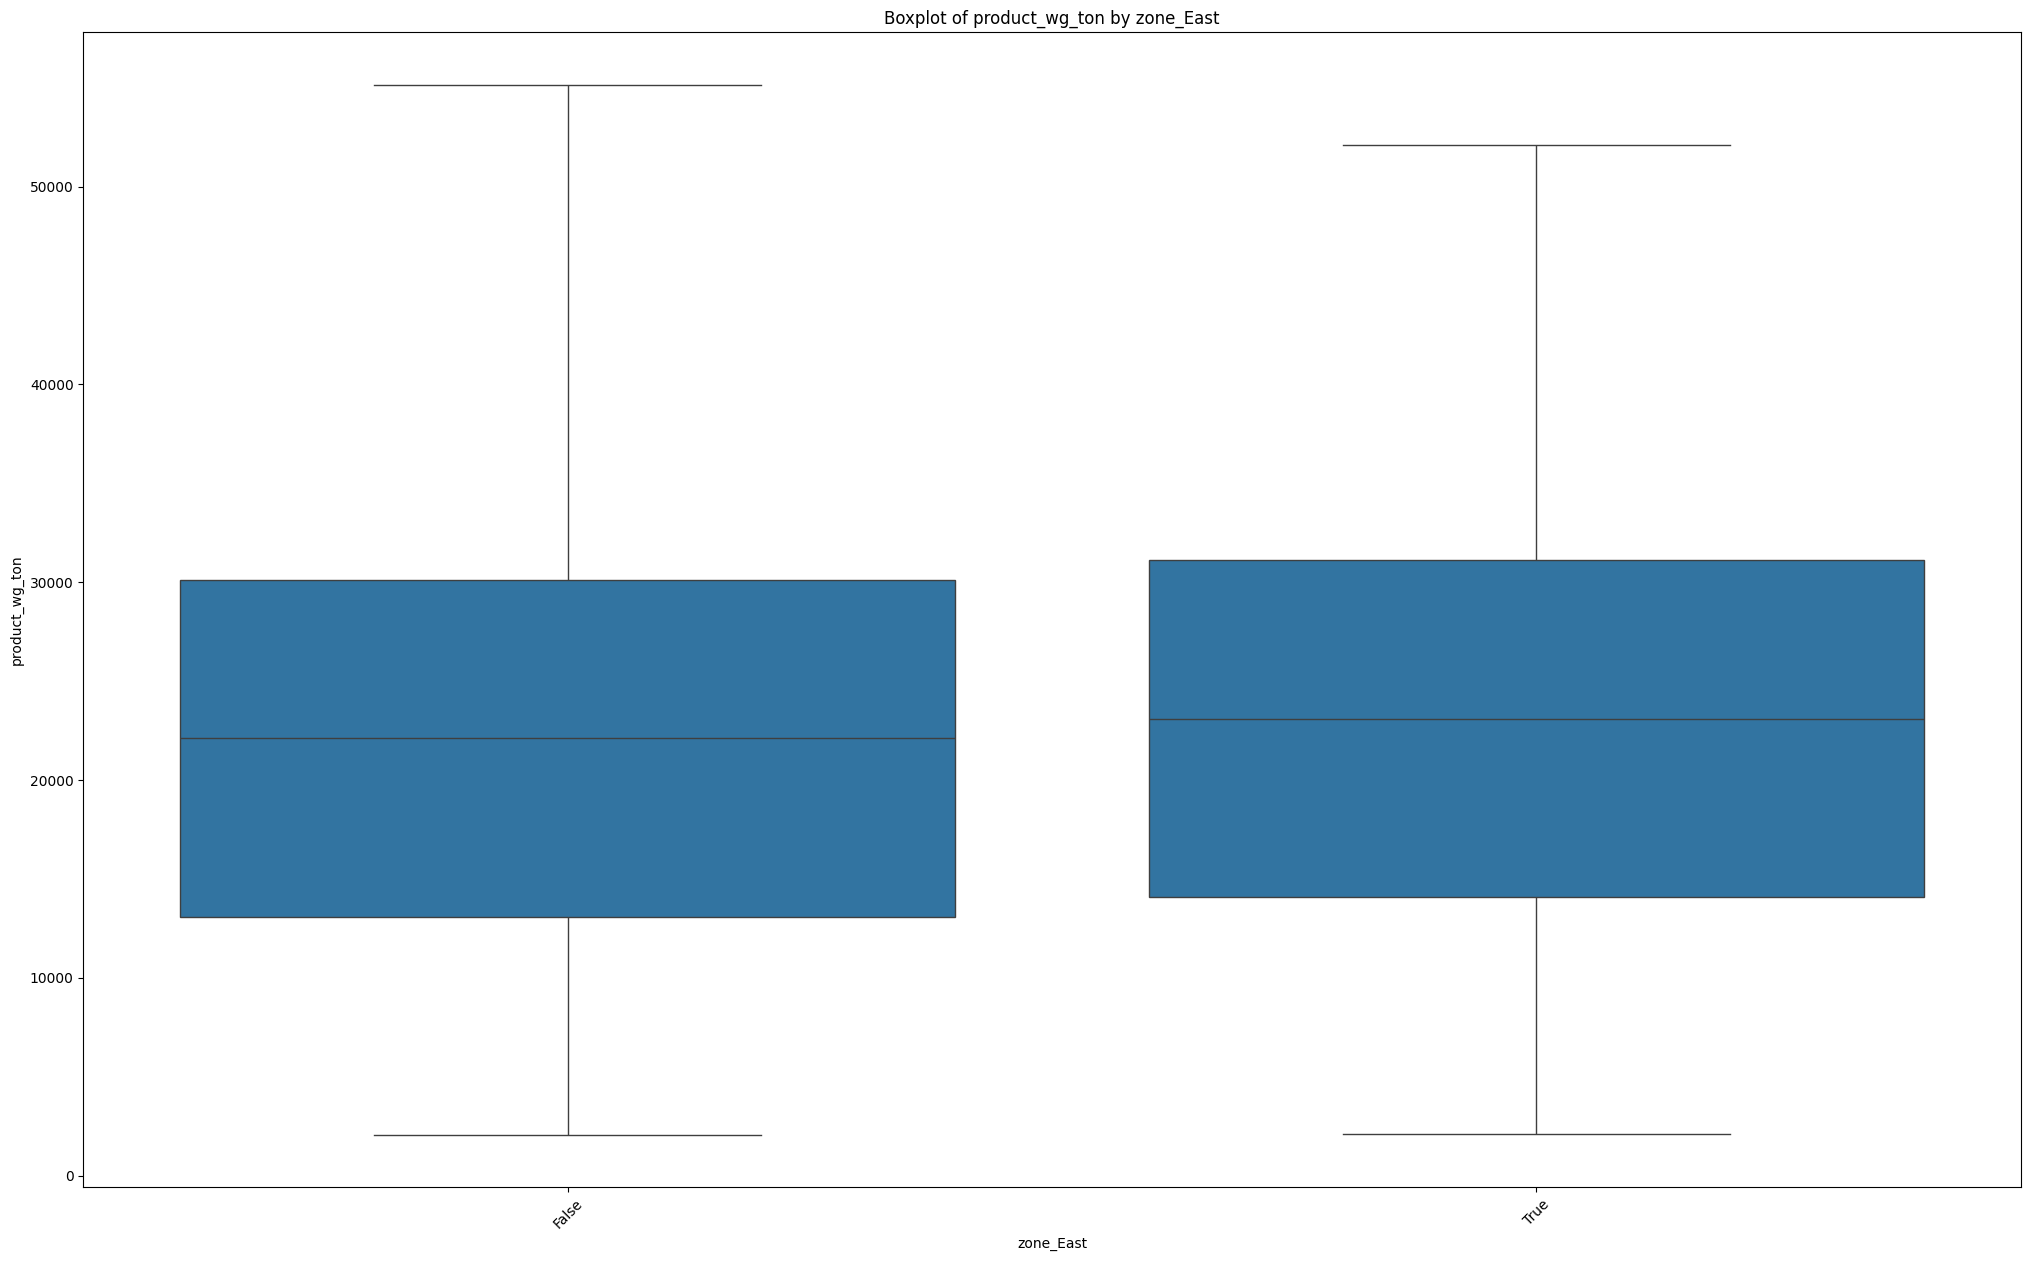

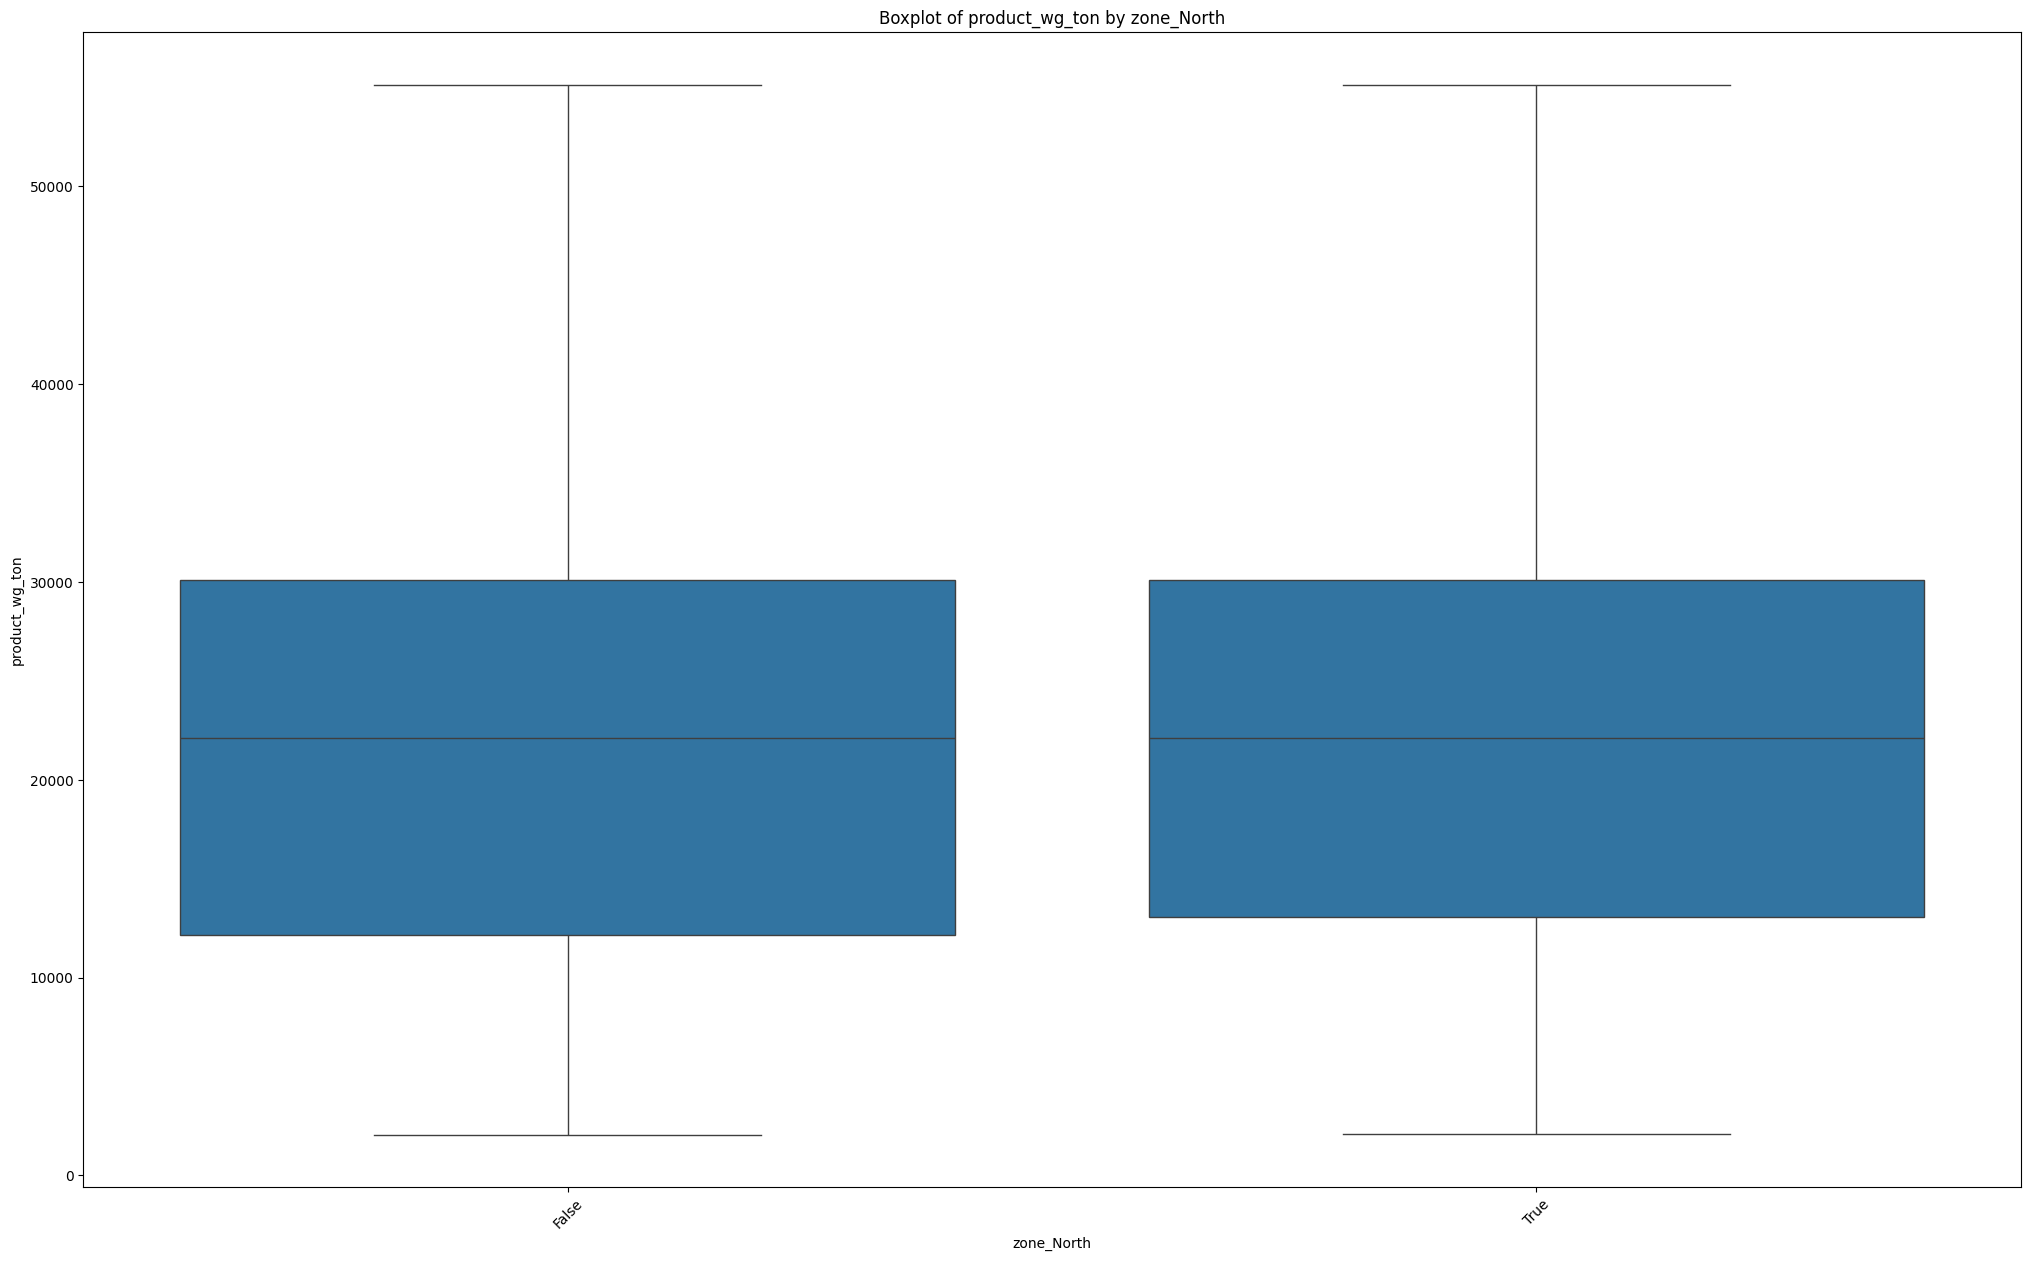

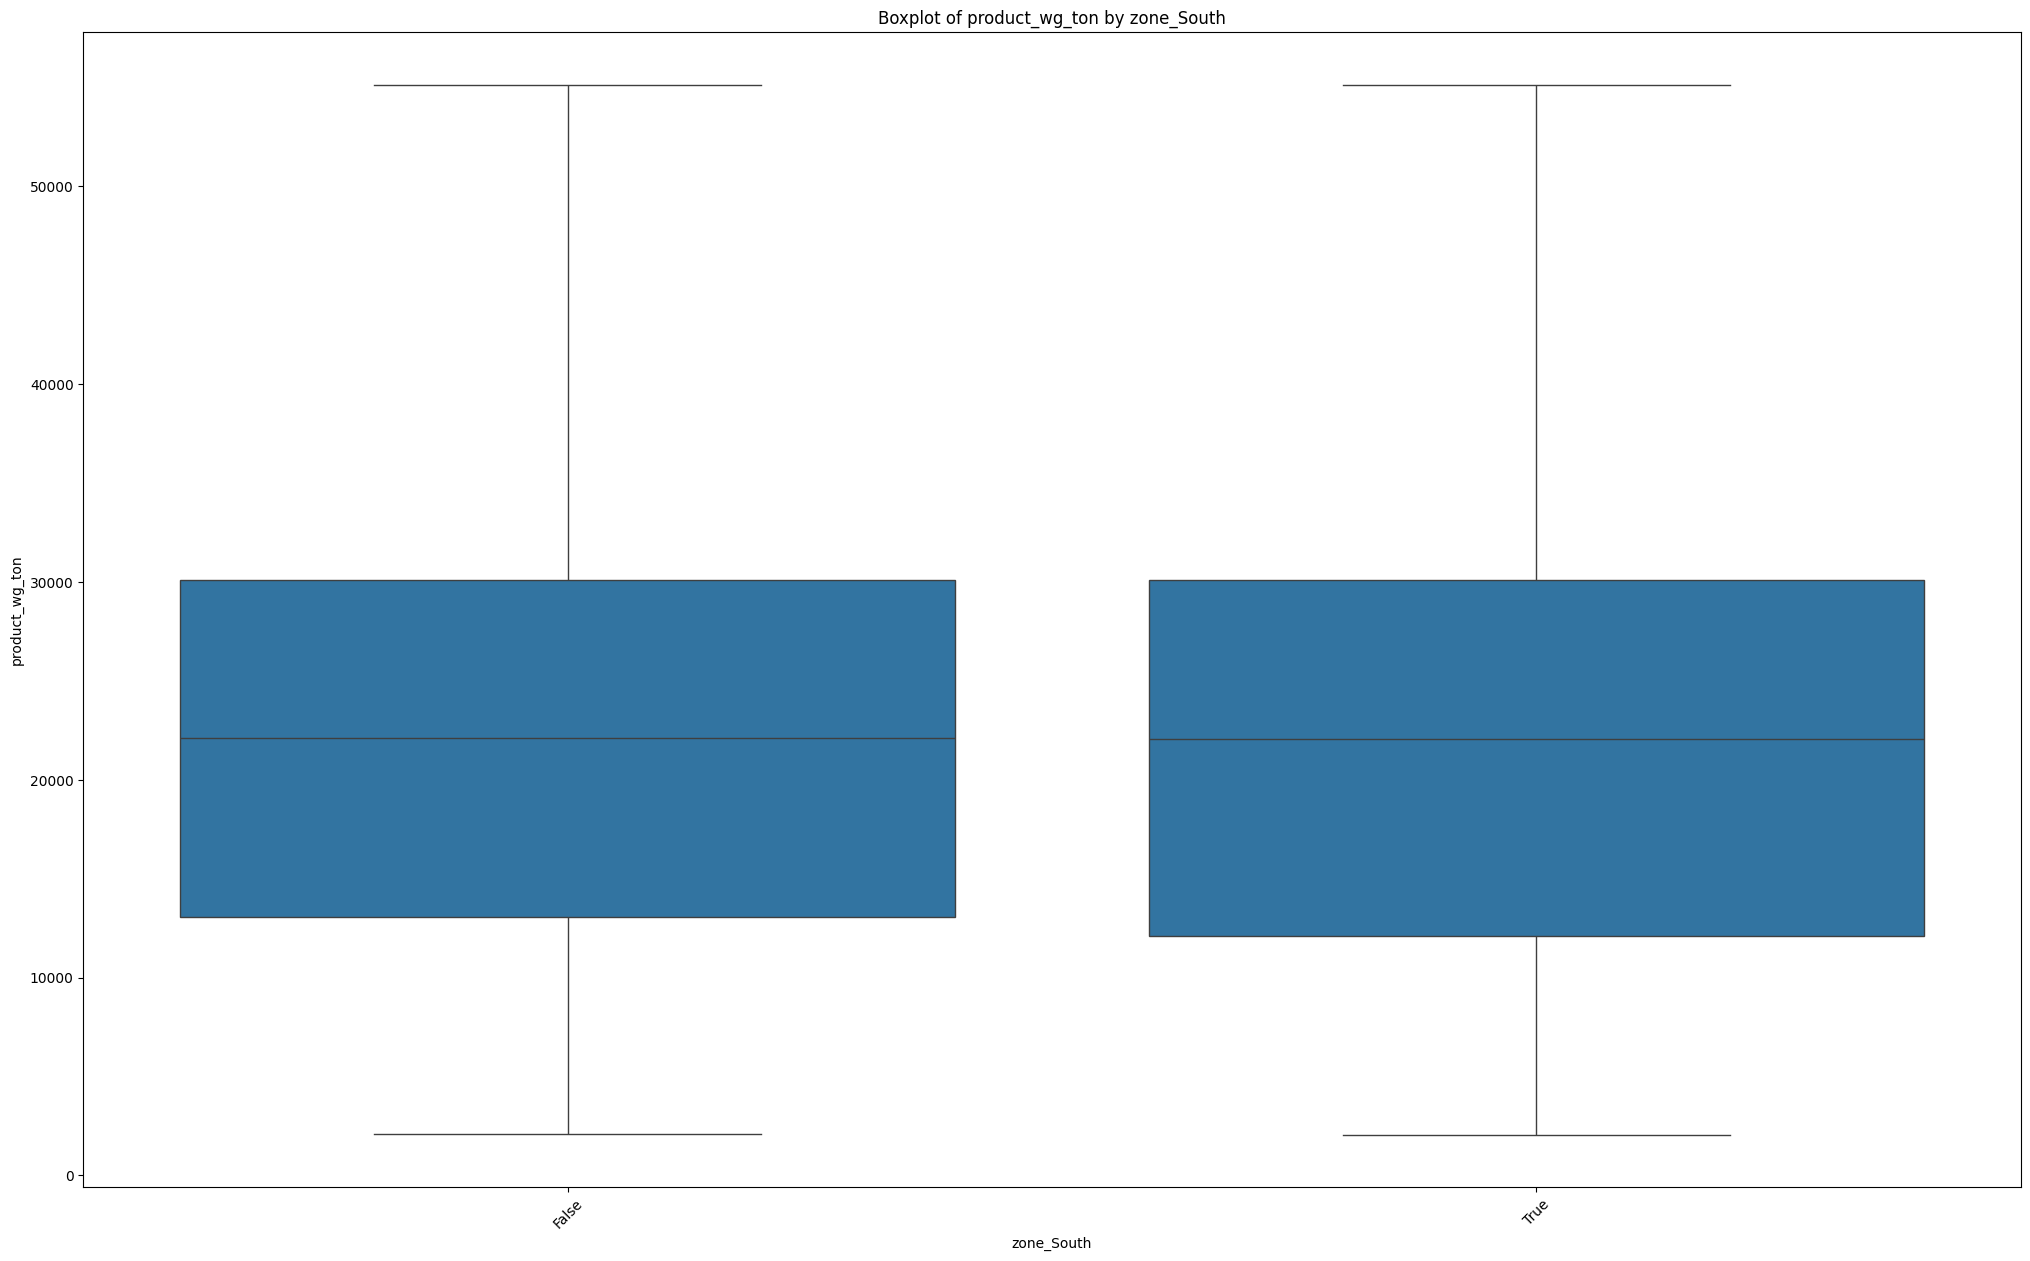

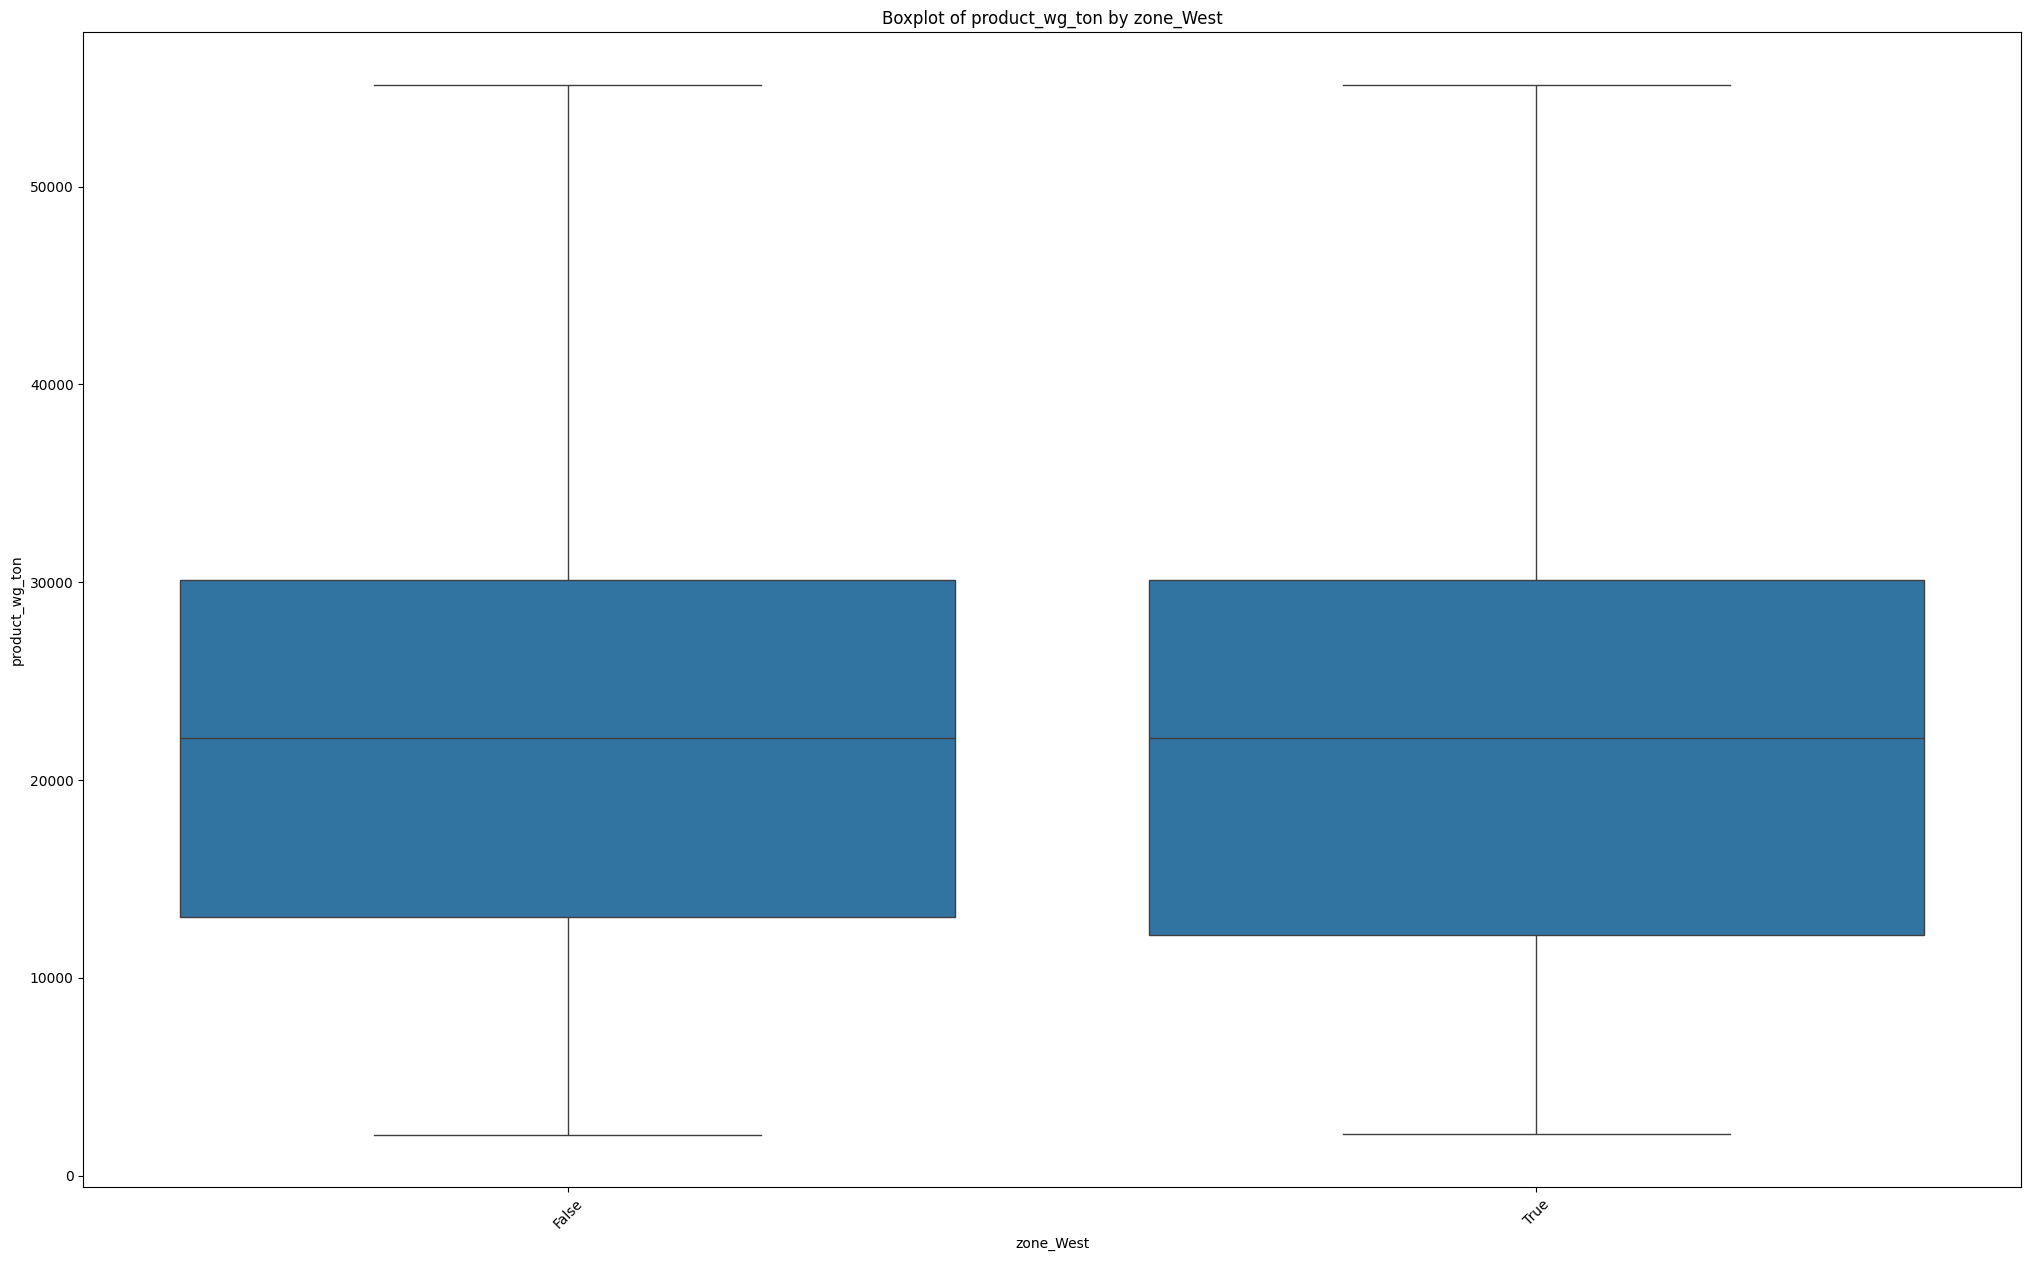

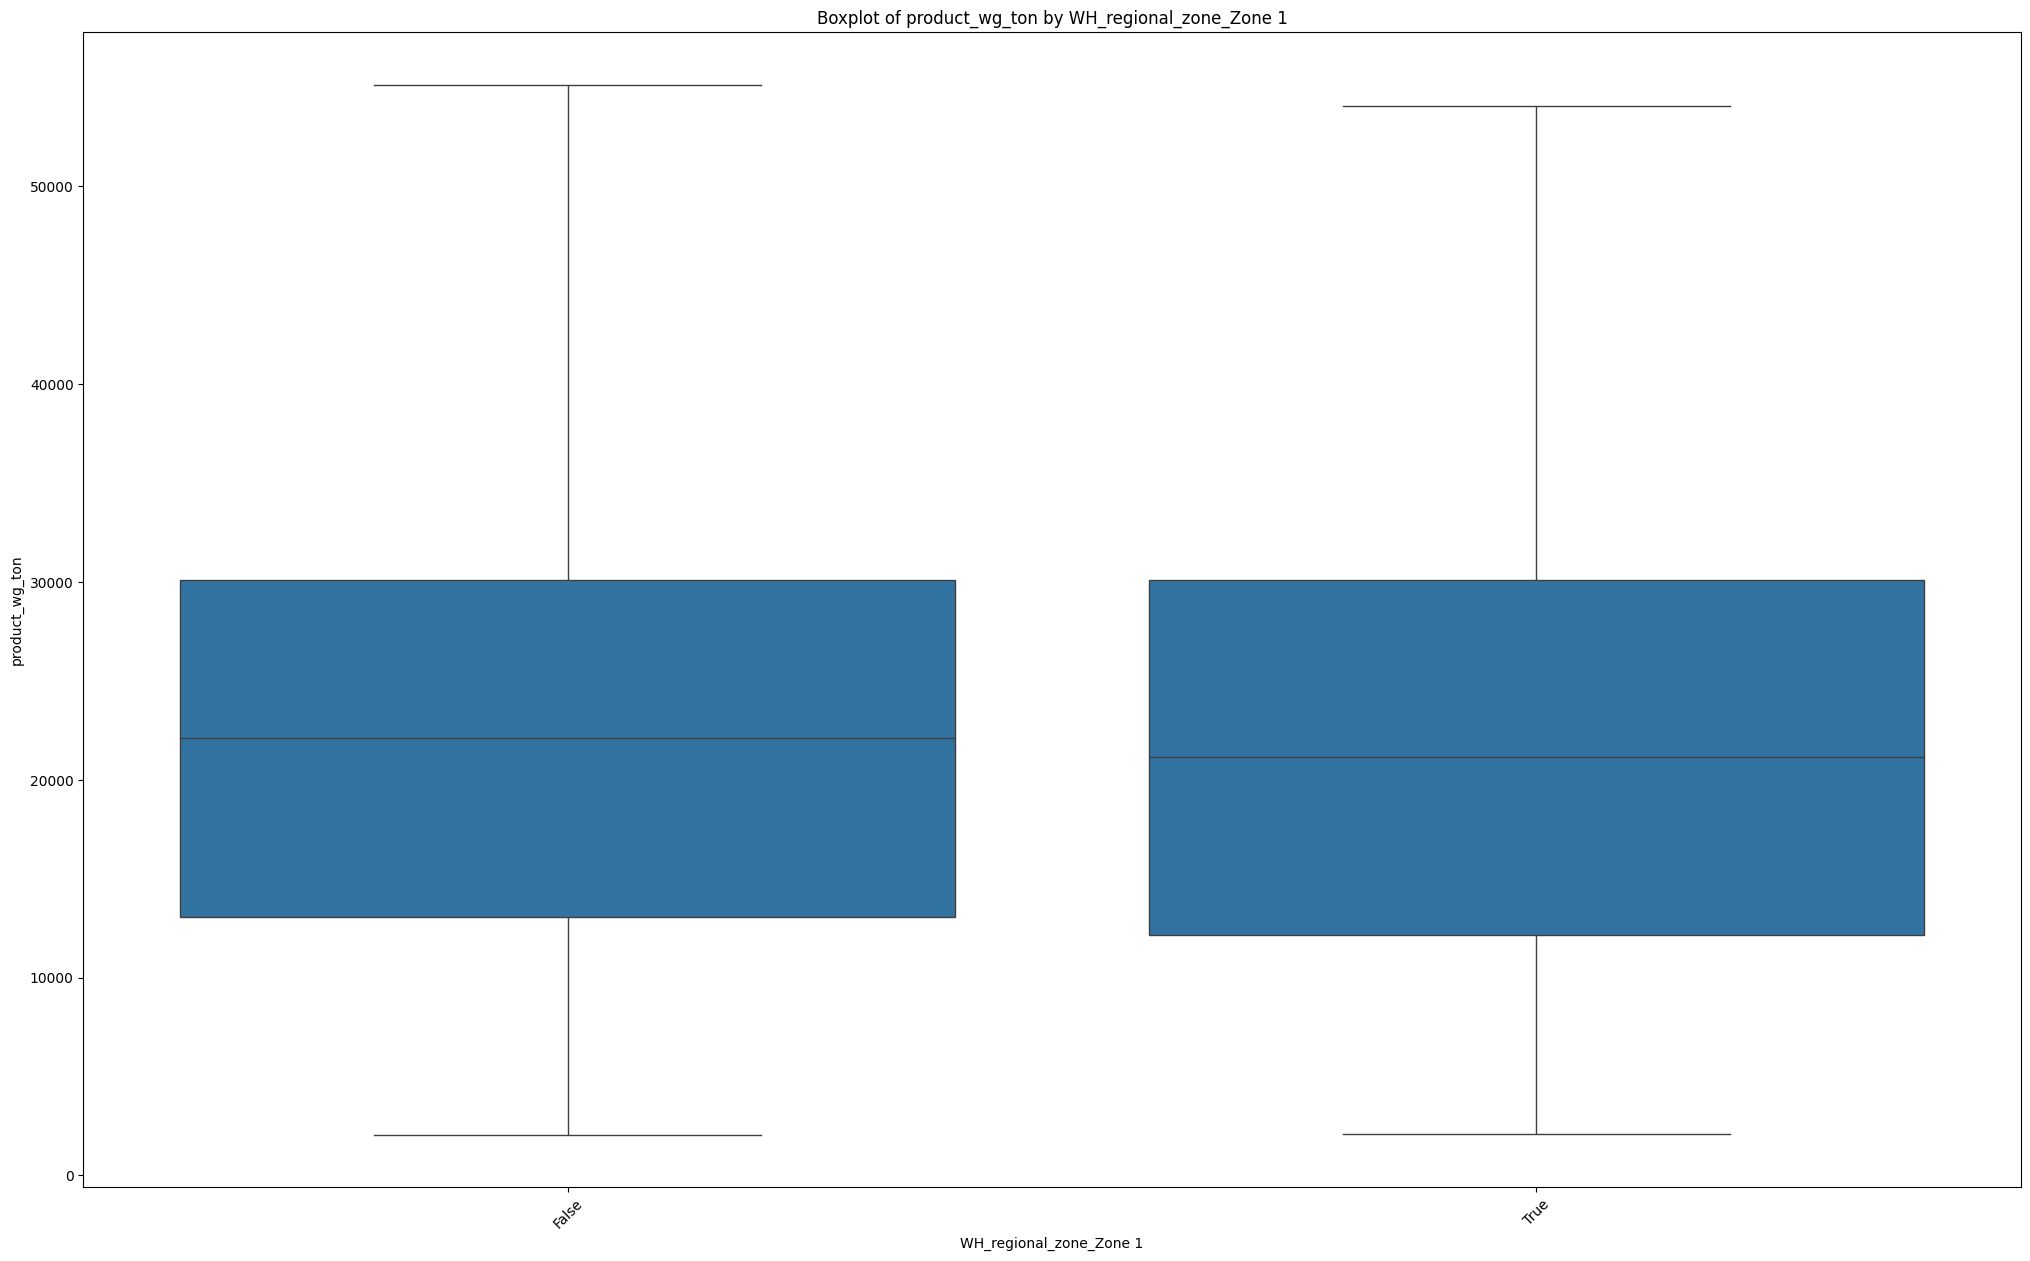

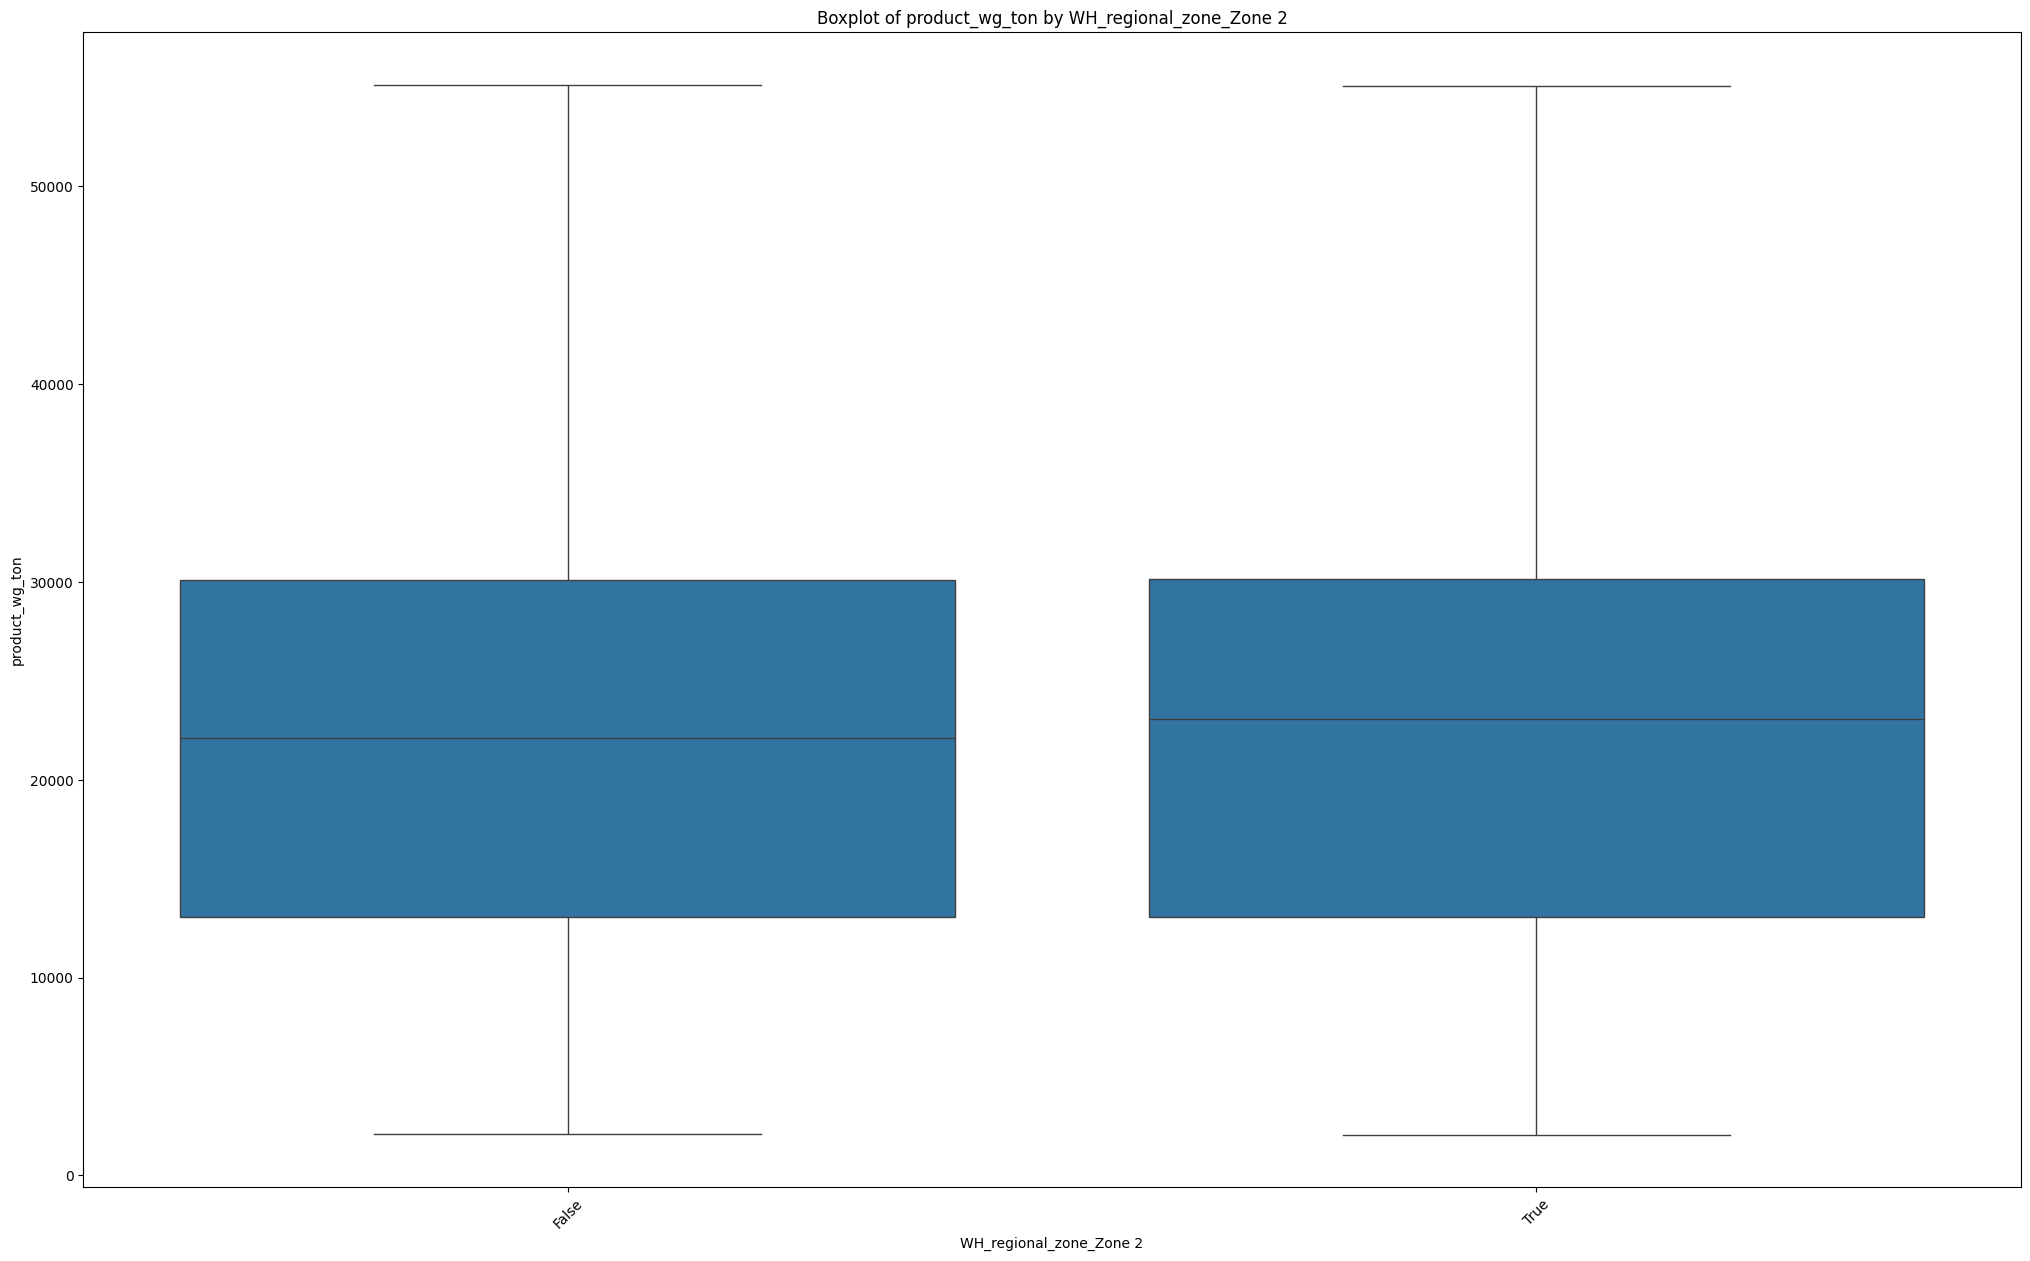

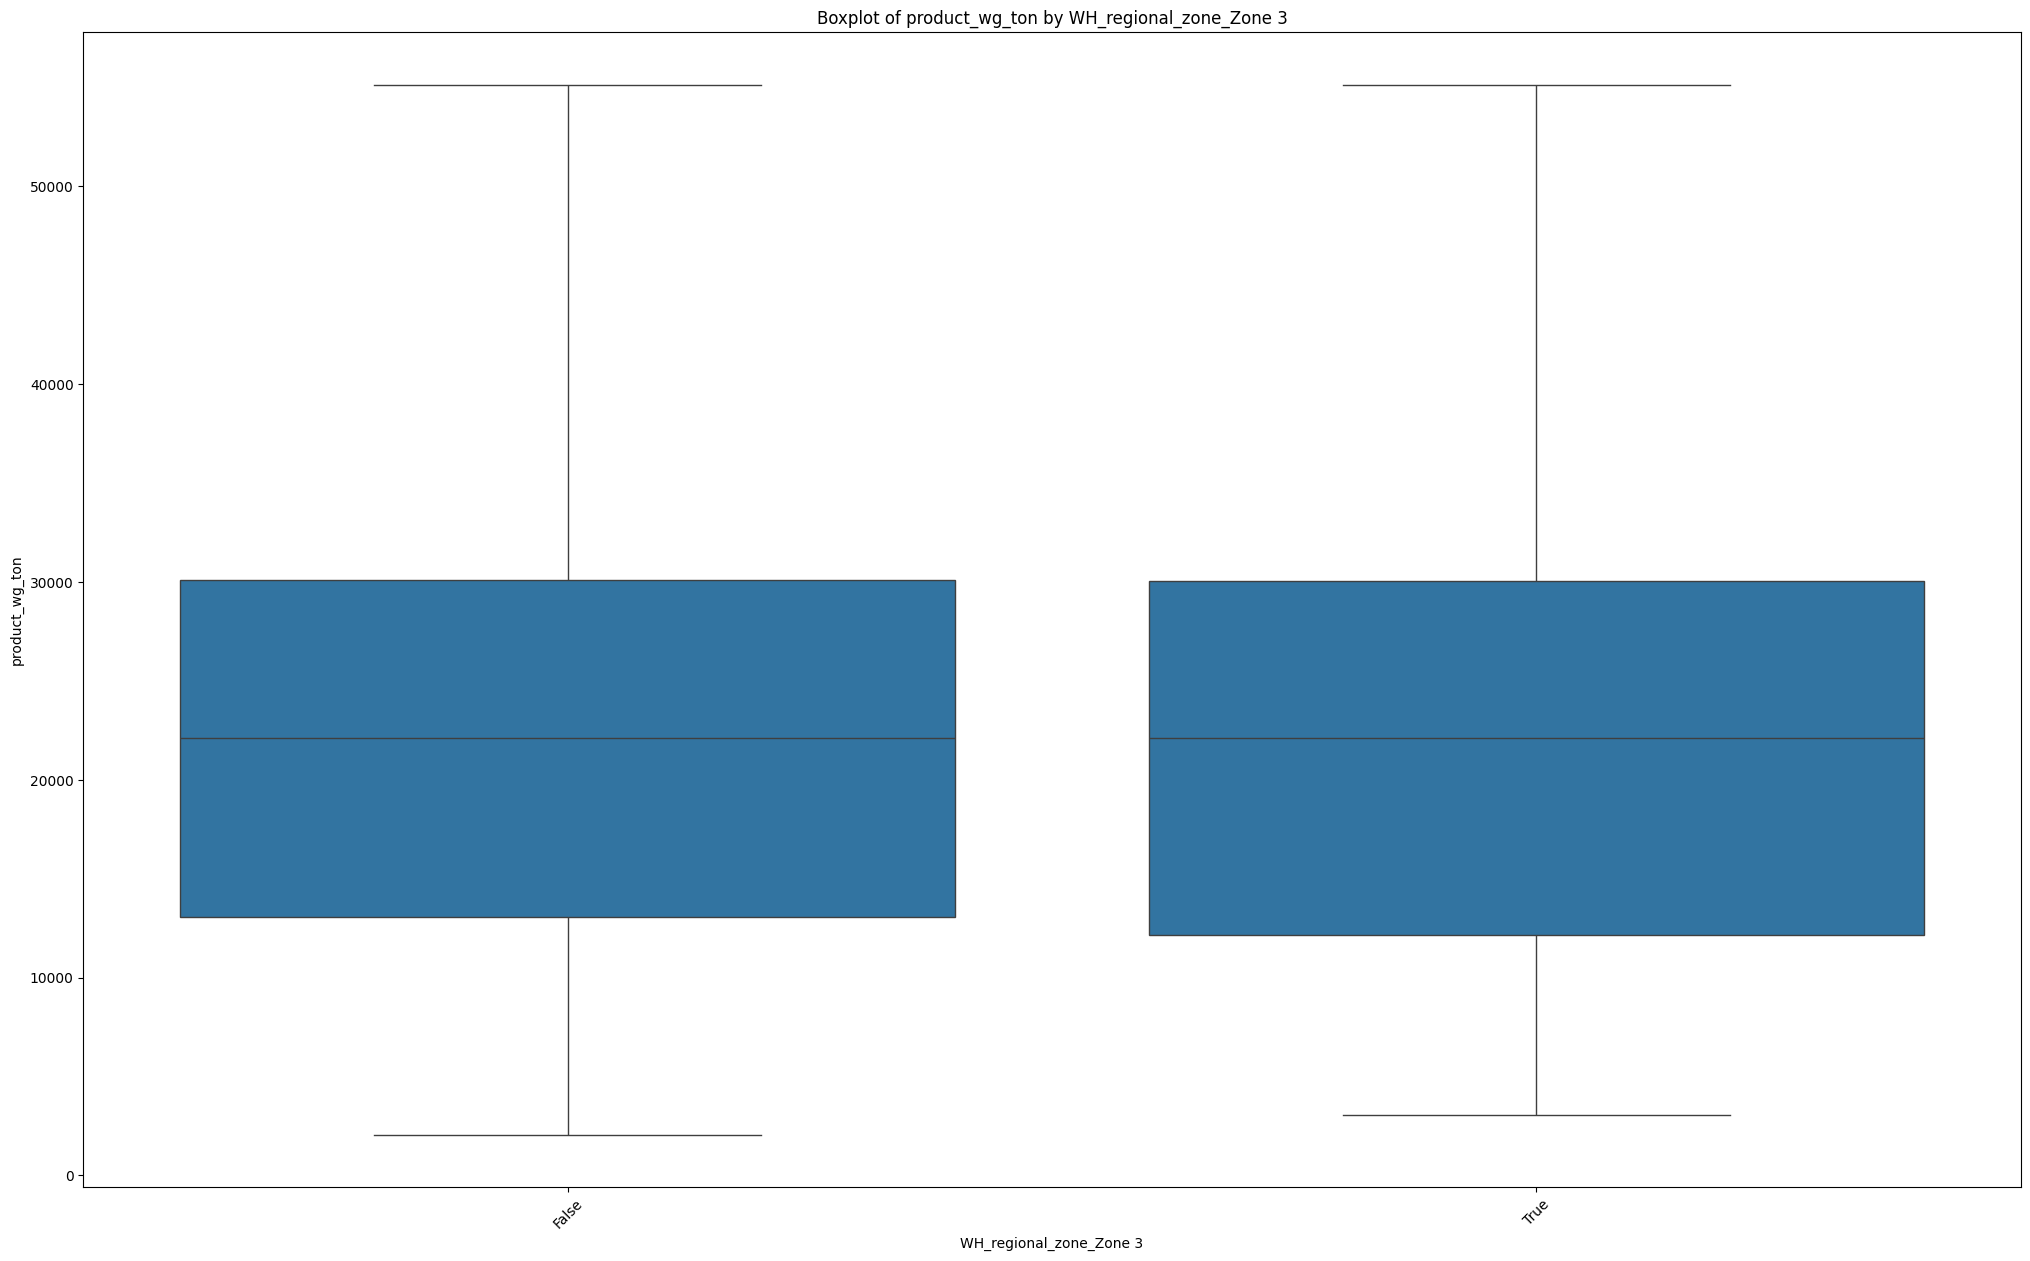

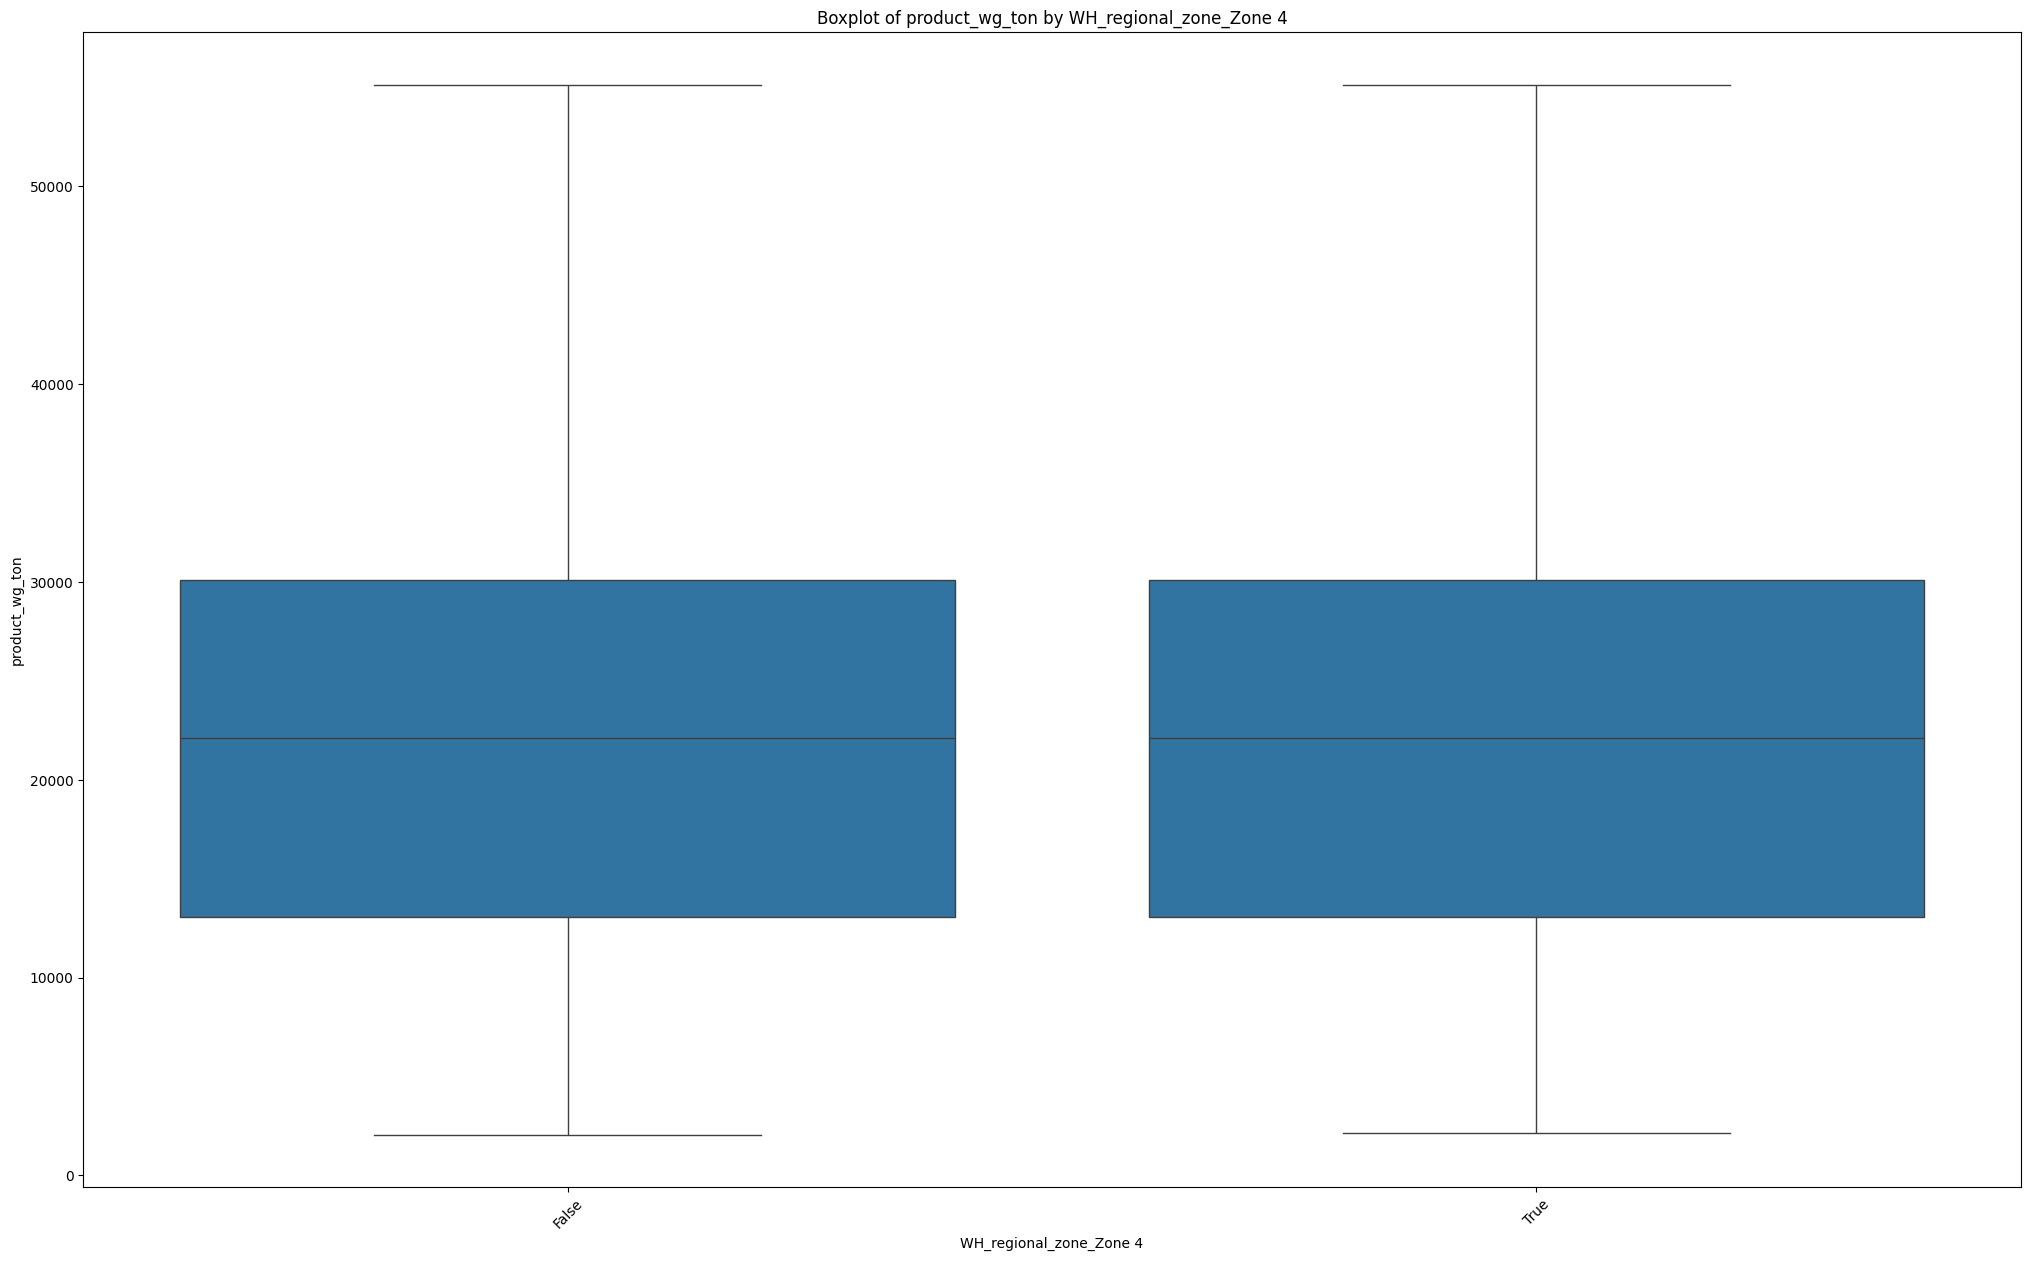

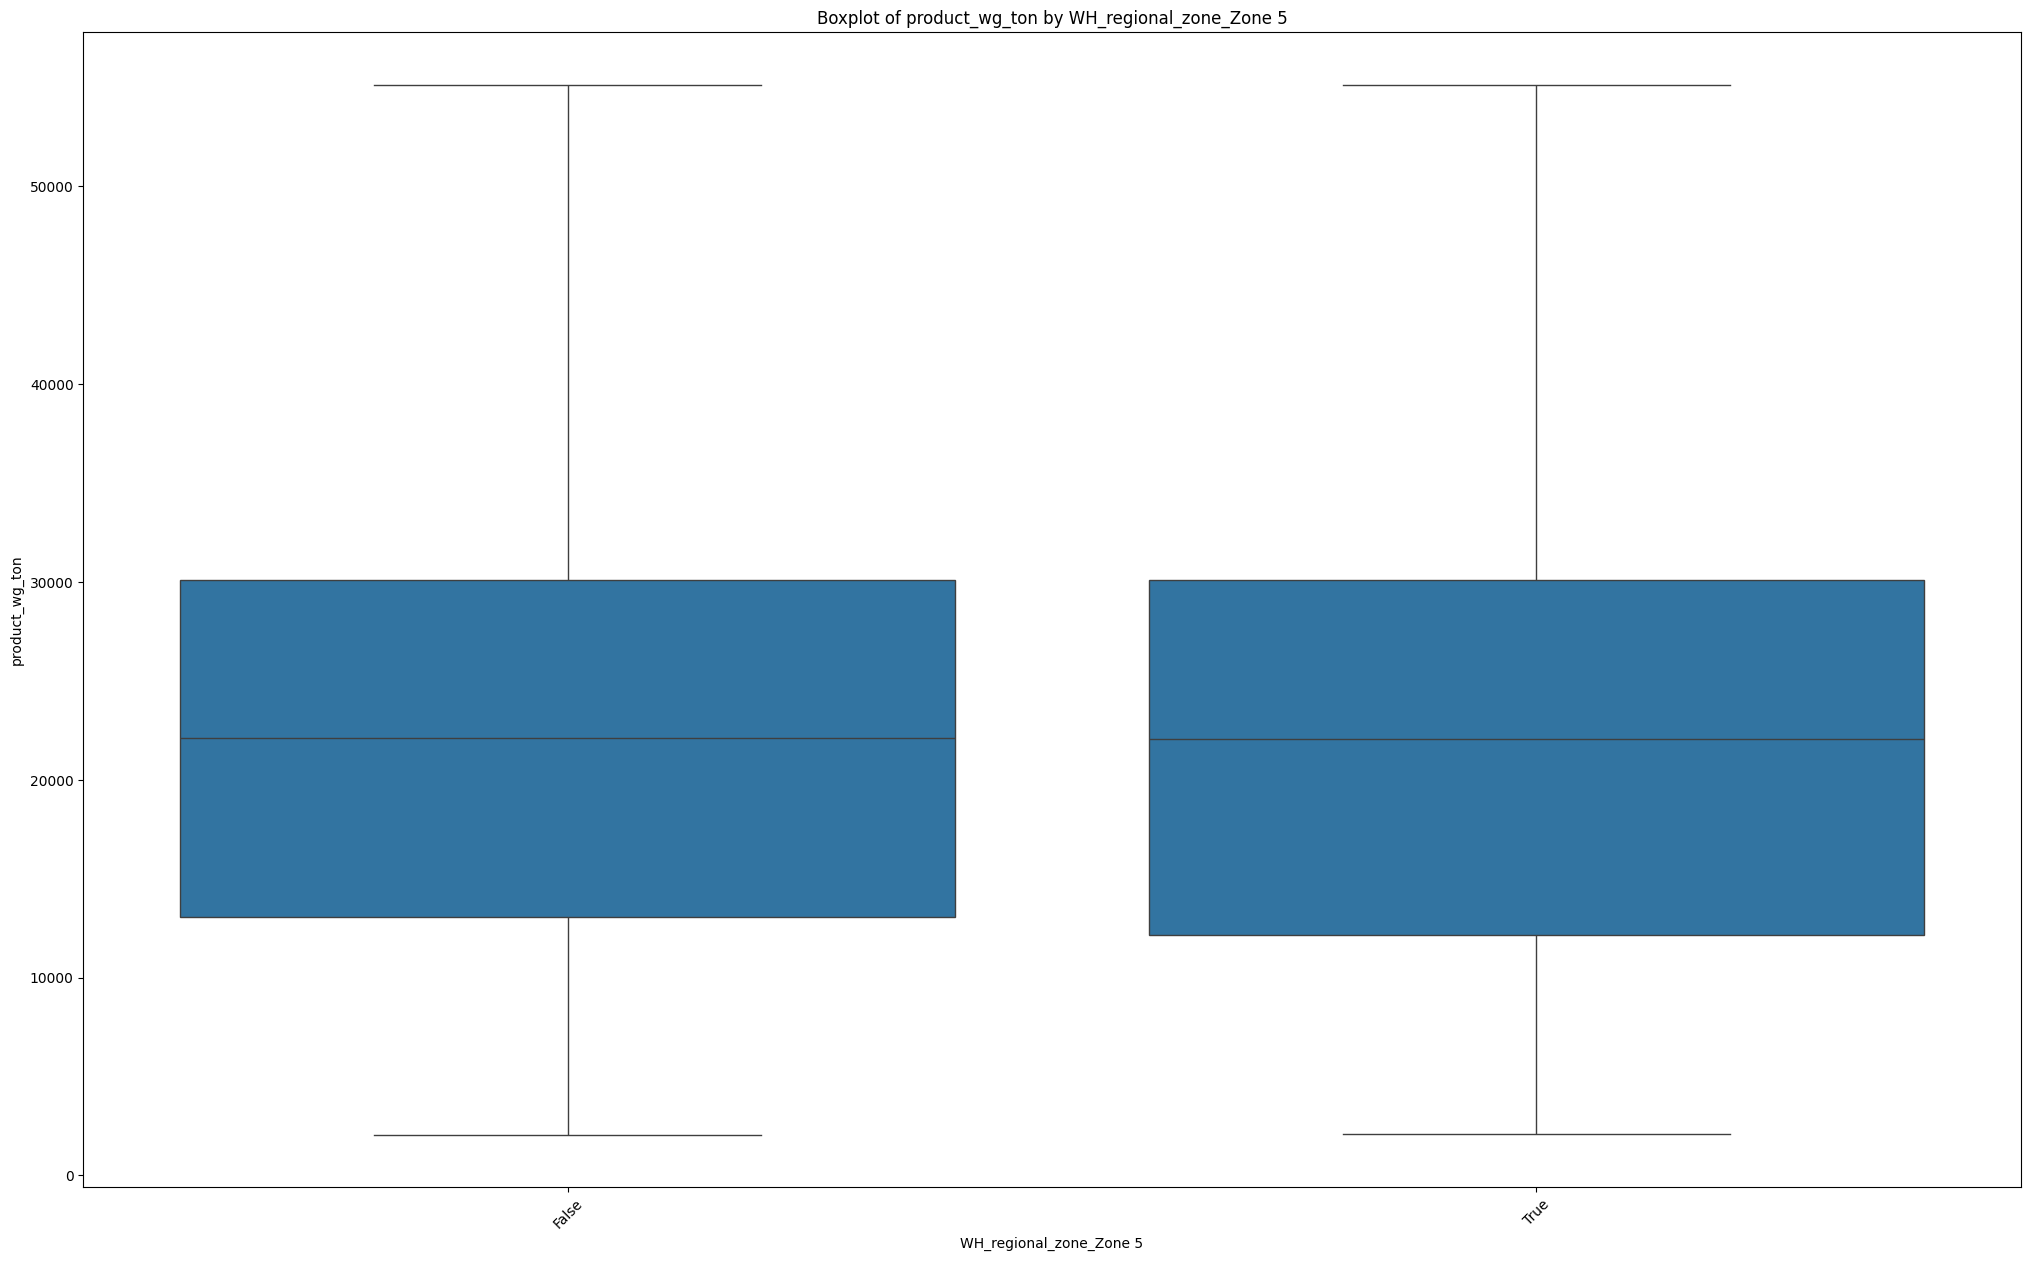

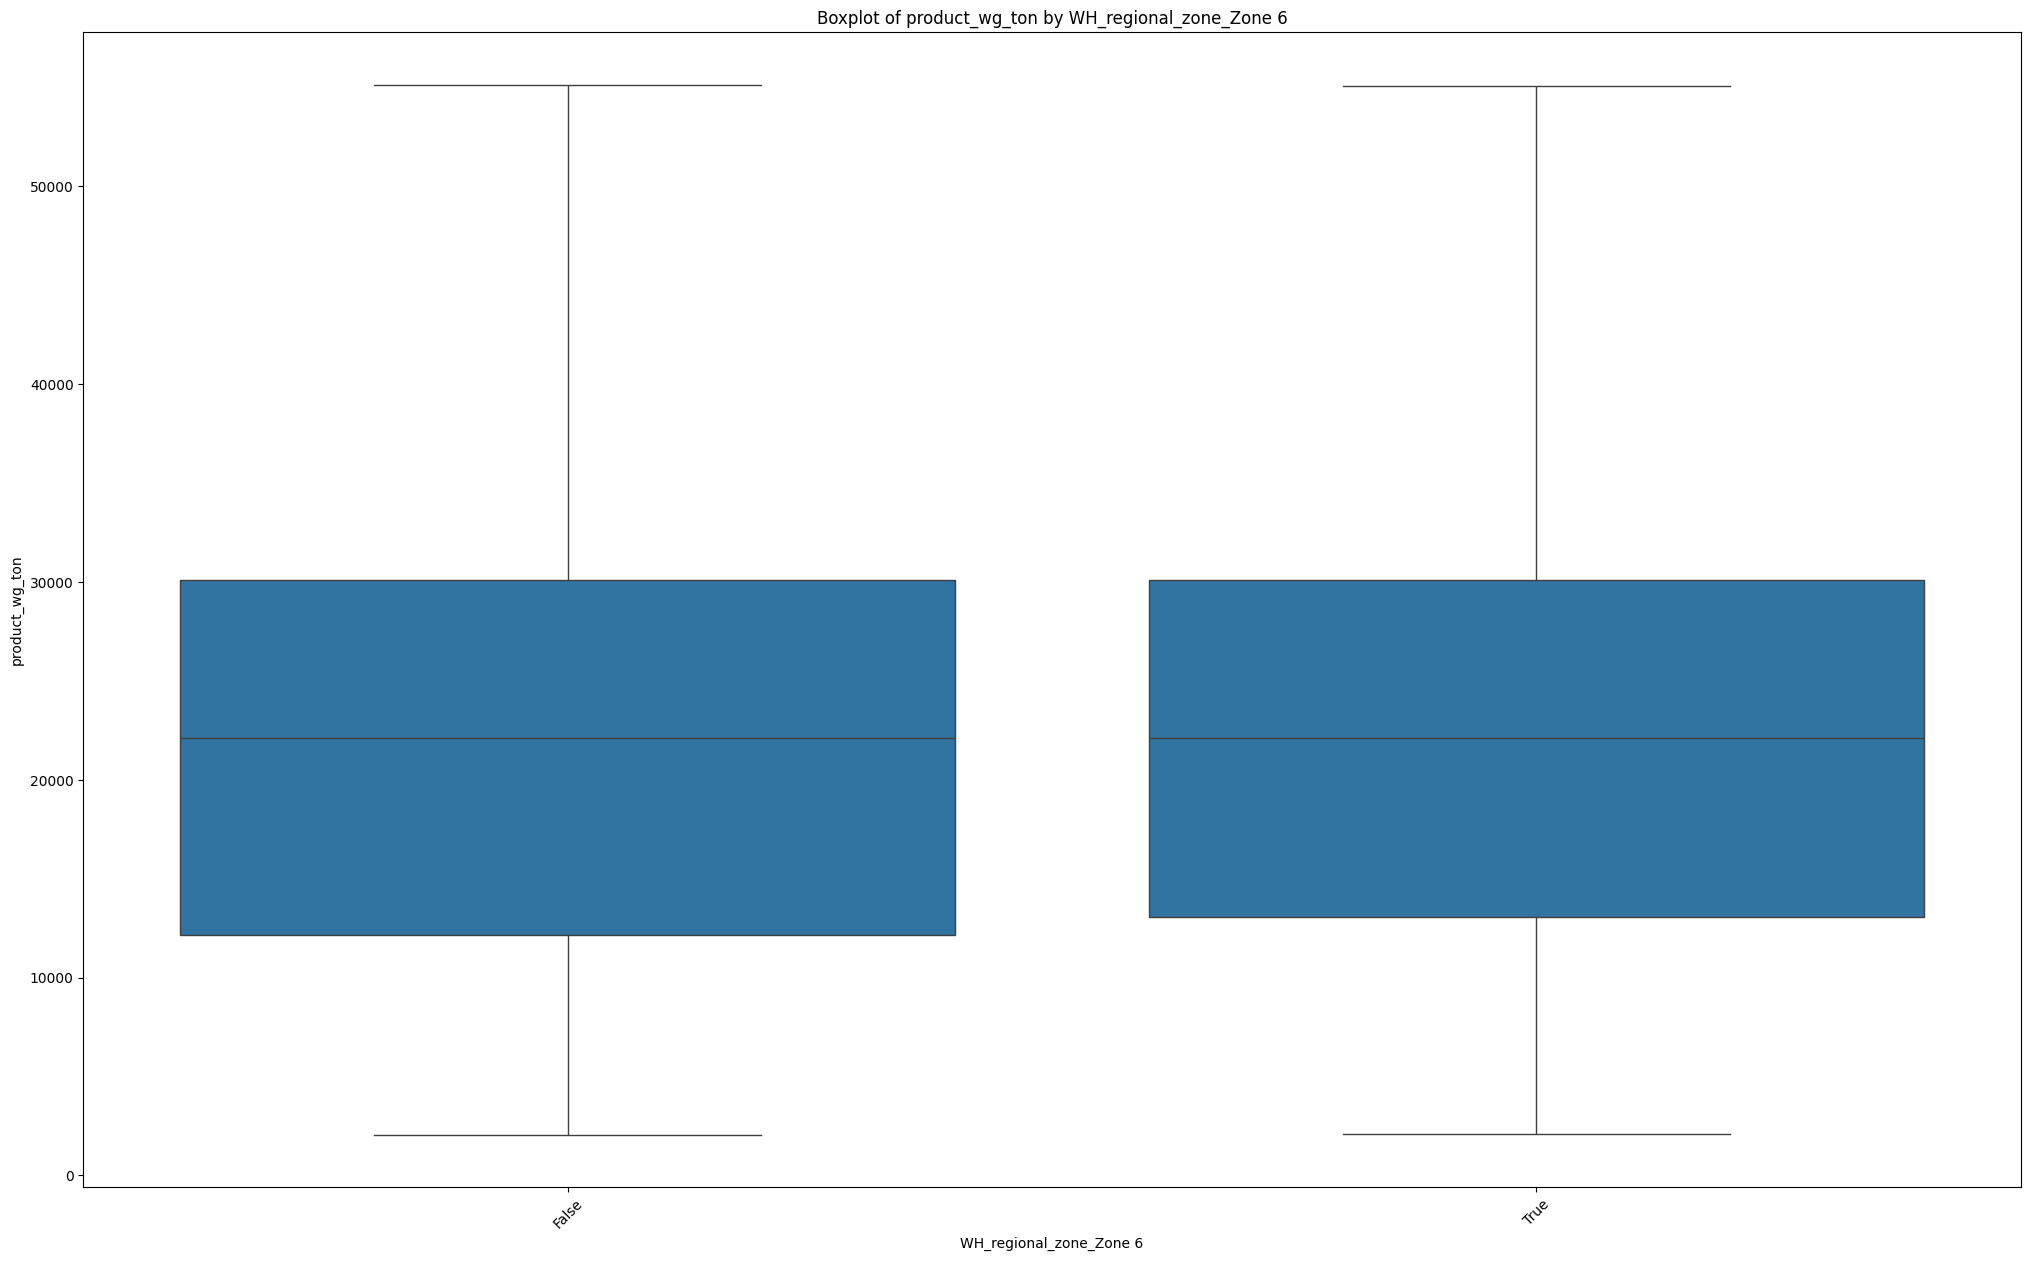

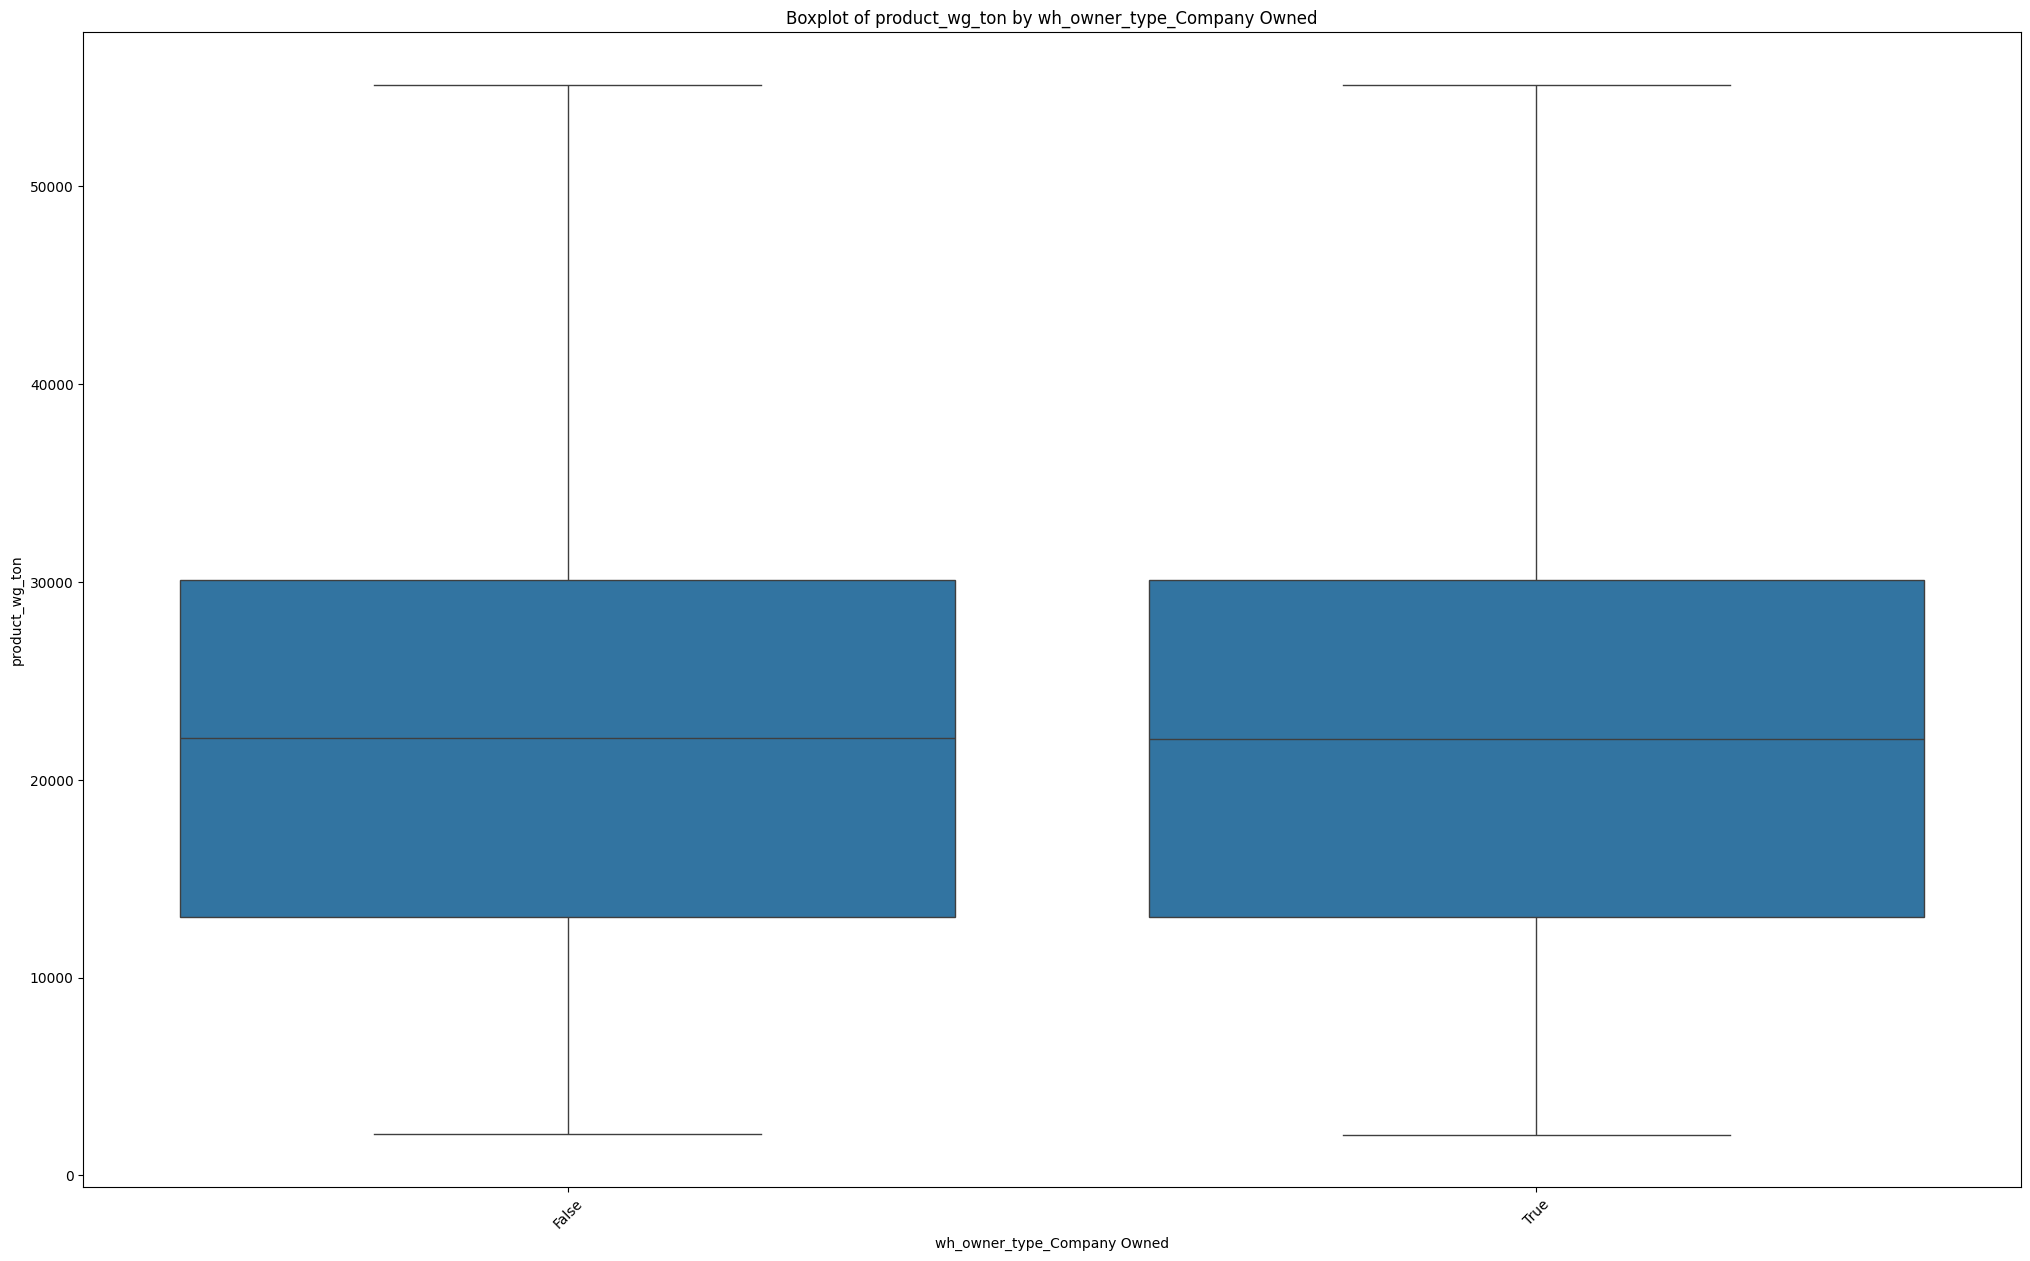

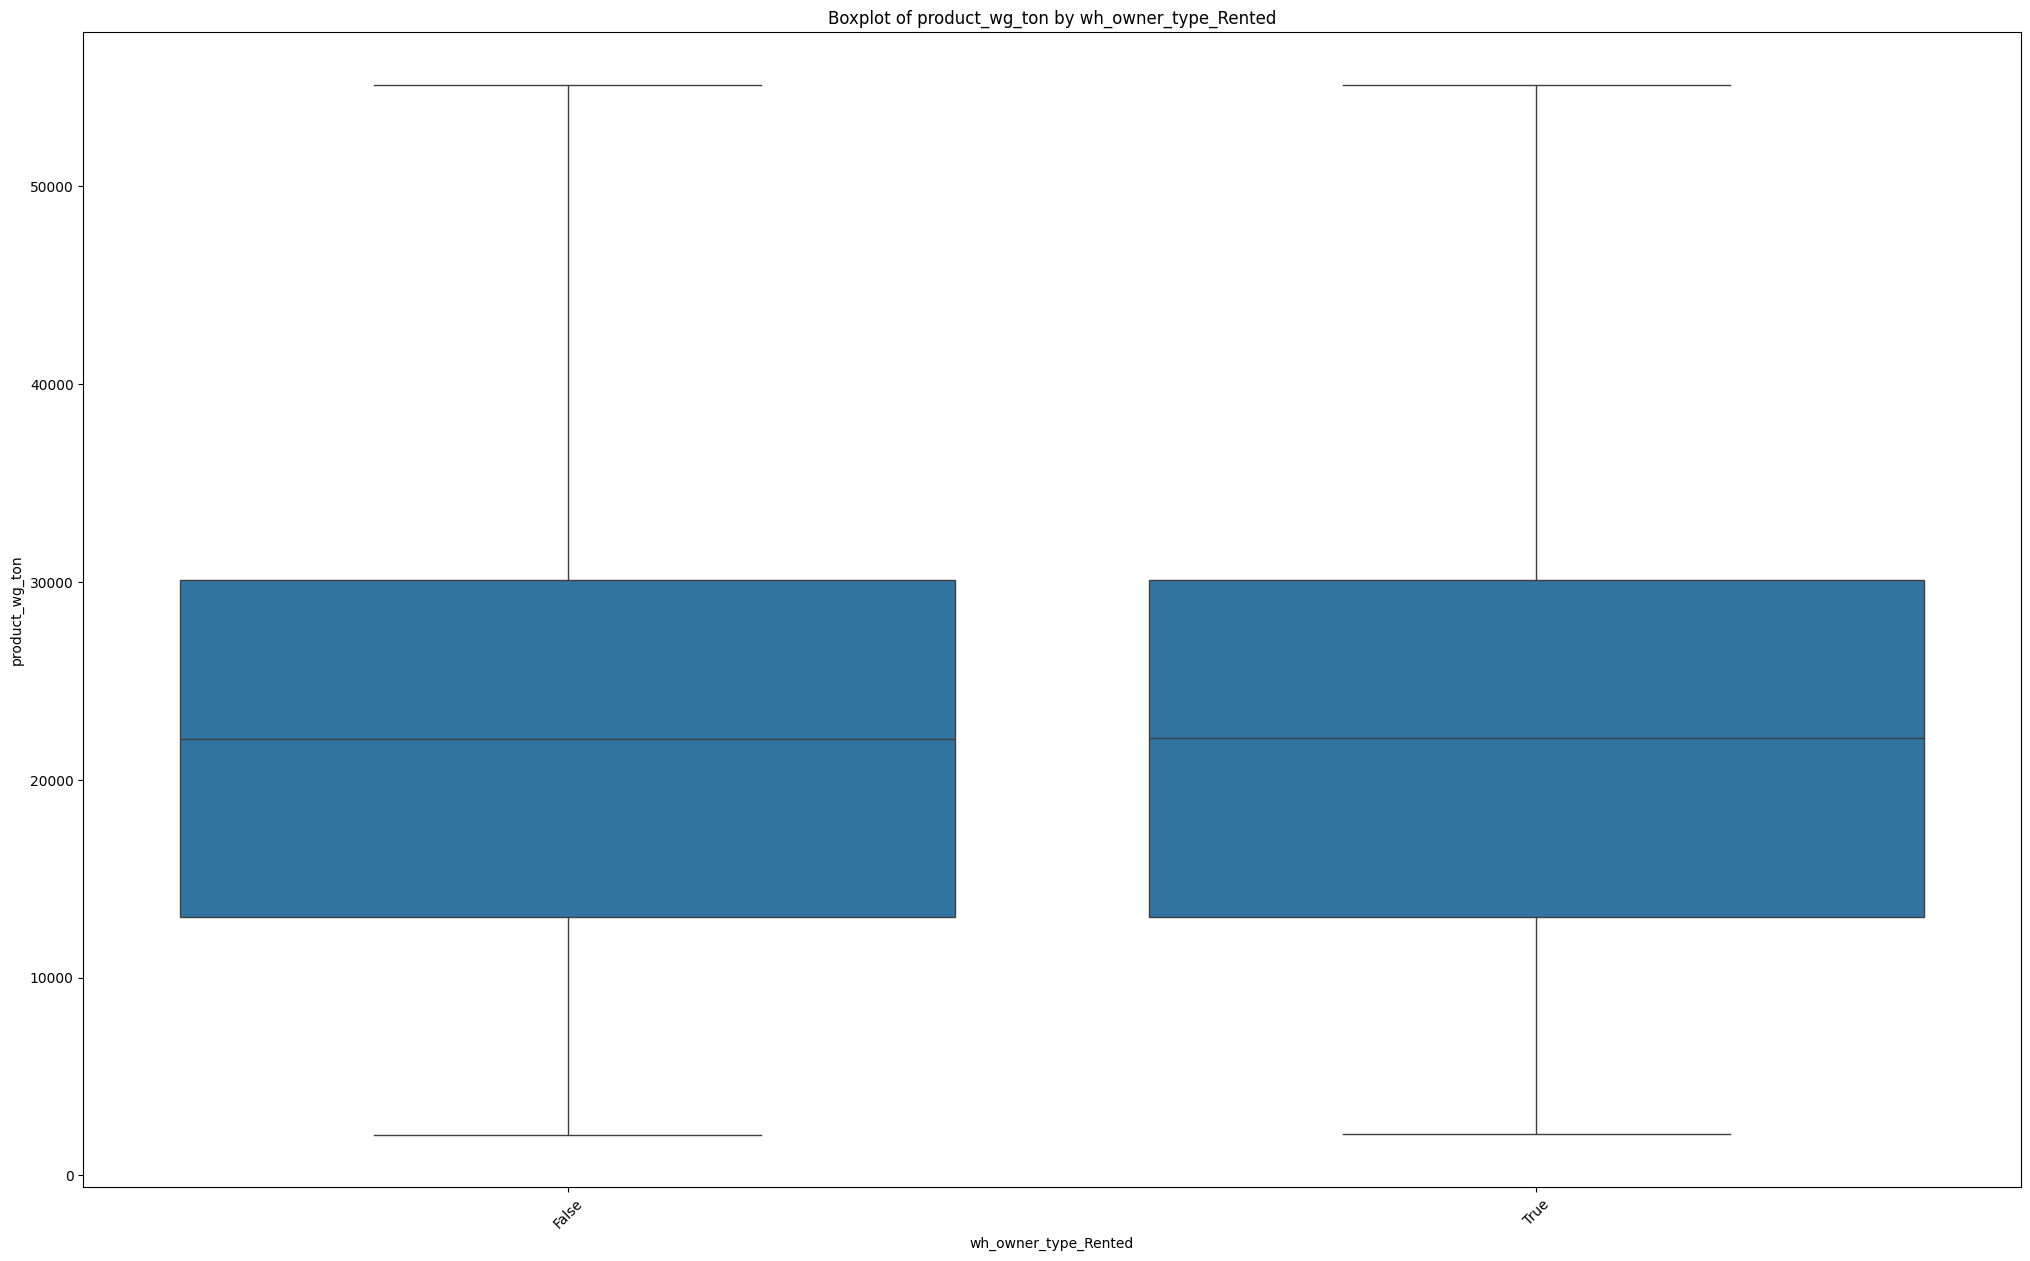

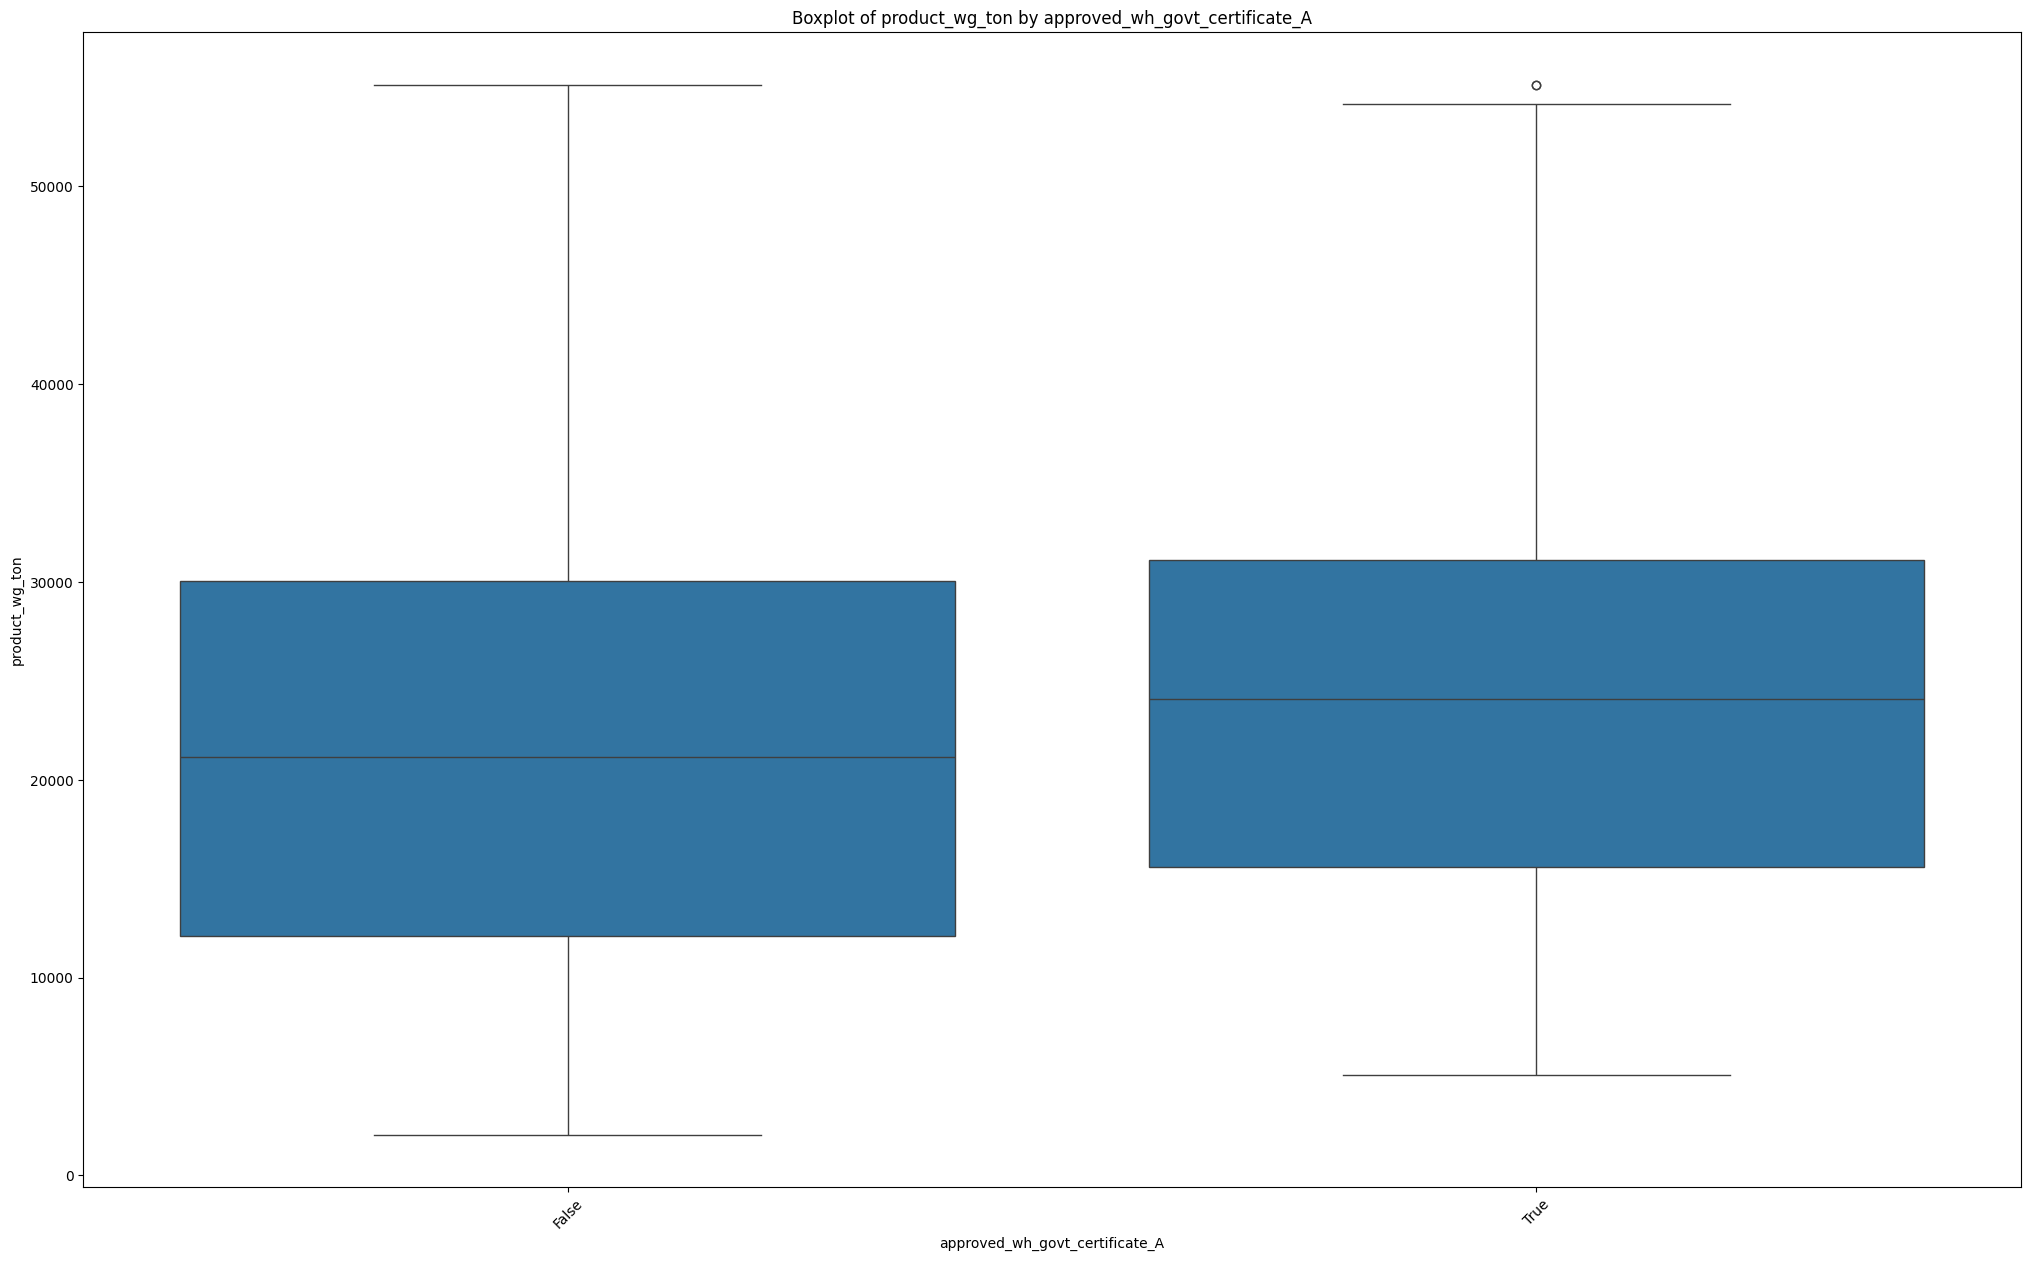

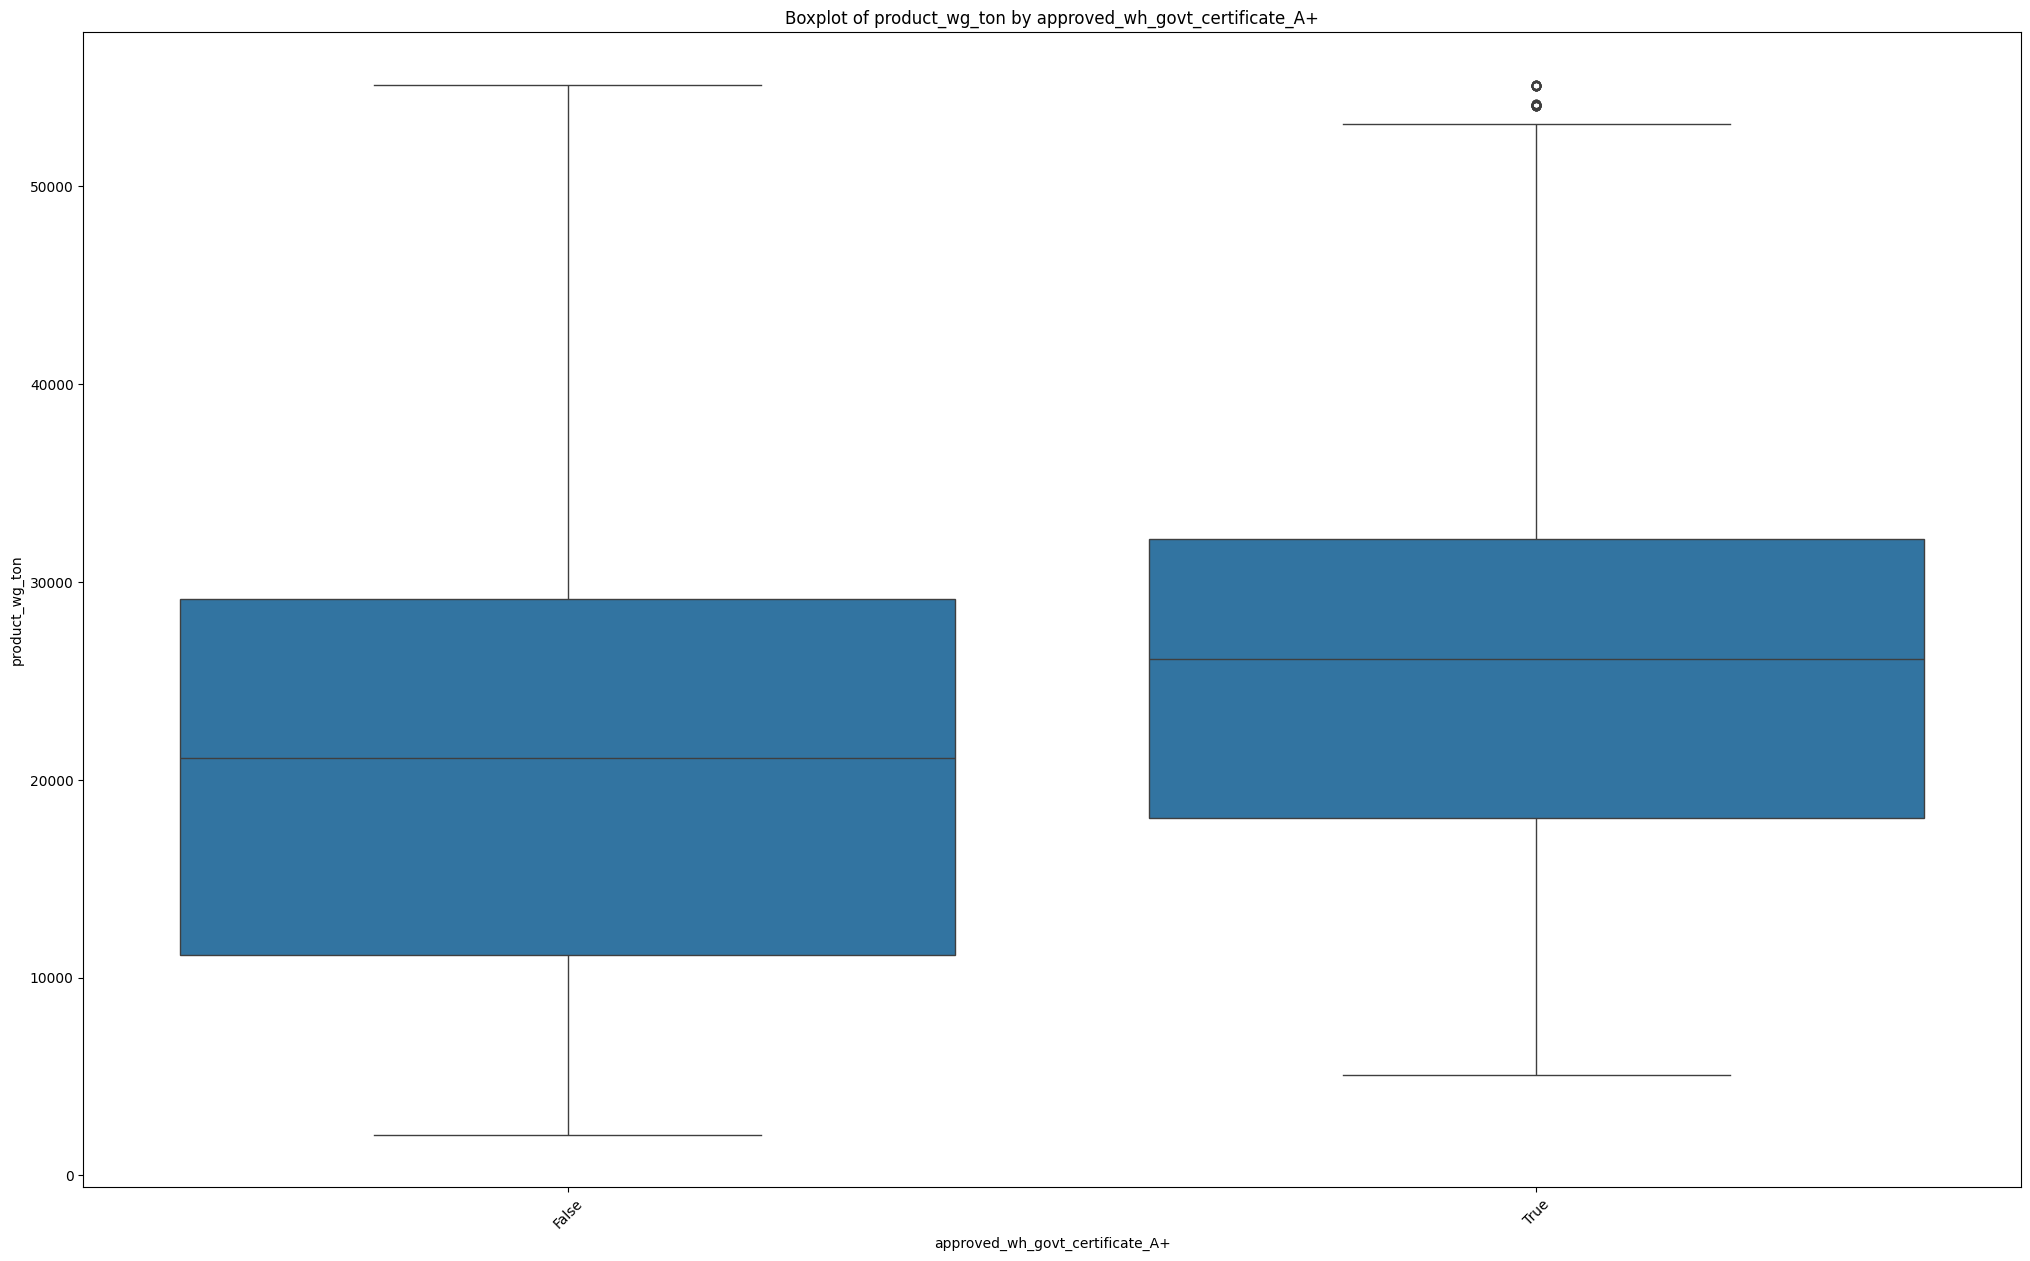

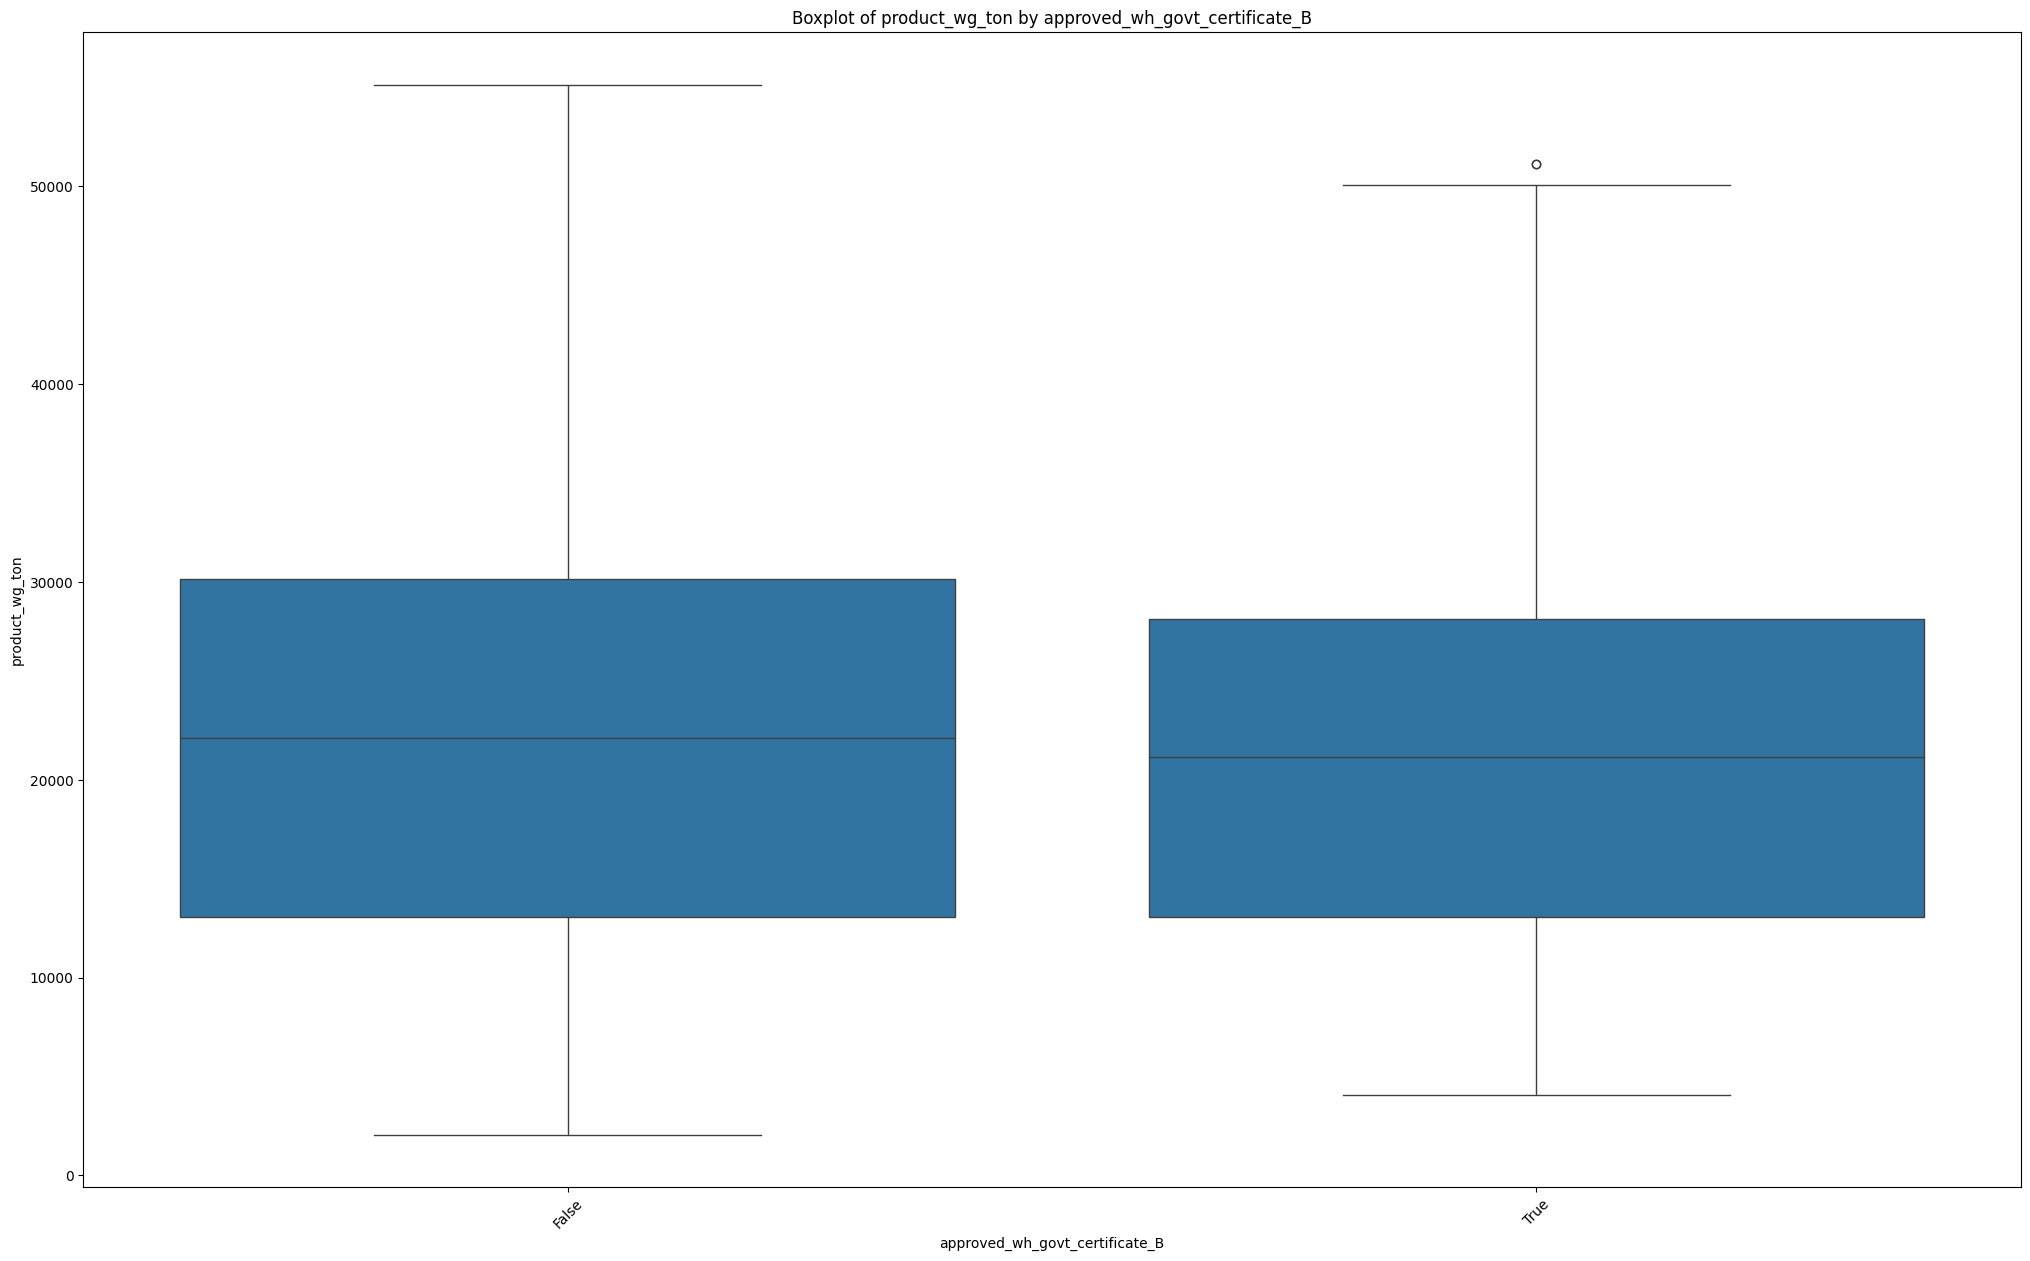

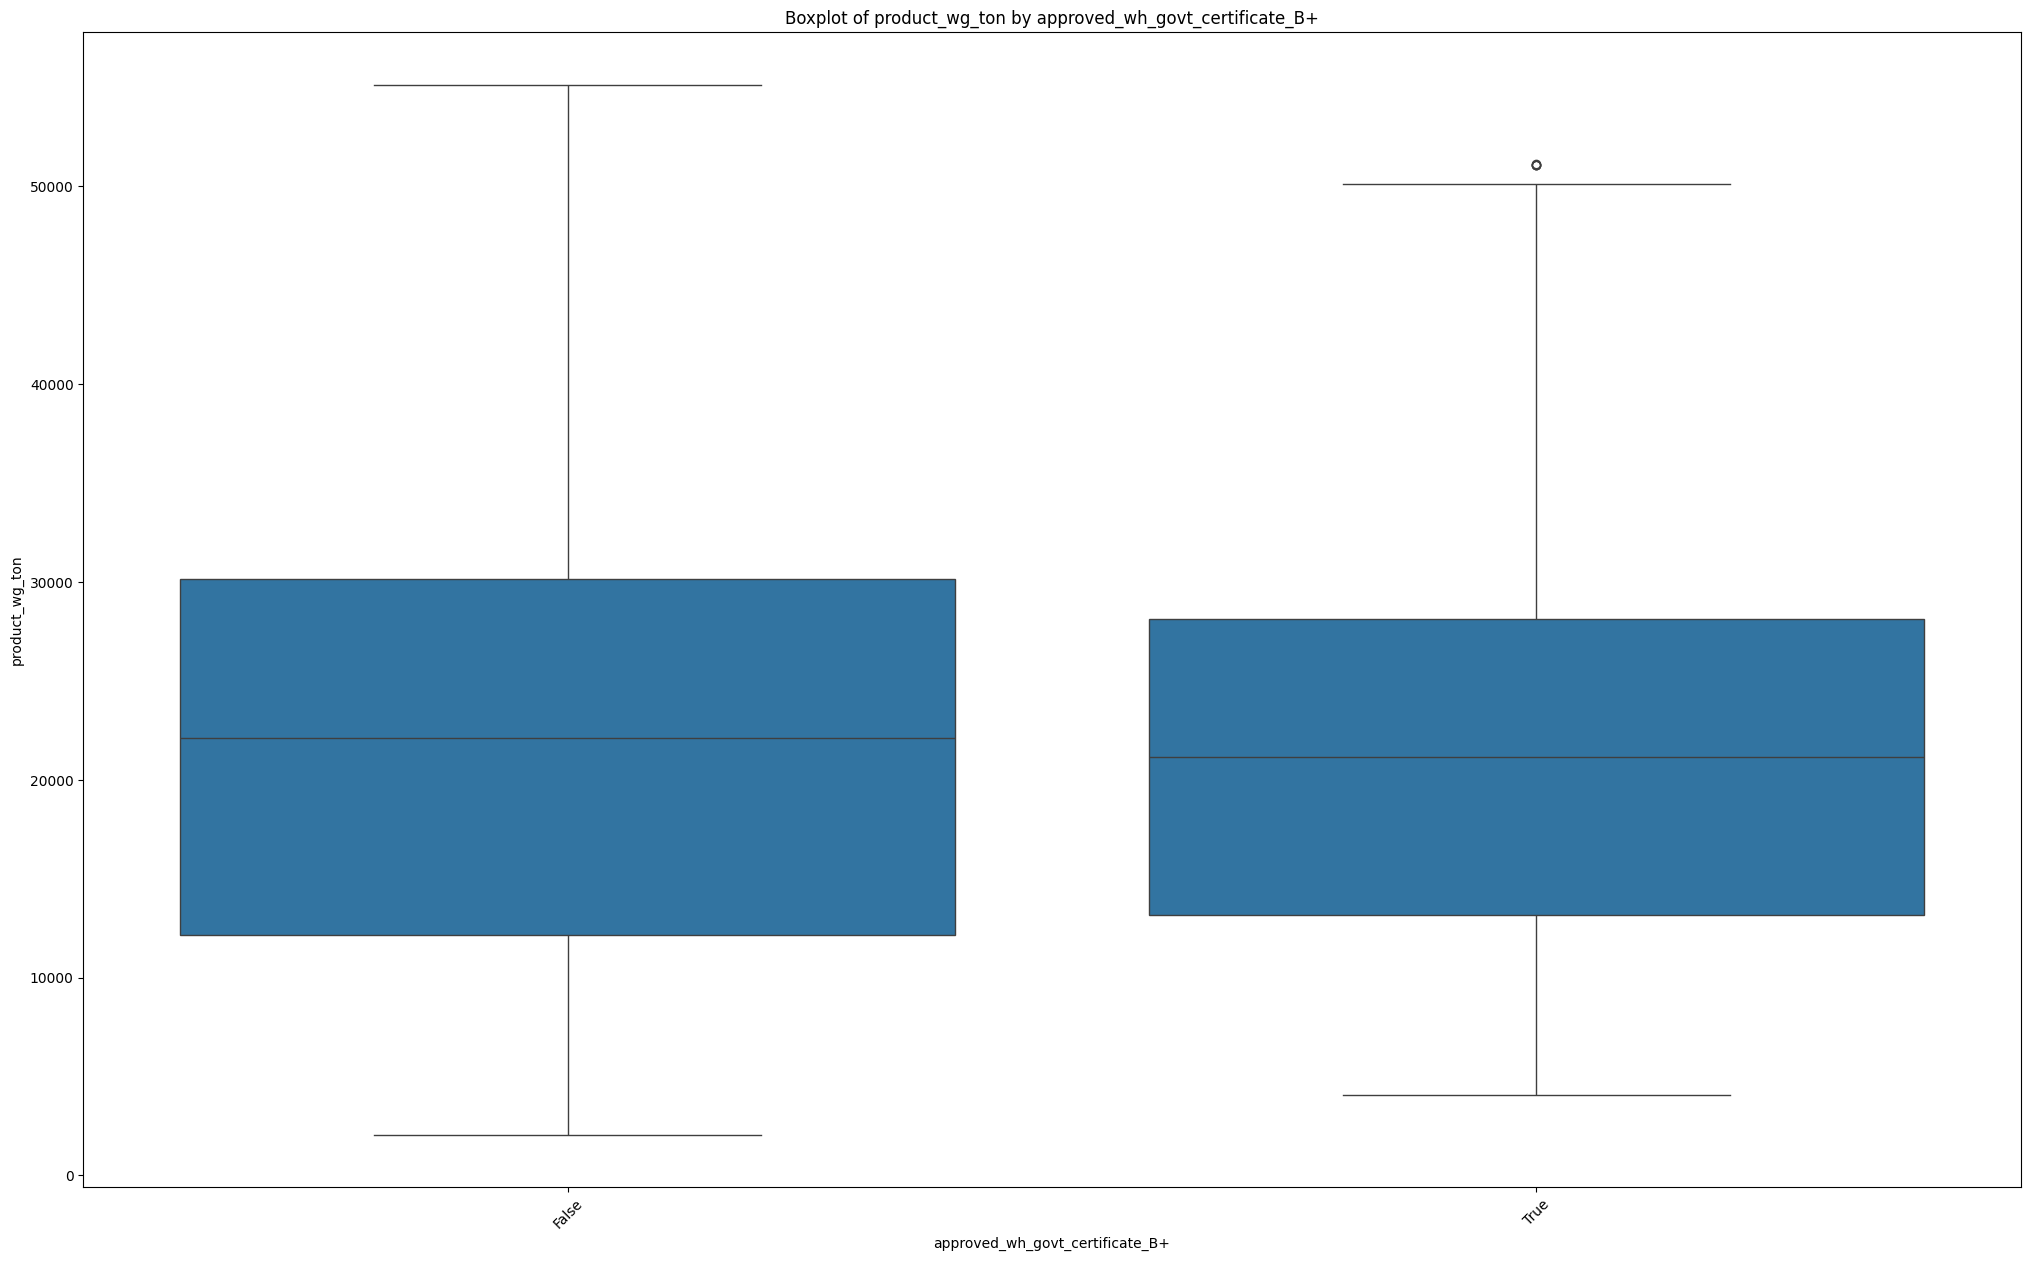

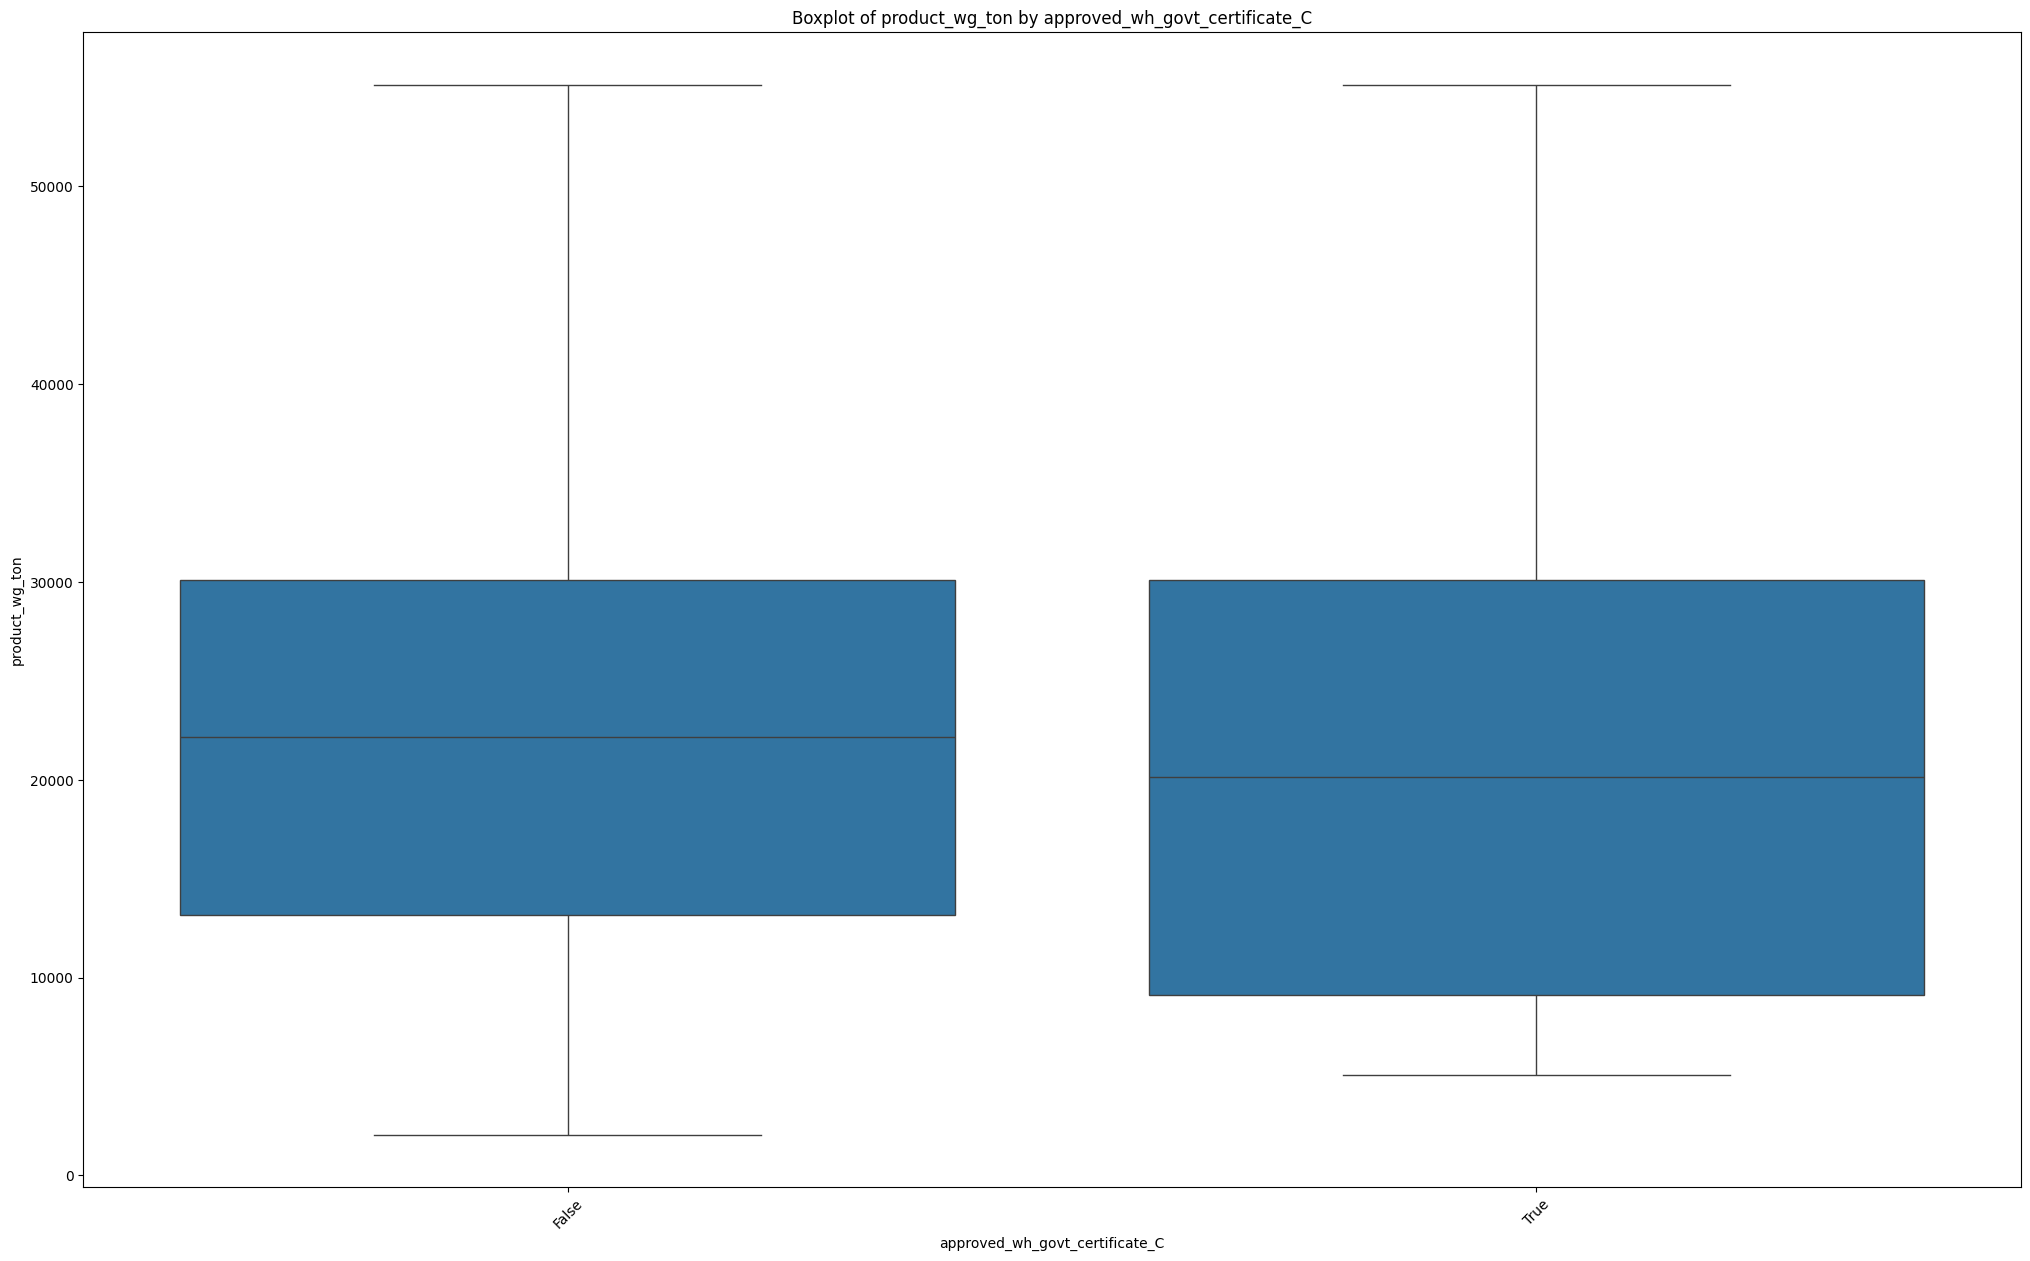

In [80]:
# Pairplot for numerical variables
sns.pairplot(df_encoded[numerical_cols])
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_encoded[numerical_cols])
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Relationship between numerical and categorical variables using boxplot or violin plot
for col in categorical_cols:
    plt.figure(figsize=(25, 15))
    sns.boxplot(data=df_encoded, x=col, y='product_wg_ton')
    plt.title(f'Boxplot of product_wg_ton by {col}')
    plt.xticks(rotation=45)
    plt.show()


## **Model Building:**
*   **Choose Models:** In this step, we select various regression models suitable for predicting continuous target variables. Common choices include Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, etc. These models will be trained and evaluated to determine their effectiveness in predicting the target variable.

*   **Split Data:** The dataset is split into training and testing sets using the train_test_split() function from sklearn. This ensures that we have separate datasets for training our models and evaluating their performance.

*   **Train Models:** Each selected model is trained on the training data using the fit() function. This involves finding the optimal parameters of the model that minimize the difference between predicted and actual values of the target variable




In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Split data into features (X) and target variable (y)
X = df_encoded.drop(columns=['product_wg_ton'])
y = df_encoded['product_wg_ton']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


GradientBoostingRegressor()

## **Evaluation:**
*  **Predictions:** After training the models, we make predictions on the test set using each trained model. This allows us to assess how well the models generalize to unseen data.

*  **Performance Metrics:** We calculate appropriate evaluation metrics for regression tasks. Common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2). These metrics help us understand how well the models are performing and compare their performance.

*  **Compare Models:** We compare the performance of different models based on the evaluation metrics calculated in the previous step. This comparison helps us identify the model that best fits our data and provides the most accurate predictions.






In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Evaluate models
lr_mae = mean_absolute_error(y_test, lr_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)

lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)

lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)
gb_r2 = r2_score(y_test, gb_preds)

print("Linear Regression Metrics:")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R-squared:", lr_r2)

print("\nRandom Forest Metrics:")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R-squared:", rf_r2)

print("\nGradient Boosting Metrics:")
print("MAE:", gb_mae)
print("RMSE:", gb_rmse)
print("R-squared:", gb_r2)


Linear Regression Metrics:
MAE: 4325.845220405534
RMSE: 5470.67522599831
R-squared: 0.7778223338361253

Random Forest Metrics:
MAE: 3638.3940199999997
RMSE: 4792.933084326249
R-squared: 0.8294619606118752

Gradient Boosting Metrics:
MAE: 3630.0576549841494
RMSE: 4739.559711685073
R-squared: 0.8332389839352206


## **Model Selection:**
*  **Select Best Model:** We choose the model that performs the best according to the selected evaluation metric(s). For example, if minimizing RMSE is the primary goal, we select the model with the lowest RMSE. This step ensures that we use the most effective model for predicting the target variable.




In [95]:
# Compare models based on RMSE
min_rmse = min(lr_rmse, rf_rmse, gb_rmse)
best_model = None

if min_rmse == lr_rmse:
    best_model = "Linear Regression"
elif min_rmse == rf_rmse:
    best_model = "Random Forest"
else:
    best_model = "Gradient Boosting"

print("\nBest Model:", best_model)



Best Model: Gradient Boosting


## **Considerations for Future Improvements:**
*   Experiment with different hyperparameters for the selected model to improve performance.
*   Consider ensemble methods or stacking models to combine the strengths of multiple models.
*   Explore feature engineering techniques to create more informative features.
*   Gather additional relevant data to improve model accuracy.
*   Regularize the model to prevent overfitting.


